# Analytics

#### Date: 2020/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM:

##### Semester: 2020/02
##### Professor: Hilmer Neri

##### Members:

- Arthur Matos
- Brian Pina
- Gabriel Sabanai
- Guilherme Marques
- Luiz Henrique Zamprogno
- Luiz Pettengill
- Matheus Blanco
- Pedro Féo
- Saleh Kader
- Victor Buendia


### LIBRARIES

In [40]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import os

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

from random import randint
from IPython.core.display import display, HTML

### GRAPH SETTINGS

In [41]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [42]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### SonarCloud

In [43]:
repos = [
    '2021.1-Cartografia-social-api-comunidades',
    '2021.1-Cartografia-social-api-gateway',
    '2021.1-Cartografia-social-api-mapas',
    '2021.1-Cartografia-social-api-midia',
    '2021.1-Cartografia-social-api-users',
    '2021.1-Cartografia-social-front'
]

language = [['2021.1-Cartografia-social-api-comunidades', 'ts'], 
            ['2021.1-Cartografia-social-api-gateway', 'ts'], 
            ['2021.1-Cartografia-social-api-mapas', 'ts'], 
            ['2021.1-Cartografia-social-api-midia', 'ts'], 
            ['2021.1-Cartografia-social-api-users', 'ts'], 
            ['2021.1-Cartografia-social-front', 'js']]

repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]

repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]

In [44]:
repos_language

{'2021.1-Cartografia-social-api-comunidades': 'ts',
 '2021.1-Cartografia-social-api-gateway': 'ts',
 '2021.1-Cartografia-social-api-mapas': 'ts',
 '2021.1-Cartografia-social-api-midia': 'ts',
 '2021.1-Cartografia-social-api-users': 'ts',
 '2021.1-Cartografia-social-front': 'js'}

##### Path to the folder with all your jsons

In [45]:
jsons = glob('**/*.json') # add the path here

In [7]:
issues = glob('issues.json')
sprints = glob('sprints.json')

In [46]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj


def create_base_component_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
        aux_df = df['filename'].str.split(r"fga-eps-mds-2021_1-(.*?)-(.*?)_(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

def create_base_issue_df(json_list):
    df = pd.DataFrame()
    
    for i in issue_list:
        base_issue = read_json(i)
        base_issue_data = base_issue['baseIssue']['TAGS']
        base_issue_df = pd.DataFrame(base_issue_data)
        base_issue_df['filename'] = os.path.basename(i)
        df = df.append(base_issue_df, ignore_index=True)
    return df, repos

In [9]:
all_issues = pd.DataFrame()
all_issues = read_json(issues[0])

In [10]:
all_sprints = read_json(sprints[0])

#### Create base component dataframe

In [47]:
base_component_df = create_base_component_df(jsons)

#### Create dataframe per file

In [48]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [52]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'ts')

        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    # replace TeamName by yours.    
    aux_df = df['filename'].str.split(r"fga-eps-mds-2021_1-(.*?)-(.*?)_(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])

    df.to_csv('result2.csv')
    
    return df

In [53]:
file_component_df = create_file_df(jsons)

In [54]:
file_component_df['version'] = pd.to_datetime(file_component_df['version'], format="%d-%m-%Y")

ValueError: time data 'social-api-comunidades-10-15-2021' does not match format '%d-%m-%Y' (match)

In [16]:
file_component_df = file_component_df.sort_values(by='version')

In [17]:
file_component_df.to_excel('data/data.xlsx', index = False)

In [18]:
file_component_df.repository.unique()

array(['Eccoar_Reports', 'Eccoar_Users', 'Eccoar_Mailer',
       'eccoar_frontend', 'Eccoar_Gateway', 'Eccoar_Complaint'],
      dtype=object)

#### Create dataframe per repository

In [19]:
repository_dataframes = {} 

for repository in repos:
    df = file_component_df[file_component_df['repository'] == f"{repository}"]
    df.name = f"{repository}"
    repository_dataframes[f"{repository}"] = df
    
repository_dataframes.keys()

dict_keys(['Eccoar_Complaint', 'eccoar_frontend', 'Eccoar_Gateway', 'Eccoar_Mailer', 'Eccoar_Reports', 'Eccoar_Users'])

In [20]:
eccoar_complaint_df = file_component_df[file_component_df['repository'] == 'Eccoar_Complaint']
eccoar_gateway_df = file_component_df[file_component_df['repository'] == 'Eccoar_Gateway']
eccoar_frontend_df = file_component_df[file_component_df['repository'] == 'eccoar_frontend']
eccoar_reports_df = file_component_df[file_component_df['repository'] == 'Eccoar_Reports']
eccoar_mailer_df = file_component_df[file_component_df['repository'] == 'Eccoar_Mailer']
eccoar_users_df = file_component_df[file_component_df['repository'] == 'Eccoar_Users']
...

Ellipsis

### Metric calculations

##### COMPLEXITY

In [21]:
def m1(df):
    
    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [22]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [23]:
def m3(df):
    
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

### NCLOC

In [24]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        ncloc += int(each)
    
    return ncloc

##### PRODUCTIVITY

#### RESOLVED ISSUES' THROUGHPUT

In [25]:
def m7(number_of_issues_resolved, number_of_issues):
    
    resolved_issues_throughput = round((number_of_issues_resolved / number_of_issues) * 100, 2)
    
    return resolved_issues_throughput

#### ISSUE TYPE IN A TIMEFRAME

In [26]:
def density(issue, number_of_issues):
    issue_density = round((issue / number_of_issues) * 100, 2)
    return issue_density

In [27]:
def m8(tag_dict, number_of_issues):
    
    issue_densities = {
        "hotfix": [density(tag_dict["HOTFIX"], number_of_issues)],
        "docs": [density(tag_dict["DOCS"], number_of_issues)],
        "feature": [density(tag_dict["FEATURE"], number_of_issues)],
        "arq": [density(tag_dict["ARQ"], number_of_issues)],
        "devops": [density(tag_dict["DEVOPS"], number_of_issues)],
        "analytics": [density(tag_dict["ANALYTICS"], number_of_issues)],
        "us": [density(tag_dict["US"], number_of_issues)],
        "easy": [density(tag_dict["EASY"], number_of_issues)],
        "medium": [density(tag_dict["MEDIUM"], number_of_issues)],
        "hard": [density(tag_dict["HARD"], number_of_issues)],
        "eps": [density(tag_dict["EPS"], number_of_issues)],
        "mds": [density(tag_dict["MDS"], number_of_issues)]
    }

    issue_densities = pd.DataFrame.from_dict(issue_densities).T.reset_index()
    
    issue_densities.columns = ['density' ,'percentage']
    
    return issue_densities

In [28]:
issues = glob('issues.json')
sprints = glob('sprints.json')
all_issues = read_json(issues[0])

### Generate M8 and Create CSV

In [29]:
def calculate_m8(all_issues):
    for issue in all_issues:
        df = m8(all_issues[issue]['TAGS'], NUMBER_OF_ISSUES)
        df.to_csv(f'fga-eps-mds-2020-2-Eccoar-qualidade-total-processo-m8-{int(issue.split(" ")[1])}.csv')

In [30]:
TAGS = {
    'HOTFIX': 15,
    'DOCS': 121,
    'FEATURE': 32,
    'ARQ': 15,
    'DEVOPS': 12,
    'ANALYTICS': 23,
    'US': 19,
    'EASY': 28,
    'MEDIUM': 22,
    'HARD': 7,
    'EPS': 61,
    'MDS': 41
}
NUMBER_OF_ISSUES_RESOLVED=201
NUMBER_OF_ISSUES=236

In [31]:
calculate_m8(all_issues)

#### BUGS RATIO

In [32]:
def m9(tag_dict, number_of_issues):
    
    bugs_ratio = round(((tag_dict["DOCS"] + tag_dict["FEATURE"] + tag_dict["ARQ"] + tag_dict["DEVOPS"] + tag_dict["ANALYTICS"]) / number_of_issues) * 100, 2)
    
    return bugs_ratio

In [33]:
#df = pd.read_csv('result.csv')

In [34]:
m7(NUMBER_OF_ISSUES_RESOLVED, NUMBER_OF_ISSUES)

85.17

In [35]:
m8(TAGS, NUMBER_OF_ISSUES)

density  percentage
0      hotfix        6.36
1        docs       51.27
2     feature       13.56
3         arq        6.36
4      devops        5.08
5   analytics        9.75
6          us        8.05
7        easy       11.86
8      medium        9.32
9        hard        2.97
10        eps       25.85
11        mds       17.37

In [36]:
m9(TAGS, NUMBER_OF_ISSUES)

86.02

### Calculate m1, m2, m3, m7, m8, m9 for each repository

In [37]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    repository_list = []
    version_list = []
    ncloc_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        ncloc_list.append(_ncloc(version_df))
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'repository': repository_list, 
                               'version': version_list,
                               'ncloc': ncloc_list
                              })
    
    metrics_df.to_csv('result.csv')
        
    return metrics_df

In [38]:
repository_metrics = {}

for repository, repo_df in repository_dataframes.items():   
    metrics_df = create_metrics_df(repo_df)
    metrics_df.name = f"{repository}"
    repository_metrics[f"{repository}"] = metrics_df

In [39]:
def create_df(base_issue_data):
    base_issue_m7 = []
    base_issue_m9 = []
    sprint_list = []
    start_list = []
    end_list = []

    for issue in base_issue_data:
        base_issue_m7.append(m7(base_issue_data[issue]['CLOSED_ISSUES'], NUMBER_OF_ISSUES))
        base_issue_m9.append(m9(base_issue_data[issue]['TAGS'], NUMBER_OF_ISSUES))
        sprint_list.append(int(issue.split(" ")[1]))
        start_list.append(all_sprints[issue]['start'])
        end_list.append(all_sprints[issue]['end'])
    df = pd.DataFrame({
                       'm7': base_issue_m7, 
                       'm9': base_issue_m9, 
                       'sprints': sprint_list,
                       'start_sprint': start_list,
                       'end_sprint': end_list
                    })
    metrics_df.to_csv('fga-eps-mds-2020-2-Eccoar-qualidade-total-processo.csv')
    
    return df

In [40]:
issue_df = create_df(all_issues)
issue_df['start_sprint'] = pd.to_datetime(issue_df['start_sprint'], format='%d/%m/%Y')
issue_df['end_sprint'] = pd.to_datetime(issue_df['end_sprint'], format='%d/%m/%Y')

In [41]:
eccoar_gateway_metrics = create_metrics_df(eccoar_gateway_df)
eccoar_complaint_metrics = create_metrics_df(eccoar_complaint_df)
eccoar_frontend_metrics = create_metrics_df(eccoar_frontend_df)
eccoar_mailer_metrics = create_metrics_df(eccoar_mailer_df)
eccoar_reports_metrics = create_metrics_df(eccoar_reports_df)
eccoar_users_metrics = create_metrics_df(eccoar_users_df)

In [42]:
all_metrics = pd.concat([eccoar_gateway_metrics, eccoar_complaint_metrics, eccoar_frontend_metrics, eccoar_mailer_metrics, eccoar_reports_metrics, eccoar_users_metrics], ignore_index=True)

In [43]:
def add_m7_and_m9(metrics_df):

    m7_list = []
    m9_list = []

    for _, release in metrics_df.iterrows():

        curr_version = release['version']

        for _, row in issue_df.iterrows():
            if pd.Timestamp.to_numpy(row['start_sprint']) <= curr_version <= pd.Timestamp.to_numpy(row['end_sprint']):
                m7_list.append(row['m7'])
                m9_list.append(row['m9'])

    m7_list = pd.DataFrame(m7_list, columns=['m7'])
    m9_list = pd.DataFrame(m9_list, columns=['m9'])

    metrics_df = pd.concat([metrics_df, m7_list], axis=1)
    metrics_df = pd.concat([metrics_df, m9_list], axis=1)

    return metrics_df

In [44]:
eccoar_gateway_metrics = add_m7_and_m9(eccoar_gateway_metrics)
eccoar_complaint_metrics = add_m7_and_m9(eccoar_complaint_metrics)
eccoar_frontend_metrics = add_m7_and_m9(eccoar_frontend_metrics)
eccoar_mailer_metrics = add_m7_and_m9(eccoar_mailer_metrics)
eccoar_reports_metrics = add_m7_and_m9(eccoar_reports_metrics)
eccoar_users_metrics = add_m7_and_m9(eccoar_users_metrics)
all_metrics = add_m7_and_m9(all_metrics)

In [45]:
def calculate_ac(df):
    df['asc1'] = (df['m1'] + df['m2'] + df['m3']) / 3
    df['ac1'] = df['asc1']
    df['totalAC1'] = df['asc1']
    return df

In [46]:
def calculate_ac2(issue_df):
    aux_df = pd.DataFrame({
        "asc2": [],
        "totalAC2": []
    })
    aux_df['asc2'] = (issue_df['m7'] + issue_df['m9']) / 2
    aux_df['totalAC2'] = aux_df['asc2']
    return pd.concat([issue_df, aux_df], 1)

issue_df_v2 = calculate_ac2(issue_df)

In [47]:
eccoar_gateway_metrics = calculate_ac(eccoar_gateway_metrics)
eccoar_complaint_metrics = calculate_ac(eccoar_complaint_metrics)
eccoar_frontend_metrics = calculate_ac(eccoar_frontend_metrics)
eccoar_mailer_metrics = calculate_ac(eccoar_mailer_metrics)
eccoar_reports_metrics = calculate_ac(eccoar_reports_metrics)
eccoar_users_metrics = calculate_ac(eccoar_users_metrics)
all_metrics = calculate_ac(all_metrics)

In [48]:
eccoar_gateway_metrics = calculate_ac2(eccoar_gateway_metrics)
eccoar_complaint_metrics = calculate_ac2(eccoar_complaint_metrics)
eccoar_frontend_metrics = calculate_ac2(eccoar_frontend_metrics)
eccoar_mailer_metrics = calculate_ac2(eccoar_mailer_metrics)
eccoar_reports_metrics = calculate_ac2(eccoar_reports_metrics)
eccoar_users_metrics = calculate_ac2(eccoar_users_metrics)
all_metrics = calculate_ac2(all_metrics)

### Linear Regression

In [49]:
def plot_linear_regression(df):
    sns.regplot(x=df["totalAC1"], y=df["totalAC2"], line_kws={"color":"r","alpha":0.7,"lw":5})
    plt.show()

# Descriptive Statistic Analysis

- Realizes the calculation of statistic data such as mean, median, mode, min, max, standard deviation and variance.

In [50]:
def descriptive_statistics(df):
    
    metrics = df.describe()
    variance = df.var()
    variance_df = pd.DataFrame(variance, columns=["var"])
    variance_df = variance_df.T
    return metrics.append(variance_df).T

### Data visualization

- You must do this for each of your repositories

In [51]:
def plot_history(df, repository):
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMPLEXITY")
    plt.plot(df['m1'], linewidth=3, marker='o', markersize=10)
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMMENTS")
    plt.plot(df['m2'], linewidth=3, marker='o', markersize=10)
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:DUPLICATIONS")
    plt.plot(df['m3'], linewidth=3, marker='o', markersize=10)

# Histogram Repositories Analysis

In [52]:
def generate_histogram(repository, df):
    fig = plt.figure(figsize=(30, 10))
    plt.title(f"{repository}:COMPLEXITY")
    plt.bar(df.index.values.tolist(), df['m1'], color='g')
    plt.show()
    plt.title(f"{repository}:COMMENTS")
    plt.bar(df.index.values.tolist(), df['m2'], color='b')
    plt.show()
    plt.title(f"{repository}:DUPLICATIONS")
    plt.bar(df.index.values.tolist(), df['m3'], color='red')
    plt.show()
    plt.title(f"{repository}:MAINTAINABILITY")
    plt.bar(df.index.values.tolist(), df['asc1'], color='purple')
    plt.show()
    plt.title(f"{repository}:PRODUCTIVITY")
    plt.bar(df.index.values.tolist(), df['asc2'], color='orange')
    plt.show()

# Box-plot

In [53]:
def generate_boxplot(df, repository):
    fig = plt.figure(figsize=(10, 10))
    plt.title(f"{repository}:COMPLEXITY")
    plt.boxplot(df['m1'])
    plt.show()
    plt.title(f"{repository}:COMMENTS")
    plt.boxplot(df['m2'])
    plt.show()
    plt.title(f"{repository}:DUPLICATION")
    plt.boxplot(df['m3'])
    plt.show()
    plt.title(f"{repository}:MAINTAINABILITY")
    plt.boxplot(df['totalAC1'])
    plt.show()

# Correlation Matrix

In [54]:
def correlationMatrix(df):
    corrMatrix = df.corr()
    return corrMatrix

# Matriz de correlação 

Ao fazermos uma análise de dado é importante criar uma matriz de correlação para que possamos associar os valores das váriaveis entre si. Dessa forma, uma matriz de correlação é o retorno de uma tabela com coeficientes que mostram a correlação de cada variavel.

## Como interpretar o resultado

O coeficiente da correlação vária de 1 e -1, sendo assim, respectivamente, positiva, negativa ou nula, tal que:

* Correlação positiva: Ambas as variáveis mudam na mesma direção. Assim, ambas váriaveis correlacionadas se movem na mesma direção, logo se uma tem seu valor aumentado, a outra também.

* Correlação Nula: Nenhuma relação na mudança das variáveis. Isso ocorre apenas se o coeficiente da correlação for 0.

* Correlação negativa: As variáveis mudam em direções opostas. Dessa forma, se uma váriavel tem seu valor aumentado, a outra diminui seu valor. 


# DataFrame M1, M2, M3, M7, M9, NCLOC, AC1, ASC1, ASC2, TOTALAC1, TOTALAC2


In [55]:
def descriptive_percentage(df):
    df_copy = df.copy()
    df_copy['m1'] = df_copy['m1'] * 100
    df_copy['m2'] = df_copy['m2'] * 100
    df_copy['m3'] = df_copy['m3'] * 100
    df_copy['asc1'] = df_copy['asc1'] * 100
    df_copy['ac1'] = df_copy['ac1'] * 100
    df_copy['totalAC1'] = df_copy['totalAC1'] * 100
    descriptive_percentage_product = df_copy.to_html(formatters={
    'm1': '{:.4}%'.format,
    'm2': '{:.4}%'.format,
    'm3': '{:.4}%'.format,
    'asc1': '{:.4}%'.format,
    'ac1': '{:.4}%'.format,
    'totalAC1': '{:.4}%'.format,
    'asc2': '{:.4}%'.format,
    'totalAC2': '{:.4}%'.format,
    'm7': '{:.4}%'.format,
    'm9': '{:.4}%'.format,
    })
    display(HTML(descriptive_percentage_product))

In [56]:
descriptive_percentage(eccoar_complaint_metrics)

In [57]:
metrics_df.to_excel('data/metrics_df.xlsx', index = False)

# Análises dos Repositórios

## Front-end

In [58]:
generic_df = eccoar_frontend_metrics.copy()
repository = "FRONTEND"

### Gráfico histórico

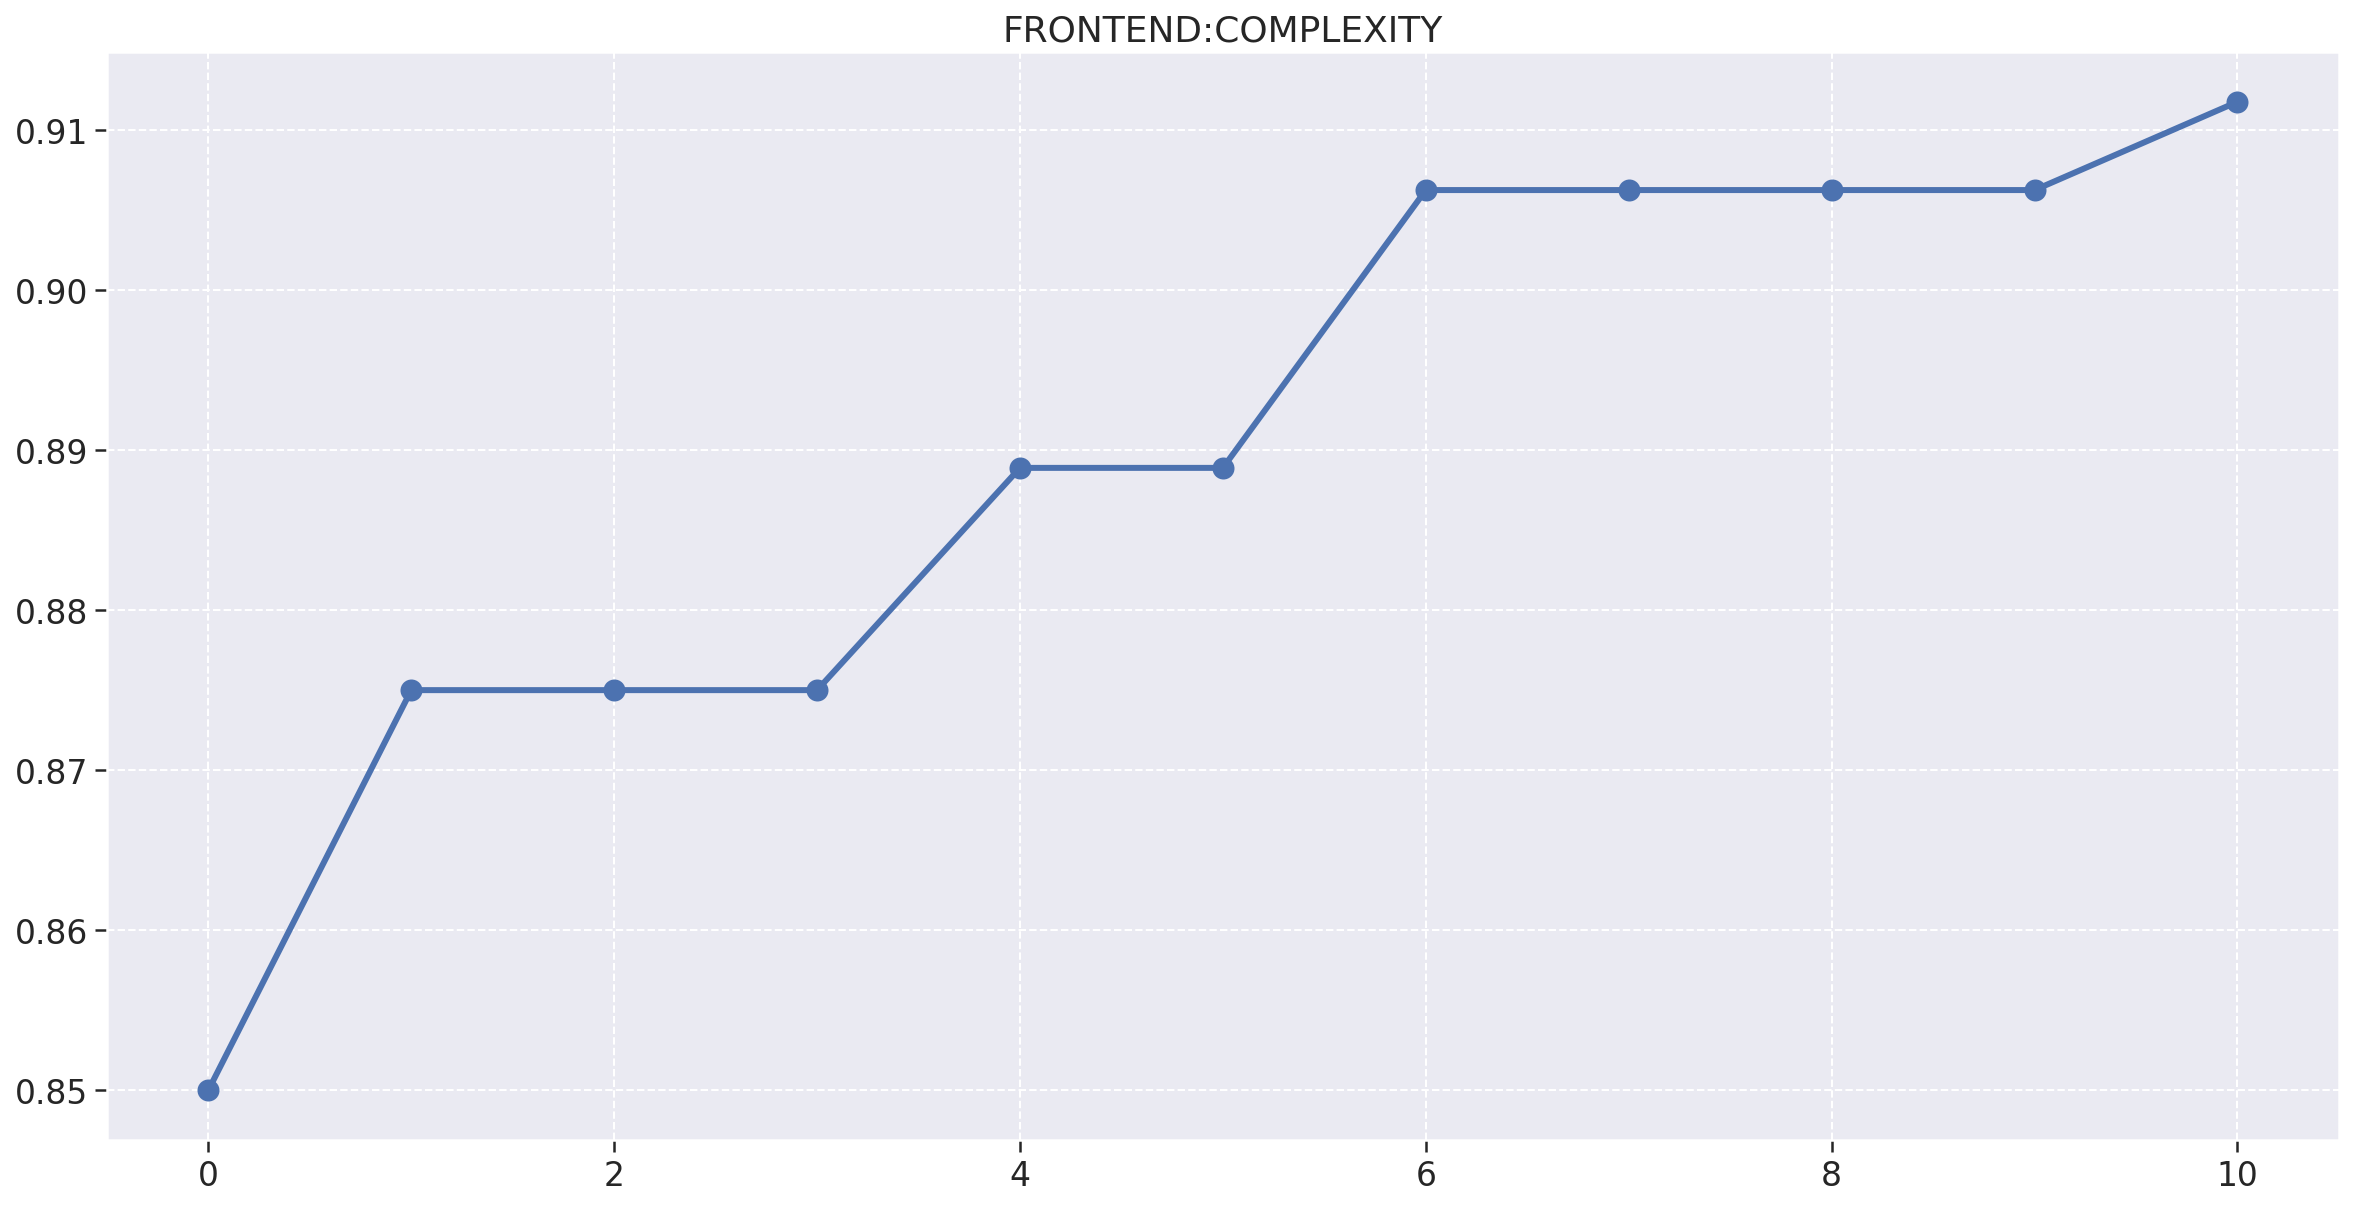

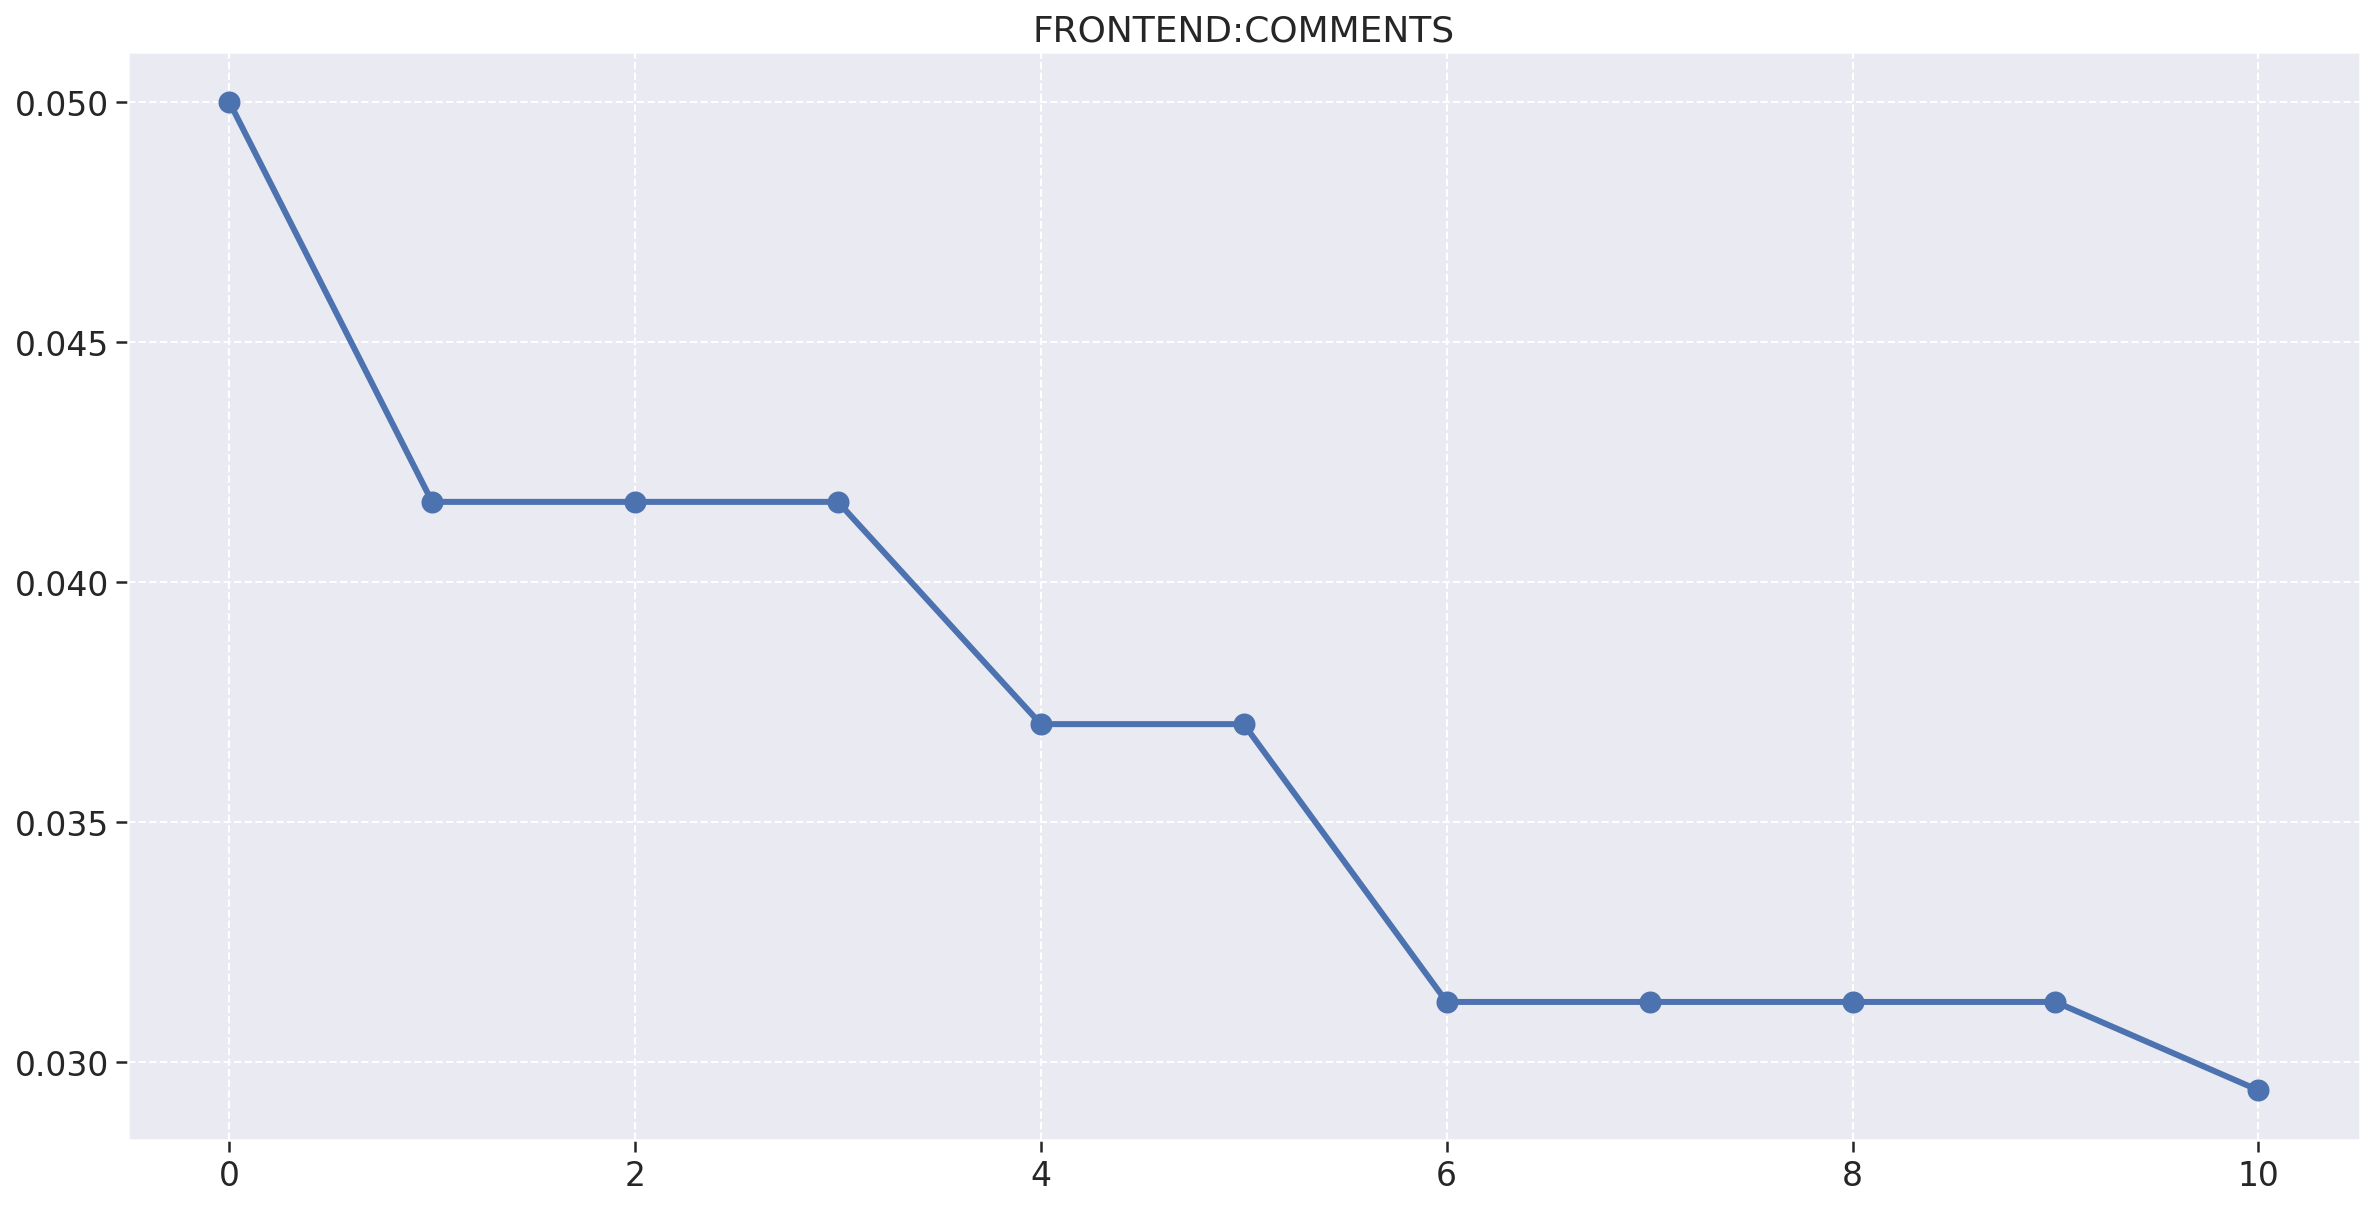

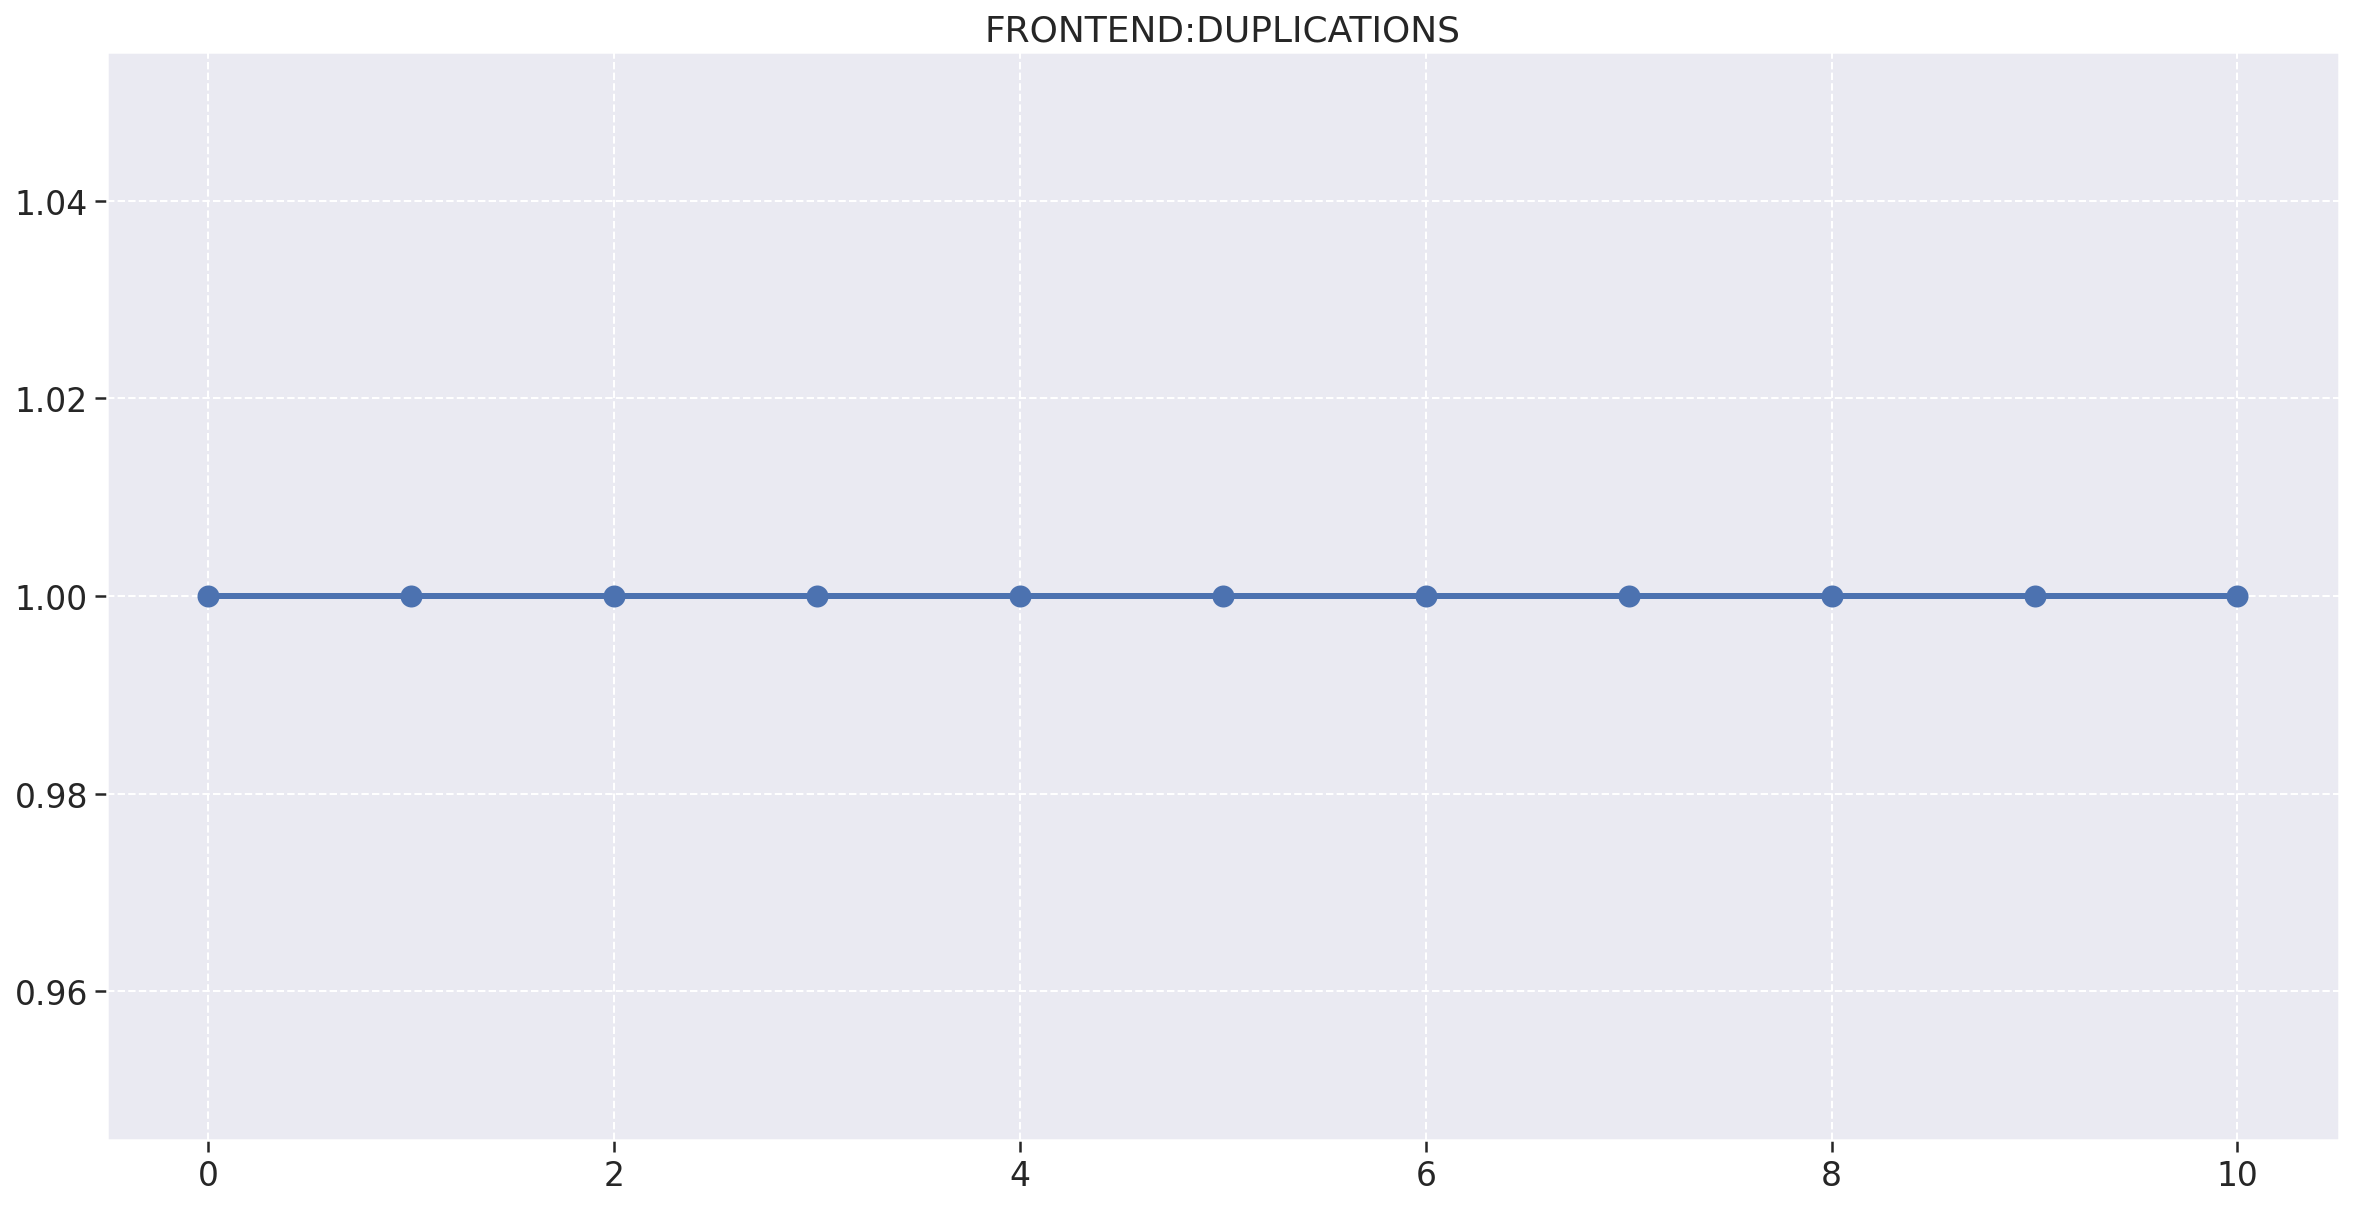

In [59]:
plot_history(generic_df, repository)

### Percentis

In [60]:
descriptive_percentage(generic_df)

### Regressão Linear

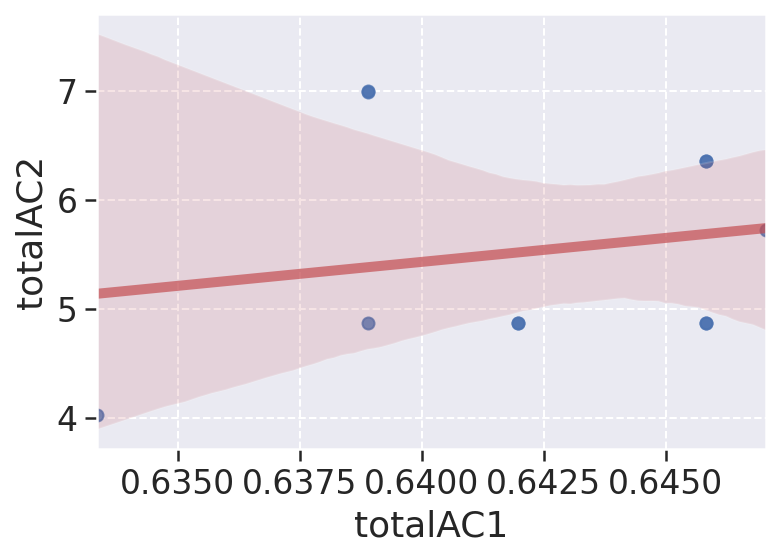

In [61]:
plot_linear_regression(generic_df)

### Histogramas

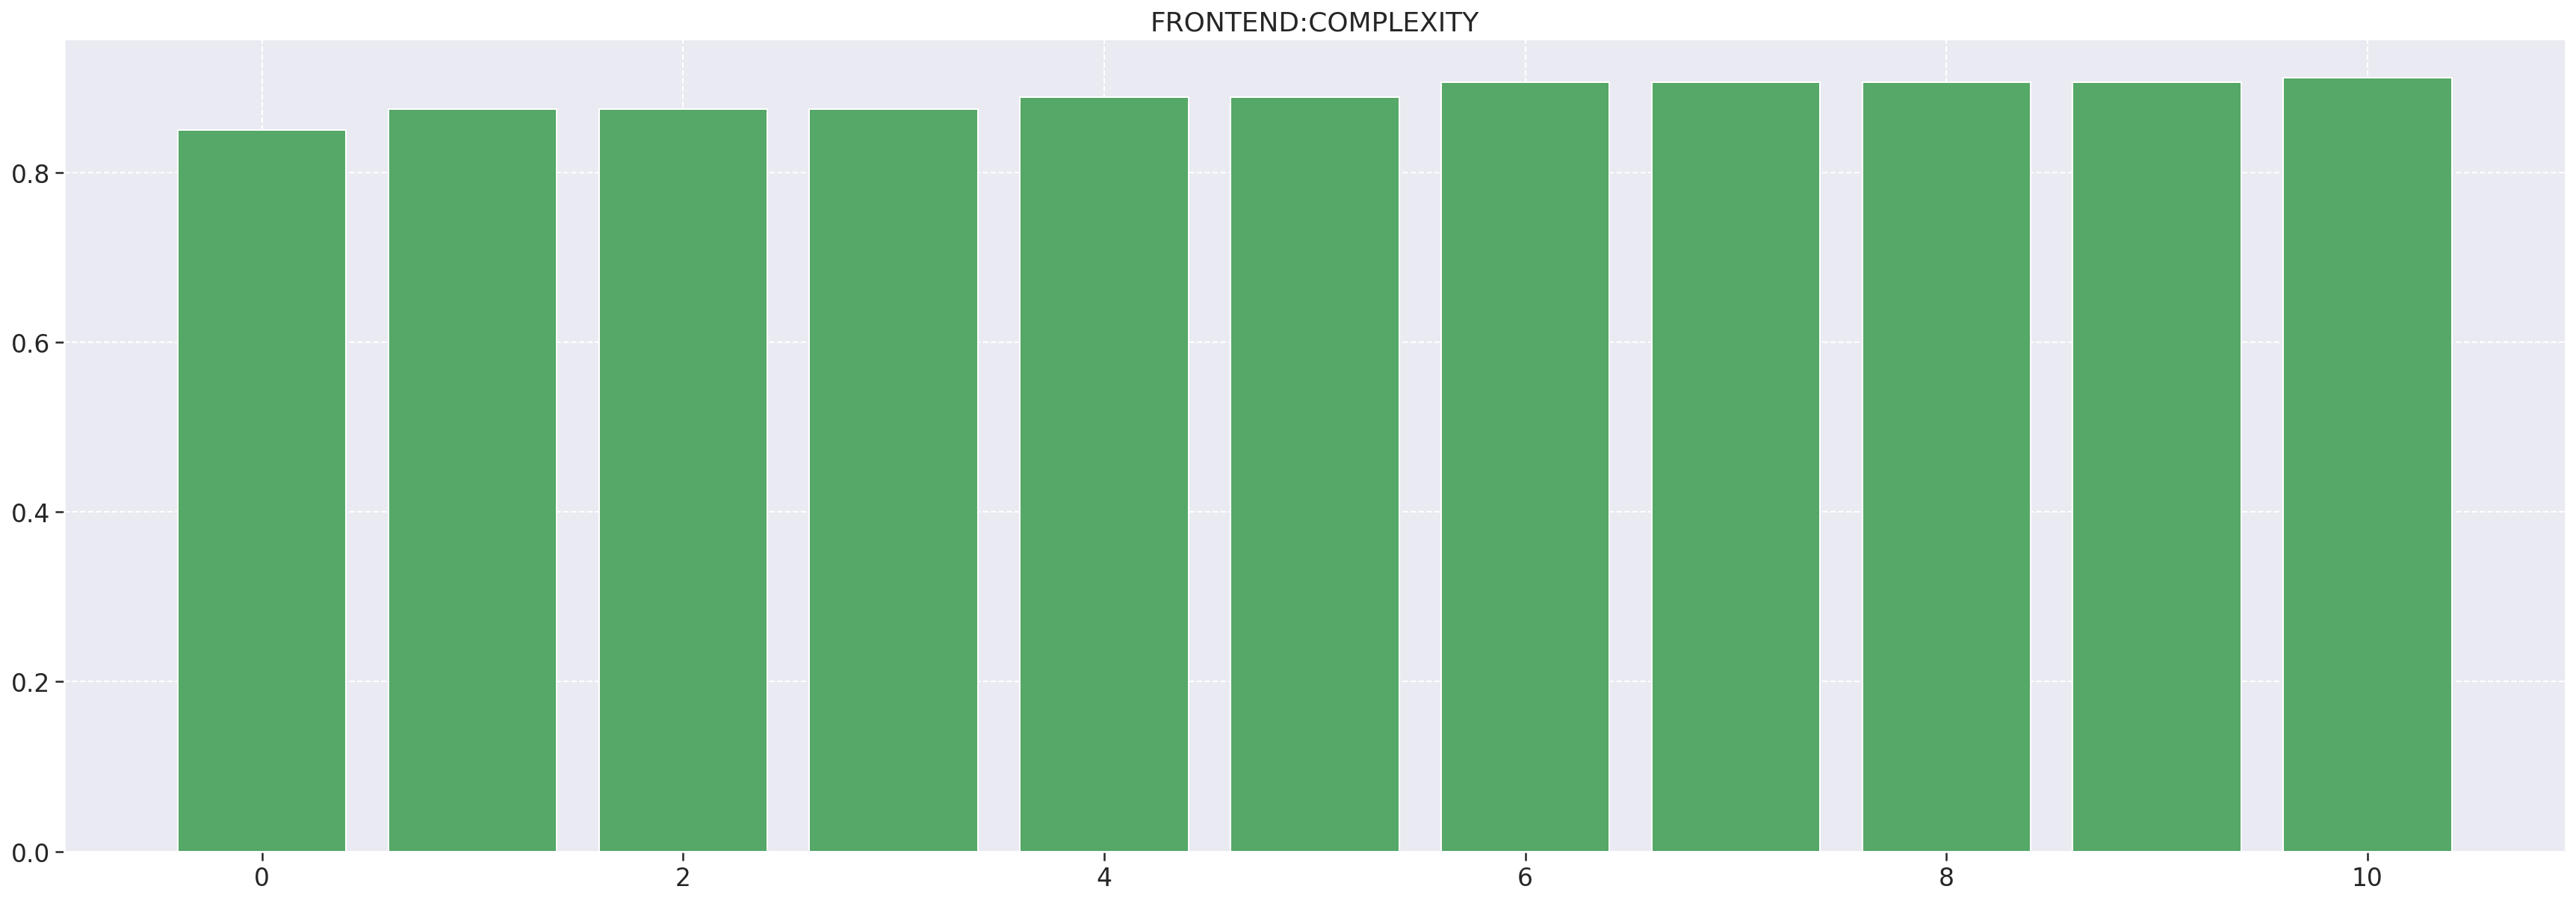

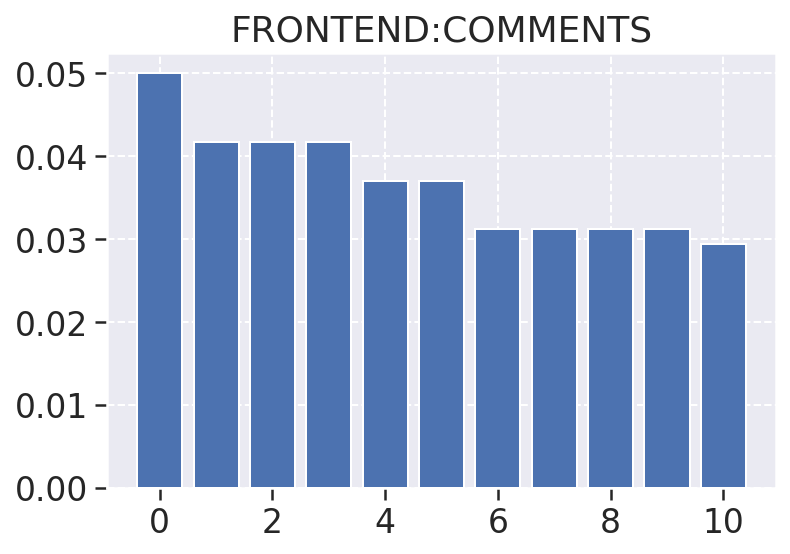

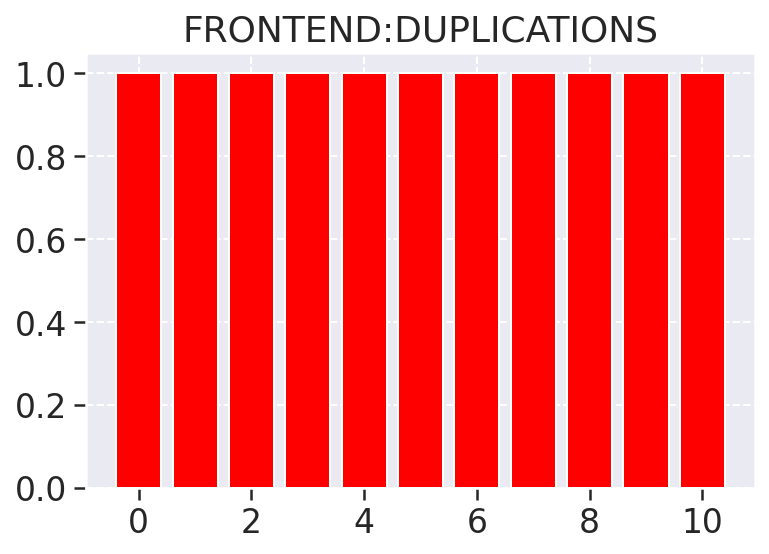

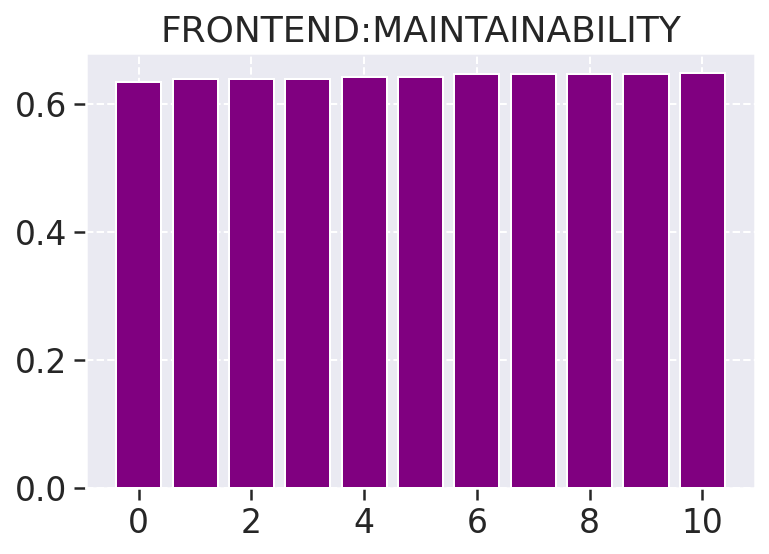

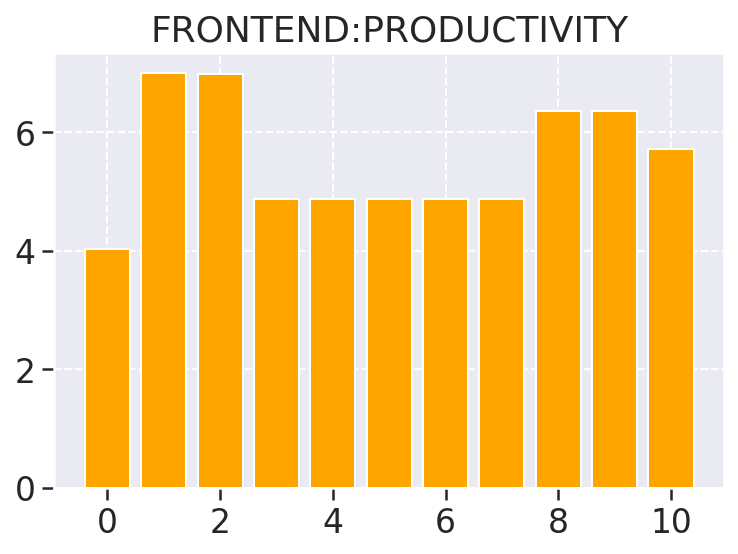

In [62]:
generate_histogram(repository, generic_df)

### Análise Descritiva

In [63]:
descriptive_statistics(generic_df)

count         mean         std         min          25%  \
m1         11.0     0.889958    0.019513    0.850000     0.875000   
m2         11.0     0.036681    0.006504    0.029412     0.031250   
m3         11.0     1.000000    0.000000    1.000000     1.000000   
ncloc      11.0  1369.909091  382.058491  657.000000  1100.000000   
m7         11.0     5.430000    0.906256    4.660000     4.660000   
m9         11.0     5.622727    1.301177    3.390000     4.870000   
asc1       11.0     0.642213    0.004336    0.633333     0.638889   
ac1        11.0     0.642213    0.004336    0.633333     0.638889   
totalAC1   11.0     0.642213    0.004336    0.633333     0.638889   
asc2       11.0     5.526364    1.005885    4.025000     4.870000   
totalAC2   11.0     5.526364    1.005885    4.025000     4.870000   

                  50%          75%          max            var  
m1           0.888889     0.906250     0.911765       0.000381  
m2           0.037037     0.041667     0.050000       0.000042  
m3           1.000000     1.000000     1.000000       0.000000  
ncloc     1280.000000  1618.000000  1996.000000  145968.690909  
m7           5.080000     5.930000     7.630000       0.821300  
m9           5.080000     6.570000     8.050000       1.693062  
asc1         0.641975     0.645833     0.647059       0.000019  
ac1          0.641975     0.645833     0.647059       0.000019  
totalAC1     0.641975     0.645833     0.647059       0.000019  
asc2         4.870000     6.355000     6.995000       1.011805  
totalAC2     4.870000     6.355000     6.995000       1.011805

### Matriz de Correlação

In [64]:
correlationMatrix(generic_df)

m1        m2  m3     ncloc        m7        m9      asc1  \
m1        1.000000 -1.000000 NaN  0.971584  0.057553  0.252856  1.000000   
m2       -1.000000  1.000000 NaN -0.971584 -0.057553 -0.252856 -1.000000   
m3             NaN       NaN NaN       NaN       NaN       NaN       NaN   
ncloc     0.971584 -0.971584 NaN  1.000000  0.113210  0.304404  0.971584   
m7        0.057553 -0.057553 NaN  0.113210  1.000000  0.649958  0.057553   
m9        0.252856 -0.252856 NaN  0.304404  0.649958  1.000000  0.252856   
asc1      1.000000 -1.000000 NaN  0.971584  0.057553  0.252856  1.000000   
ac1       1.000000 -1.000000 NaN  0.971584  0.057553  0.252856  1.000000   
totalAC1  1.000000 -1.000000 NaN  0.971584  0.057553  0.252856  1.000000   
asc2      0.189469 -0.189469 NaN  0.247882  0.870858  0.939573  0.189469   
totalAC2  0.189469 -0.189469 NaN  0.247882  0.870858  0.939573  0.189469   

               ac1  totalAC1      asc2  totalAC2  
m1        1.000000  1.000000  0.189469  0.189469  
m2       -1.000000 -1.000000 -0.189469 -0.189469  
m3             NaN       NaN       NaN       NaN  
ncloc     0.971584  0.971584  0.247882  0.247882  
m7        0.057553  0.057553  0.870858  0.870858  
m9        0.252856  0.252856  0.939573  0.939573  
asc1      1.000000  1.000000  0.189469  0.189469  
ac1       1.000000  1.000000  0.189469  0.189469  
totalAC1  1.000000  1.000000  0.189469  0.189469  
asc2      0.189469  0.189469  1.000000  1.000000  
totalAC2  0.189469  0.189469  1.000000  1.000000

### Box-plot

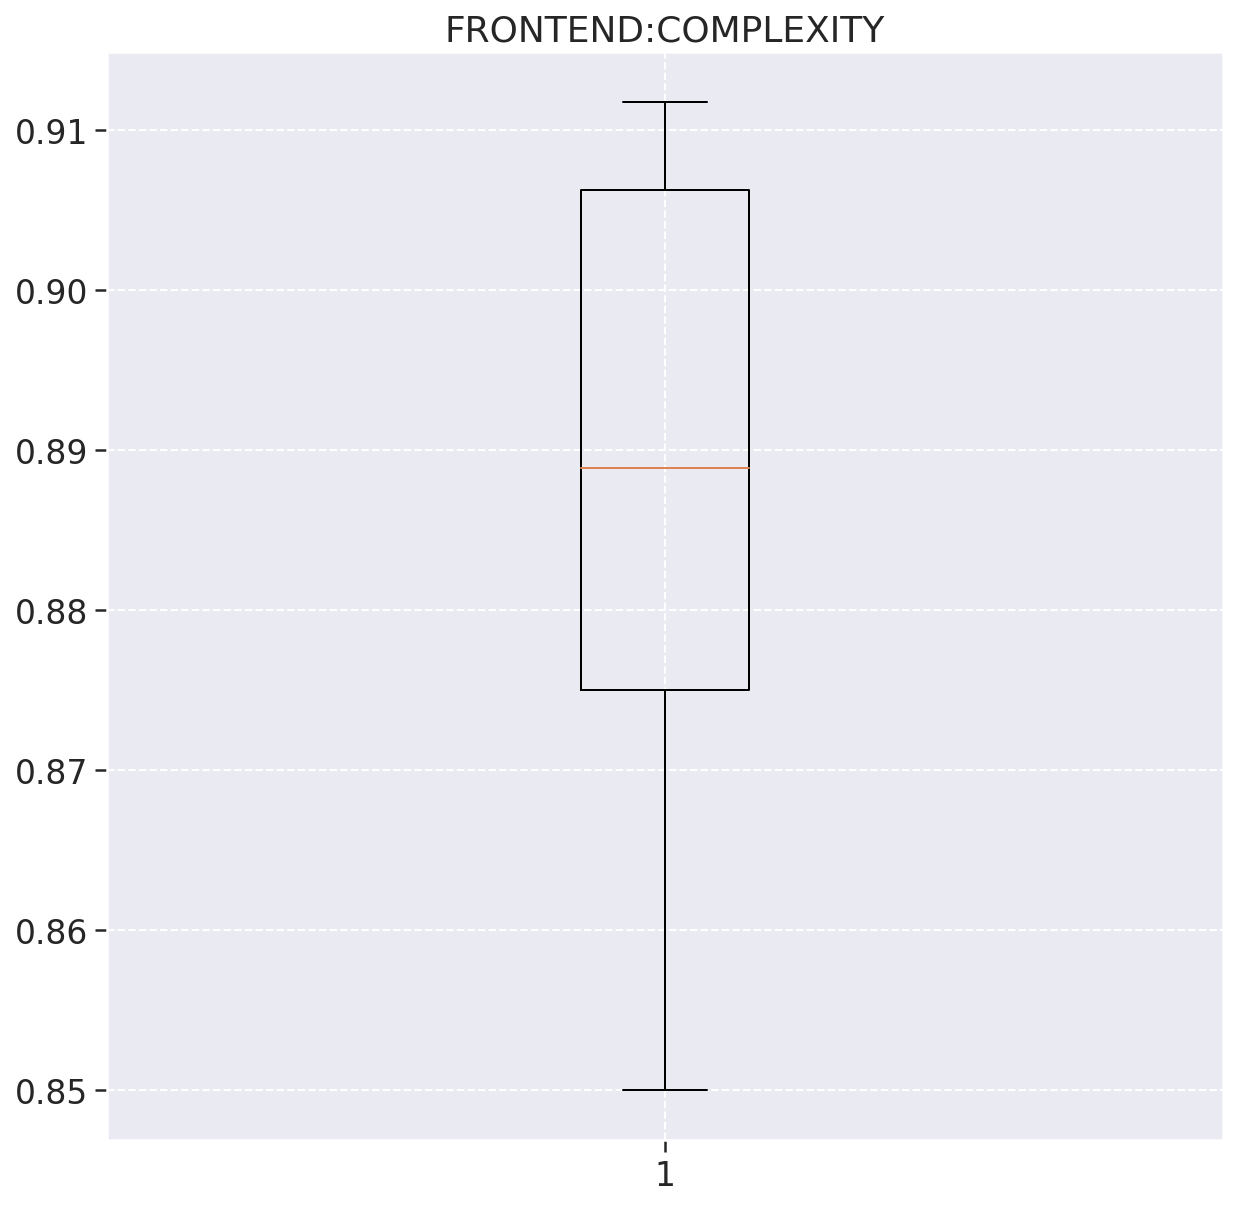

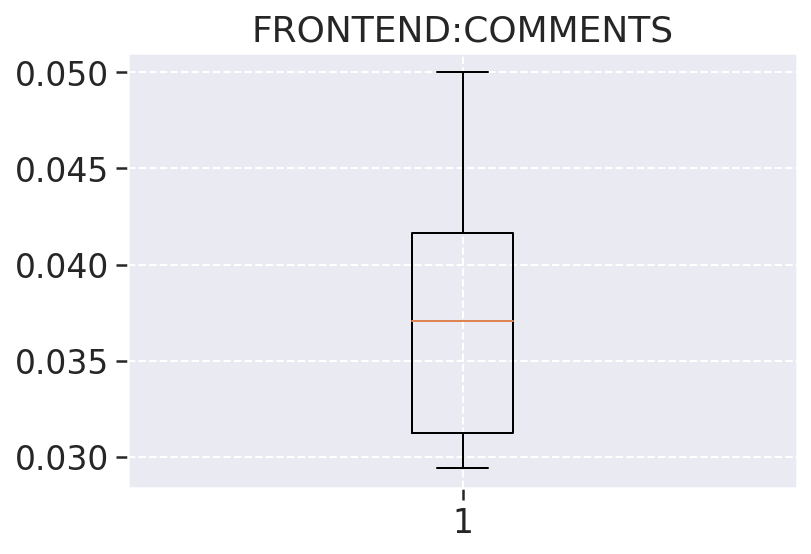

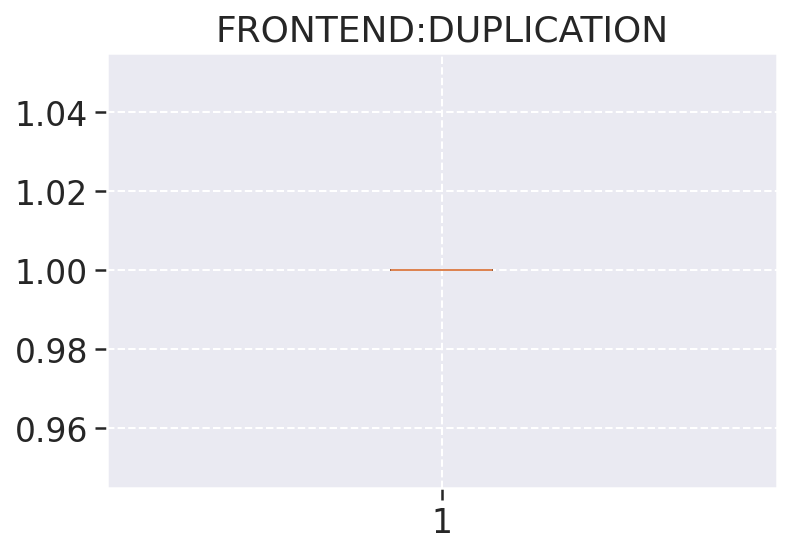

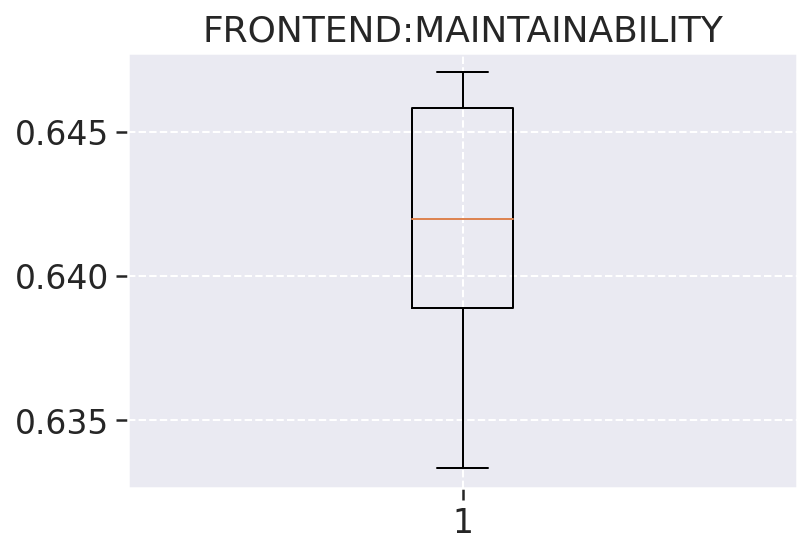

In [65]:
generate_boxplot(generic_df, repository)

## Complaint

In [66]:
generic_df = eccoar_complaint_metrics.copy()
repository = "COMPLAINT"

### Gráfico histórico

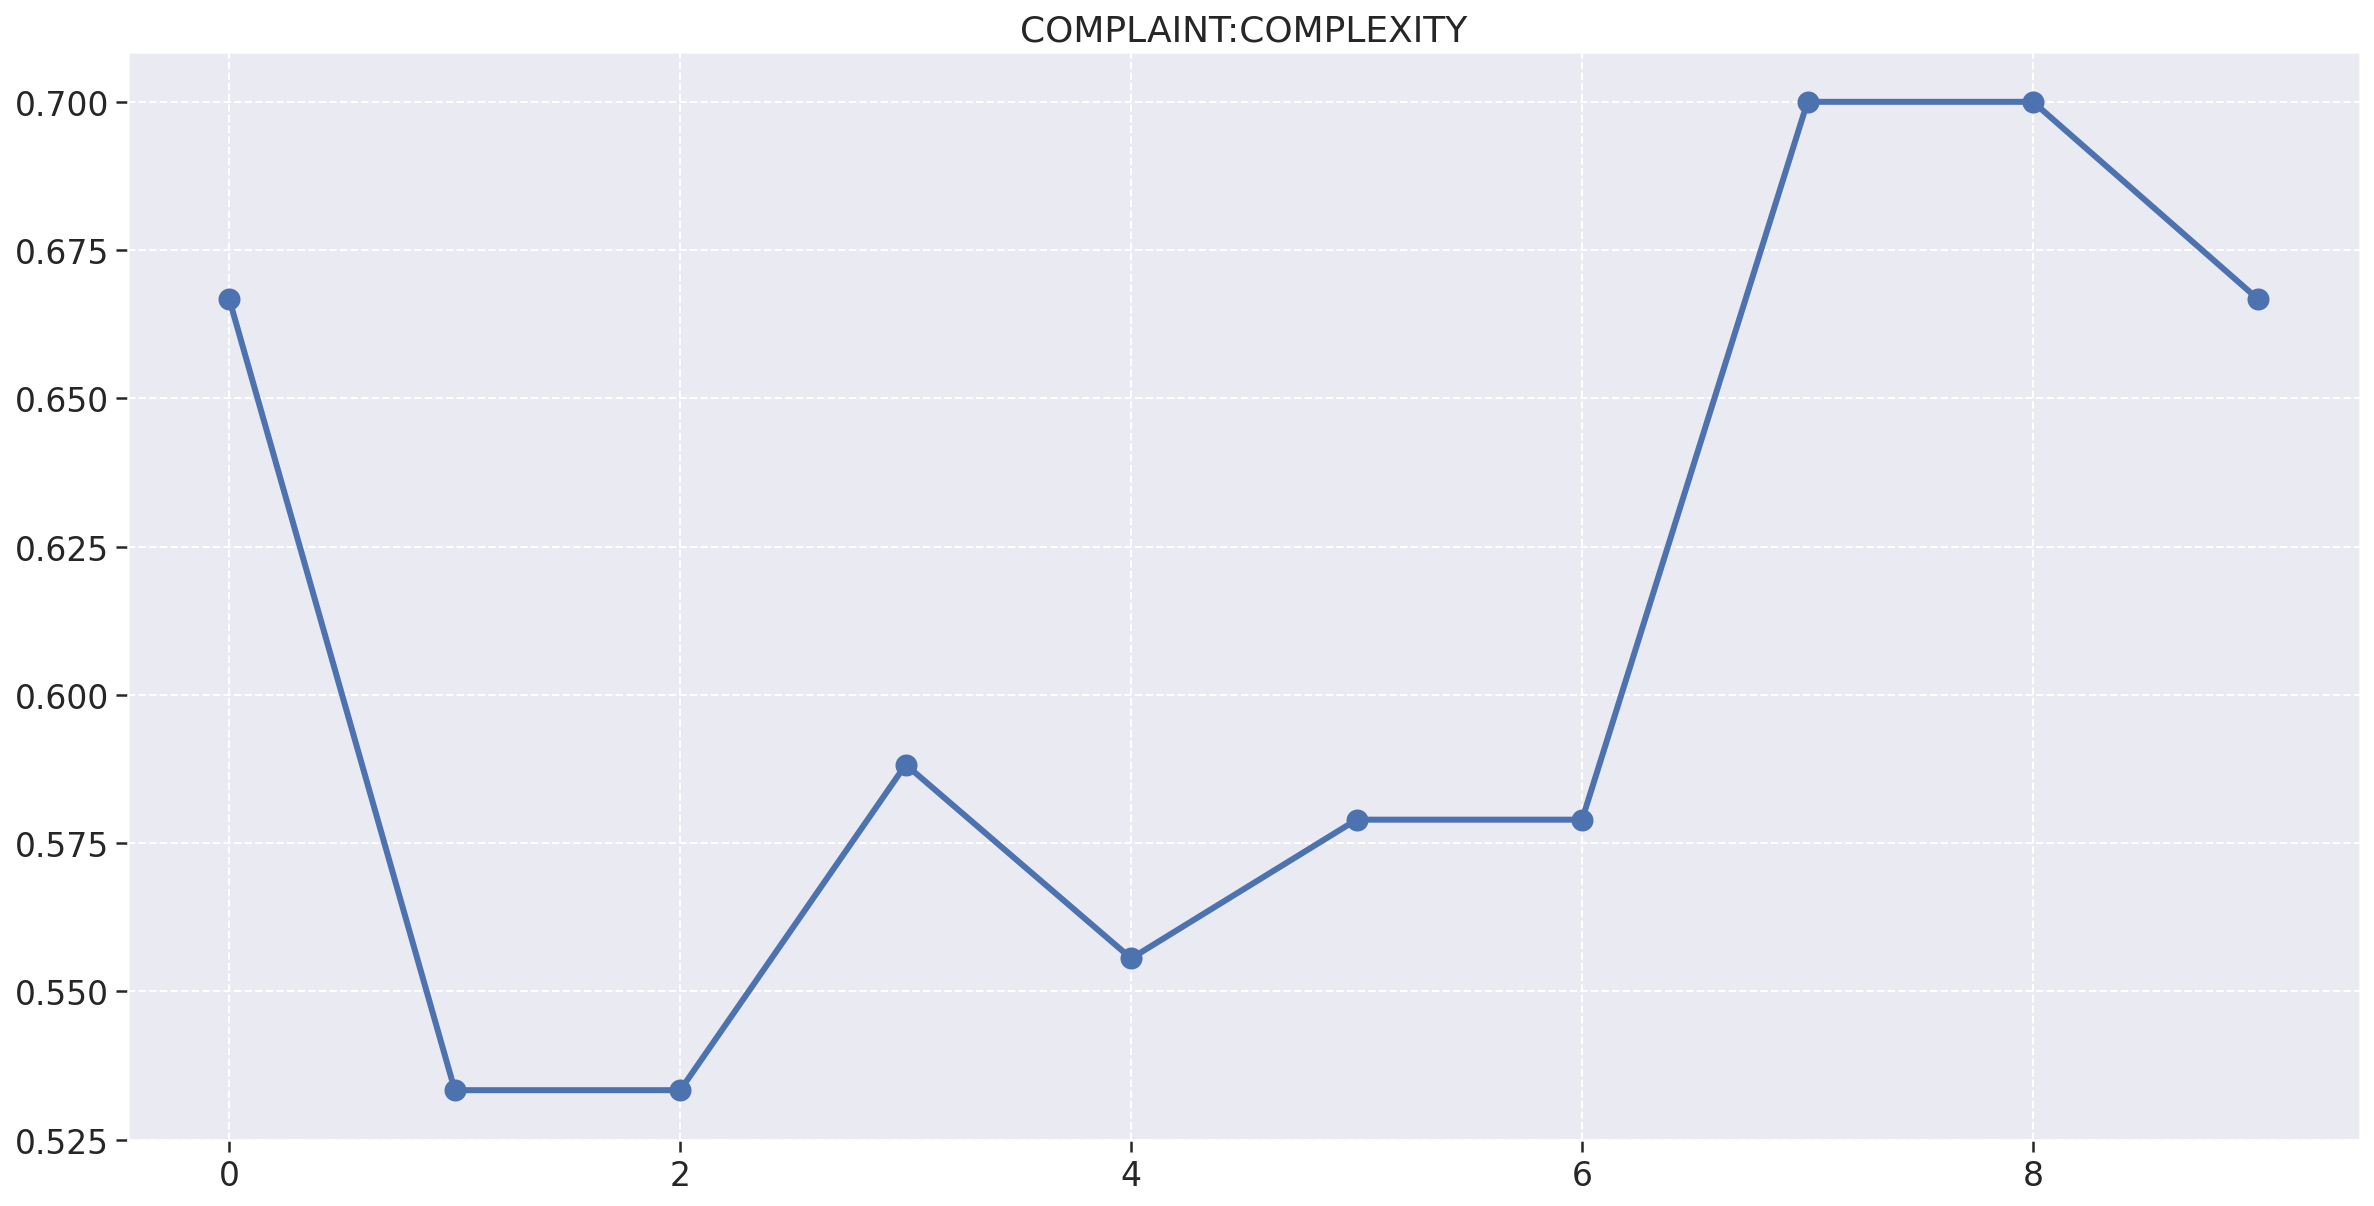

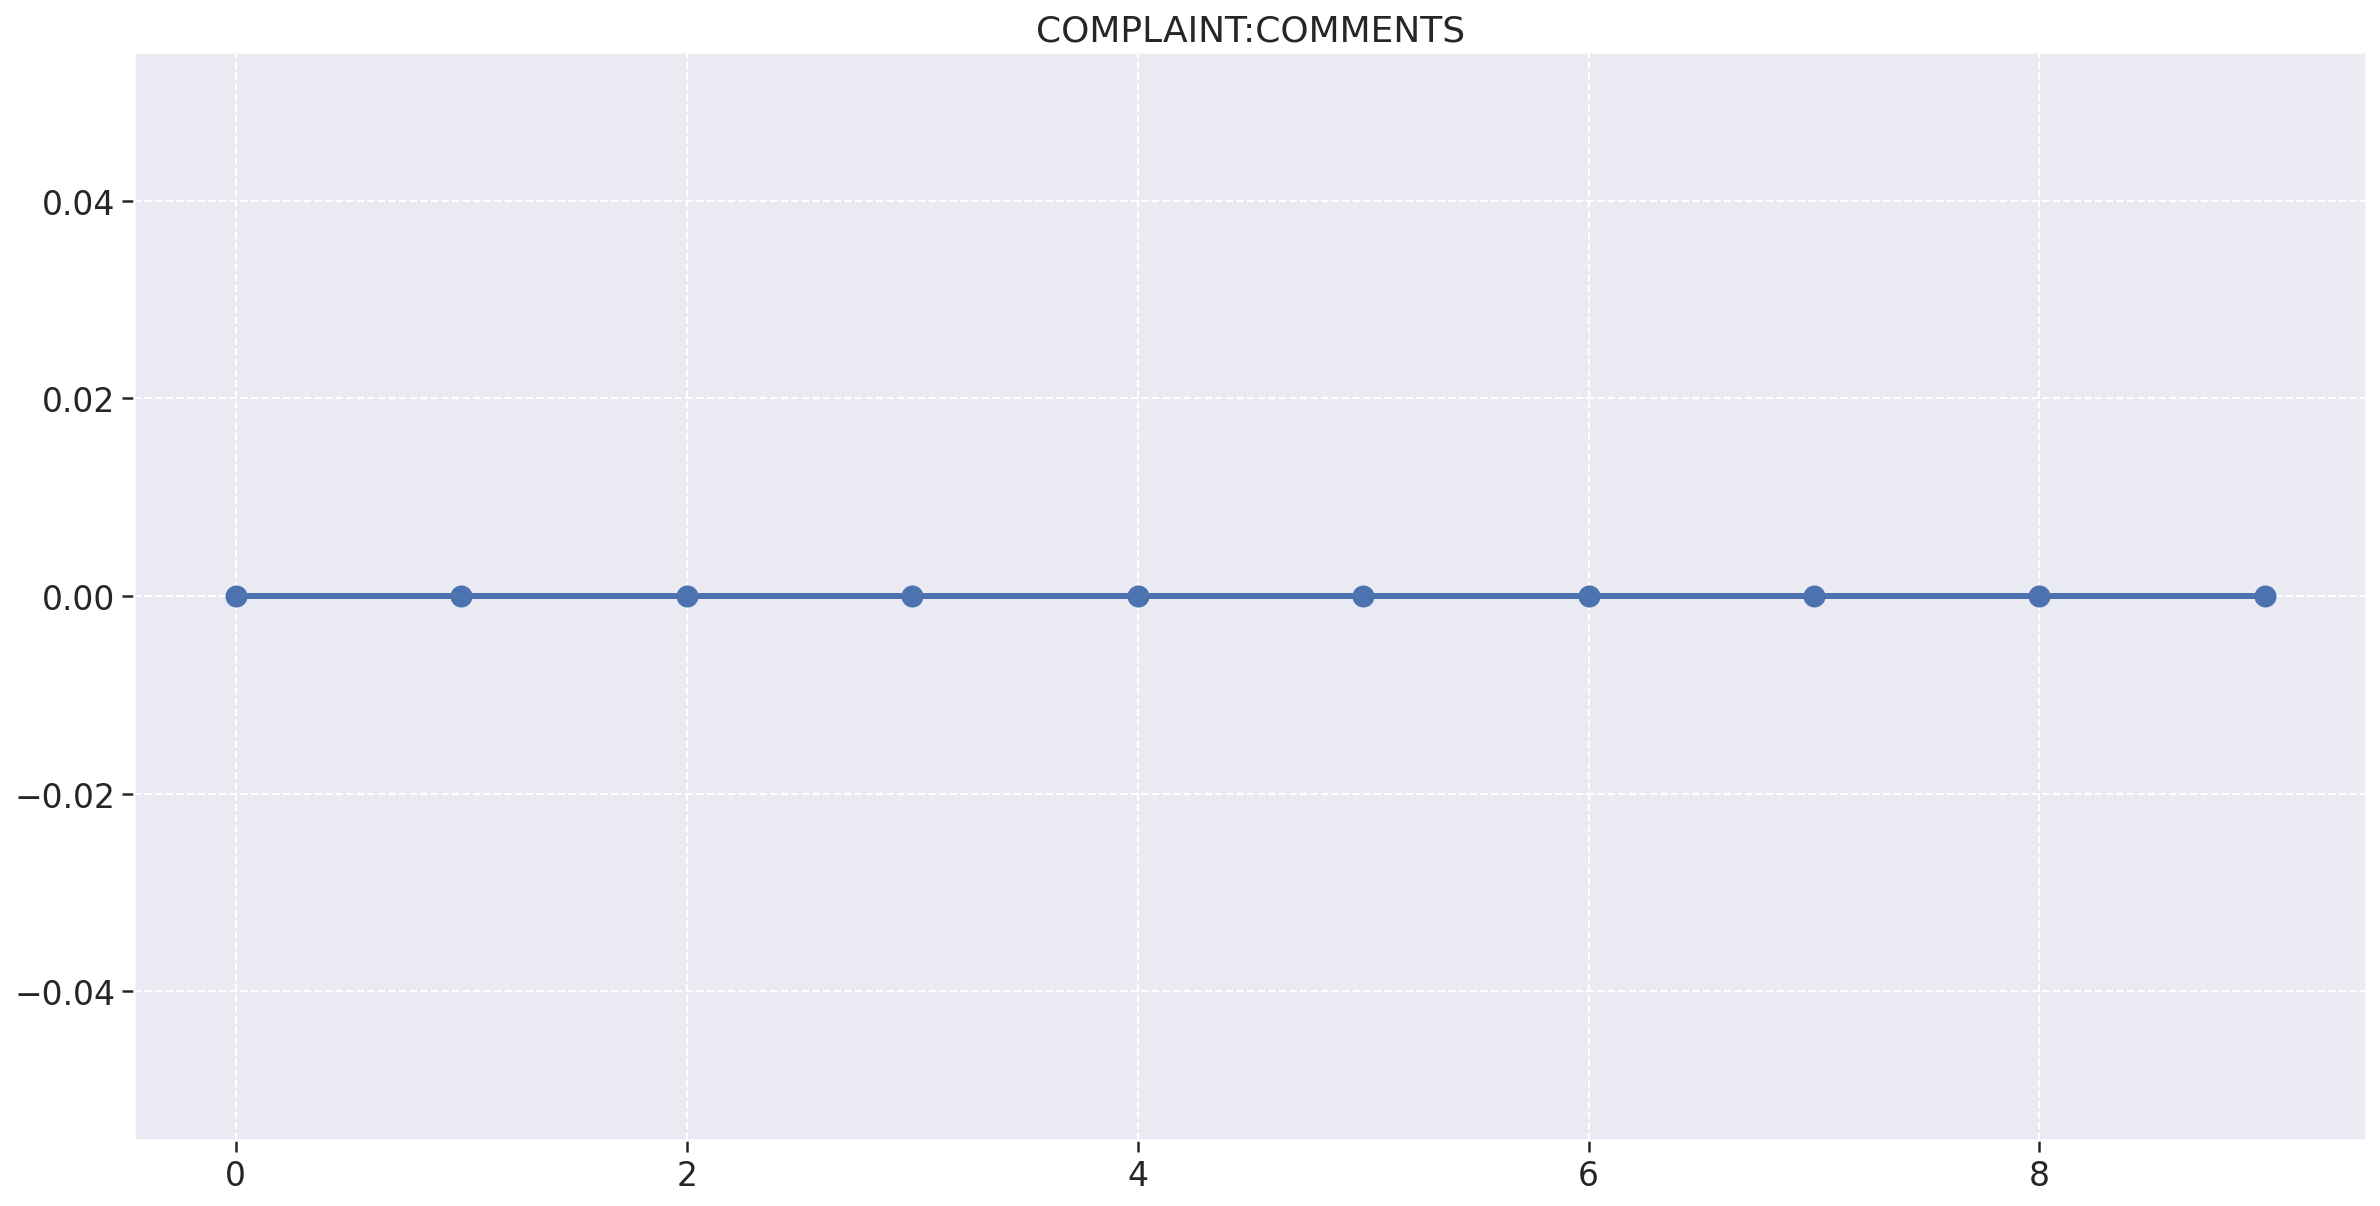

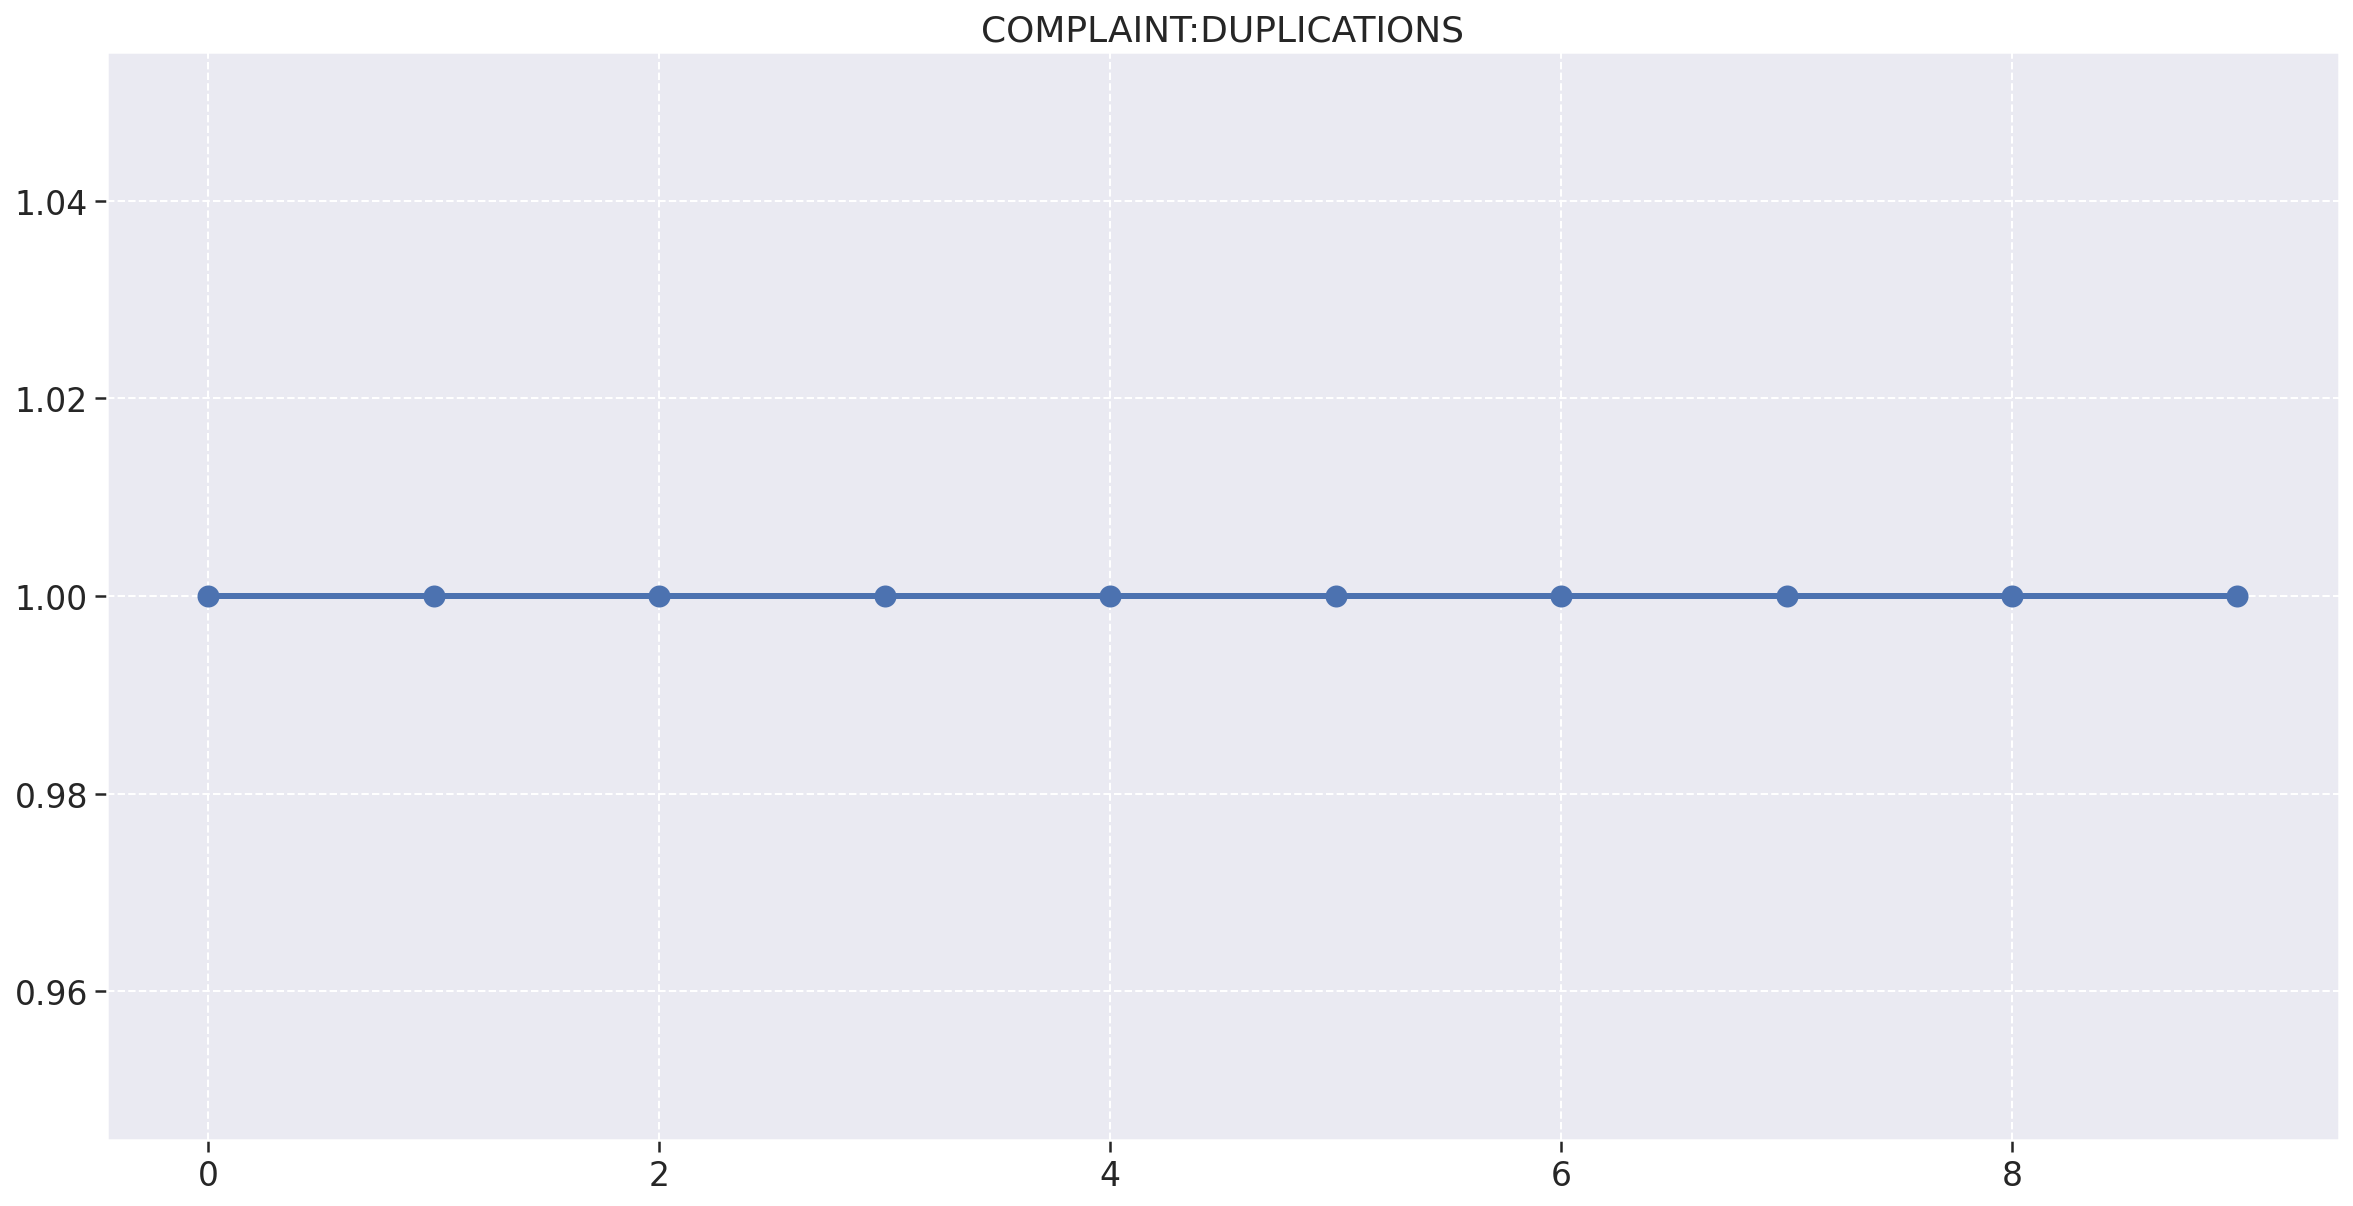

In [67]:
plot_history(generic_df, repository)

### Percentis

In [68]:
descriptive_percentage(generic_df)

### Regressão Linear

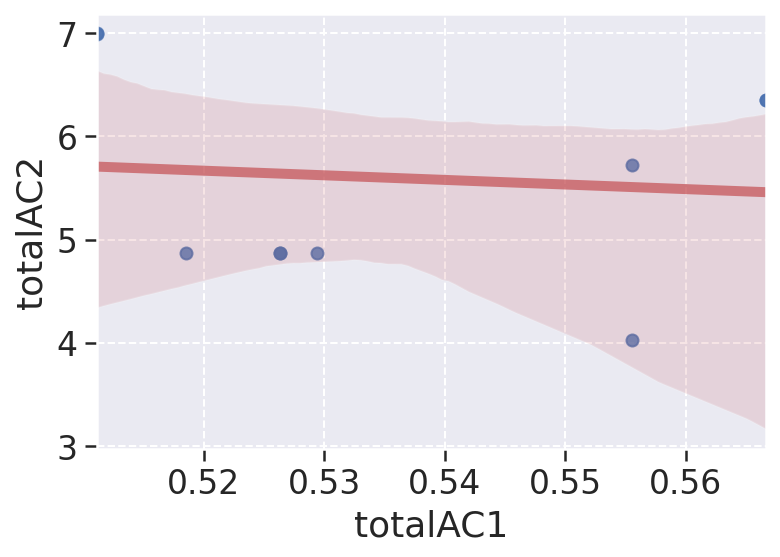

In [69]:
plot_linear_regression(generic_df)

### Histogramas

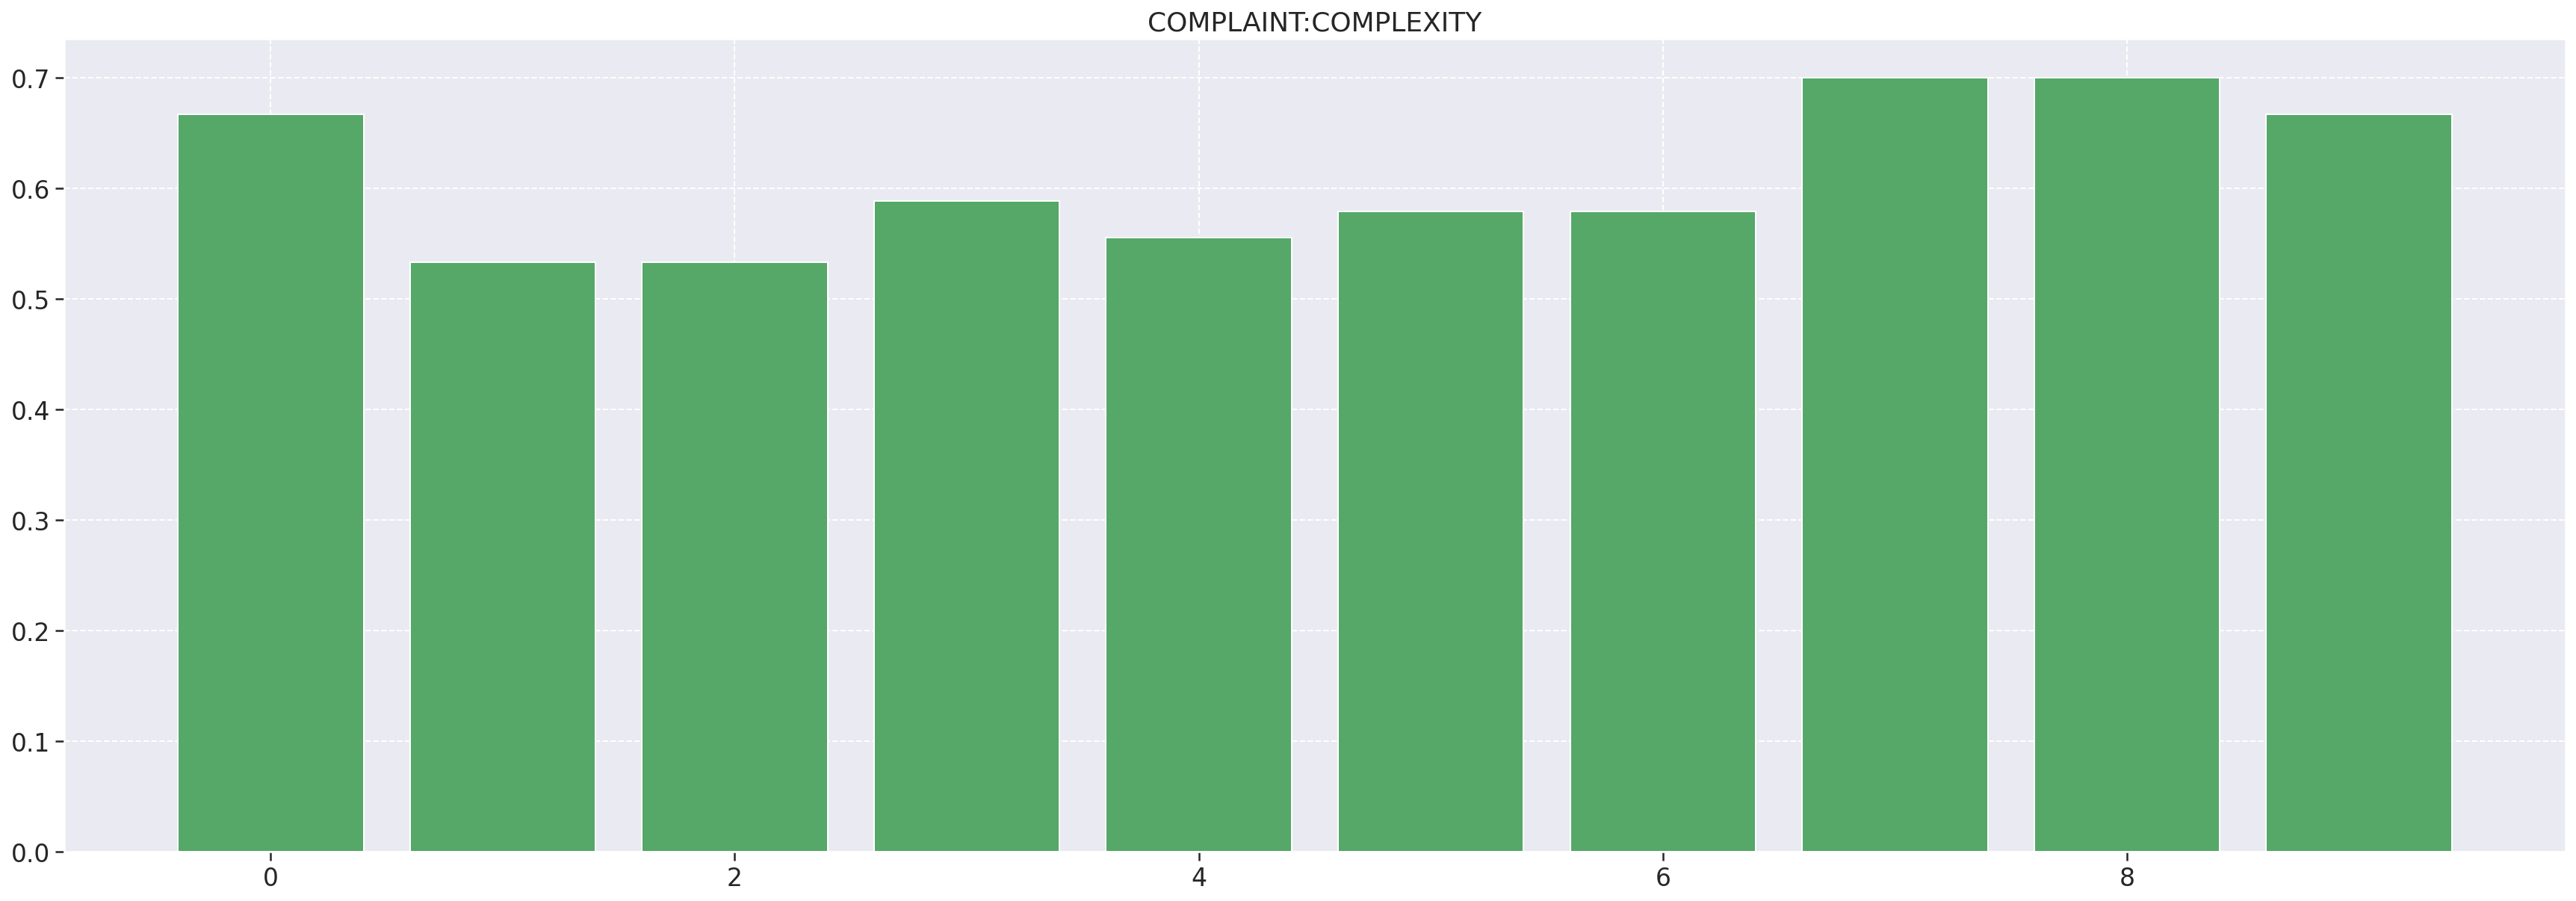

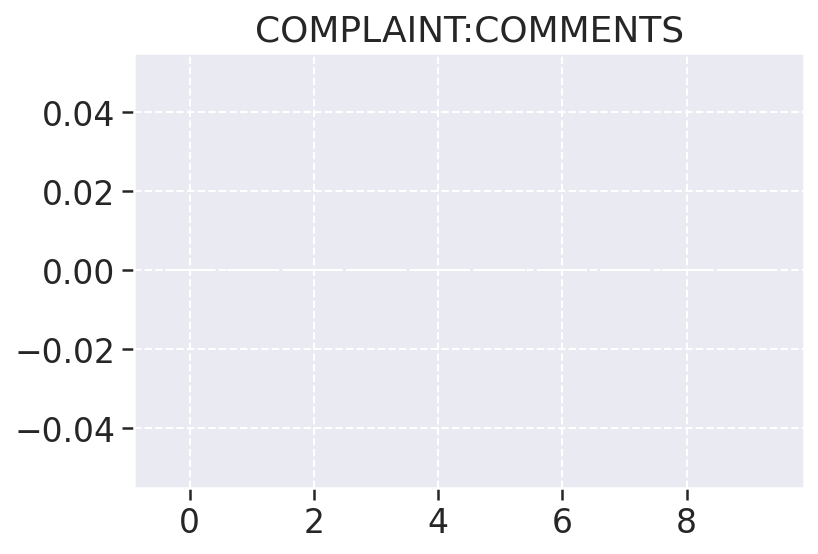

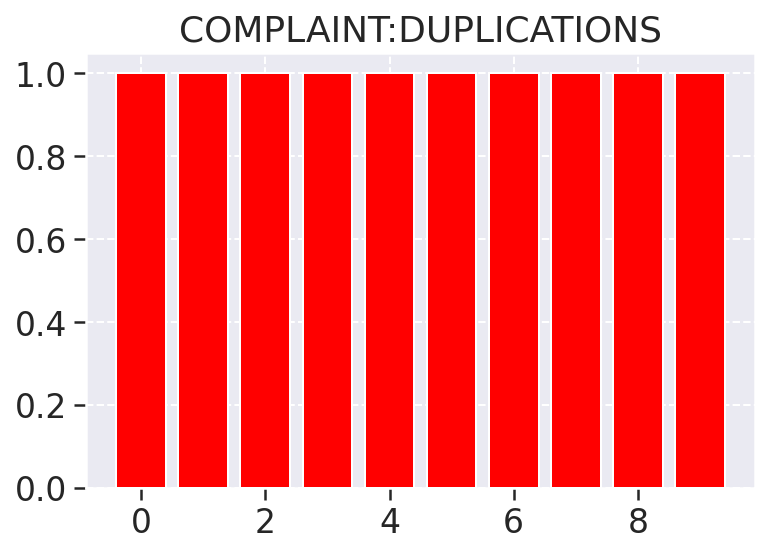

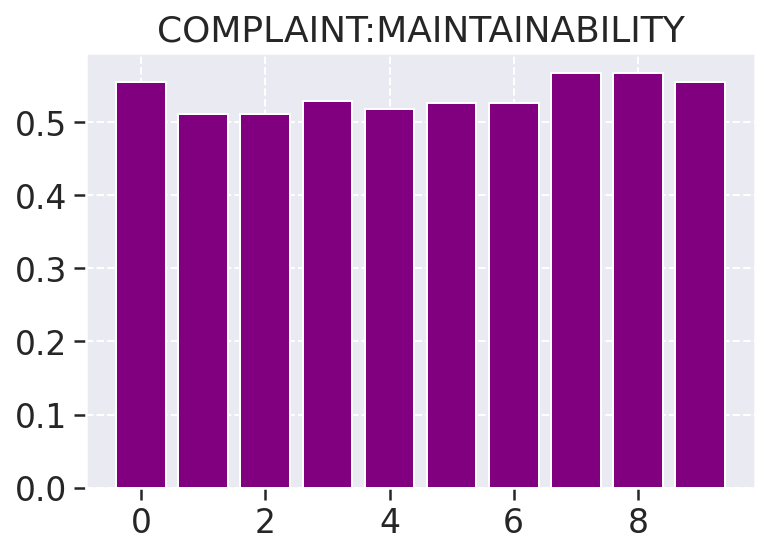

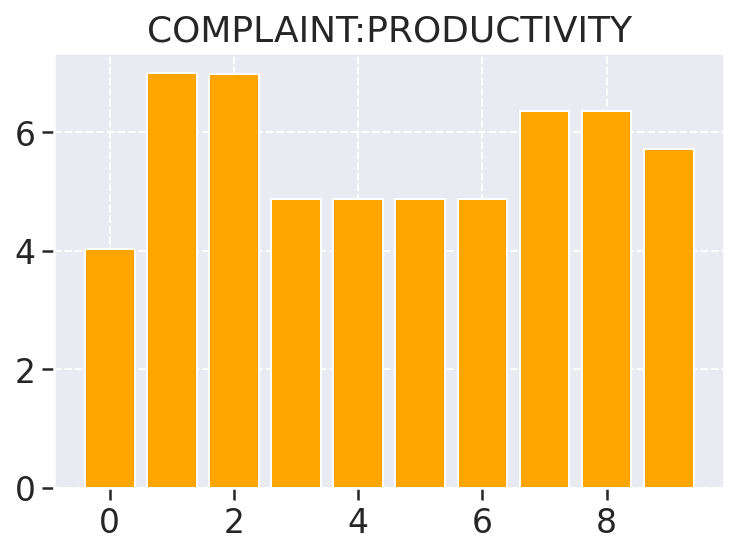

In [70]:
generate_histogram(repository, generic_df)

### Análise Descritiva

In [71]:
descriptive_statistics(generic_df)

count        mean         std         min         25%         50%  \
m1         10.0    0.610169    0.066453    0.533333    0.561404    0.583591   
m2         10.0    0.000000    0.000000    0.000000    0.000000    0.000000   
m3         10.0    1.000000    0.000000    1.000000    1.000000    1.000000   
ncloc      10.0  577.100000  189.824158  163.000000  479.500000  606.500000   
m7         10.0    5.549000    0.882427    4.660000    5.080000    5.295000   
m9         10.0    5.635000    1.385113    3.390000    4.660000    5.505000   
asc1       10.0    0.536723    0.022151    0.511111    0.520468    0.527864   
ac1        10.0    0.536723    0.022151    0.511111    0.520468    0.527864   
totalAC1   10.0    0.536723    0.022151    0.511111    0.520468    0.527864   
asc2       10.0    5.592000    1.035168    4.025000    4.870000    5.295000   
totalAC2   10.0    5.592000    1.035168    4.025000    4.870000    5.295000   

                 75%         max           var  
m1          0.666667    0.700000      0.004416  
m2          0.000000    0.000000      0.000000  
m3          1.000000    1.000000      0.000000  
ncloc     689.750000  832.000000  36033.211111  
m7          5.930000    7.630000      0.778677  
m9          6.675000    8.050000      1.918539  
asc1        0.555556    0.566667      0.000491  
ac1         0.555556    0.566667      0.000491  
totalAC1    0.555556    0.566667      0.000491  
asc2        6.355000    6.995000      1.071573  
totalAC2    6.355000    6.995000      1.071573

### Matriz de Correlação

In [72]:
correlationMatrix(generic_df)

m1  m2  m3     ncloc        m7        m9      asc1       ac1  \
m1        1.000000 NaN NaN  0.312020 -0.187111 -0.023440  1.000000  1.000000   
m2             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
m3             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
ncloc     0.312020 NaN NaN  1.000000  0.085105  0.368582  0.312020  0.312020   
m7       -0.187111 NaN NaN  0.085105  1.000000  0.650057 -0.187111 -0.187111   
m9       -0.023440 NaN NaN  0.368582  0.650057  1.000000 -0.023440 -0.023440   
asc1      1.000000 NaN NaN  0.312020 -0.187111 -0.023440  1.000000  1.000000   
ac1       1.000000 NaN NaN  0.312020 -0.187111 -0.023440  1.000000  1.000000   
totalAC1  1.000000 NaN NaN  0.312020 -0.187111 -0.023440  1.000000  1.000000   
asc2     -0.095433 NaN NaN  0.282866  0.861130  0.946098 -0.095433 -0.095433   
totalAC2 -0.095433 NaN NaN  0.282866  0.861130  0.946098 -0.095433 -0.095433   

          totalAC1      asc2  totalAC2  
m1        1.000000 -0.095433 -0.095433  
m2             NaN       NaN       NaN  
m3             NaN       NaN       NaN  
ncloc     0.312020  0.282866  0.282866  
m7       -0.187111  0.861130  0.861130  
m9       -0.023440  0.946098  0.946098  
asc1      1.000000 -0.095433 -0.095433  
ac1       1.000000 -0.095433 -0.095433  
totalAC1  1.000000 -0.095433 -0.095433  
asc2     -0.095433  1.000000  1.000000  
totalAC2 -0.095433  1.000000  1.000000

### Box-plot

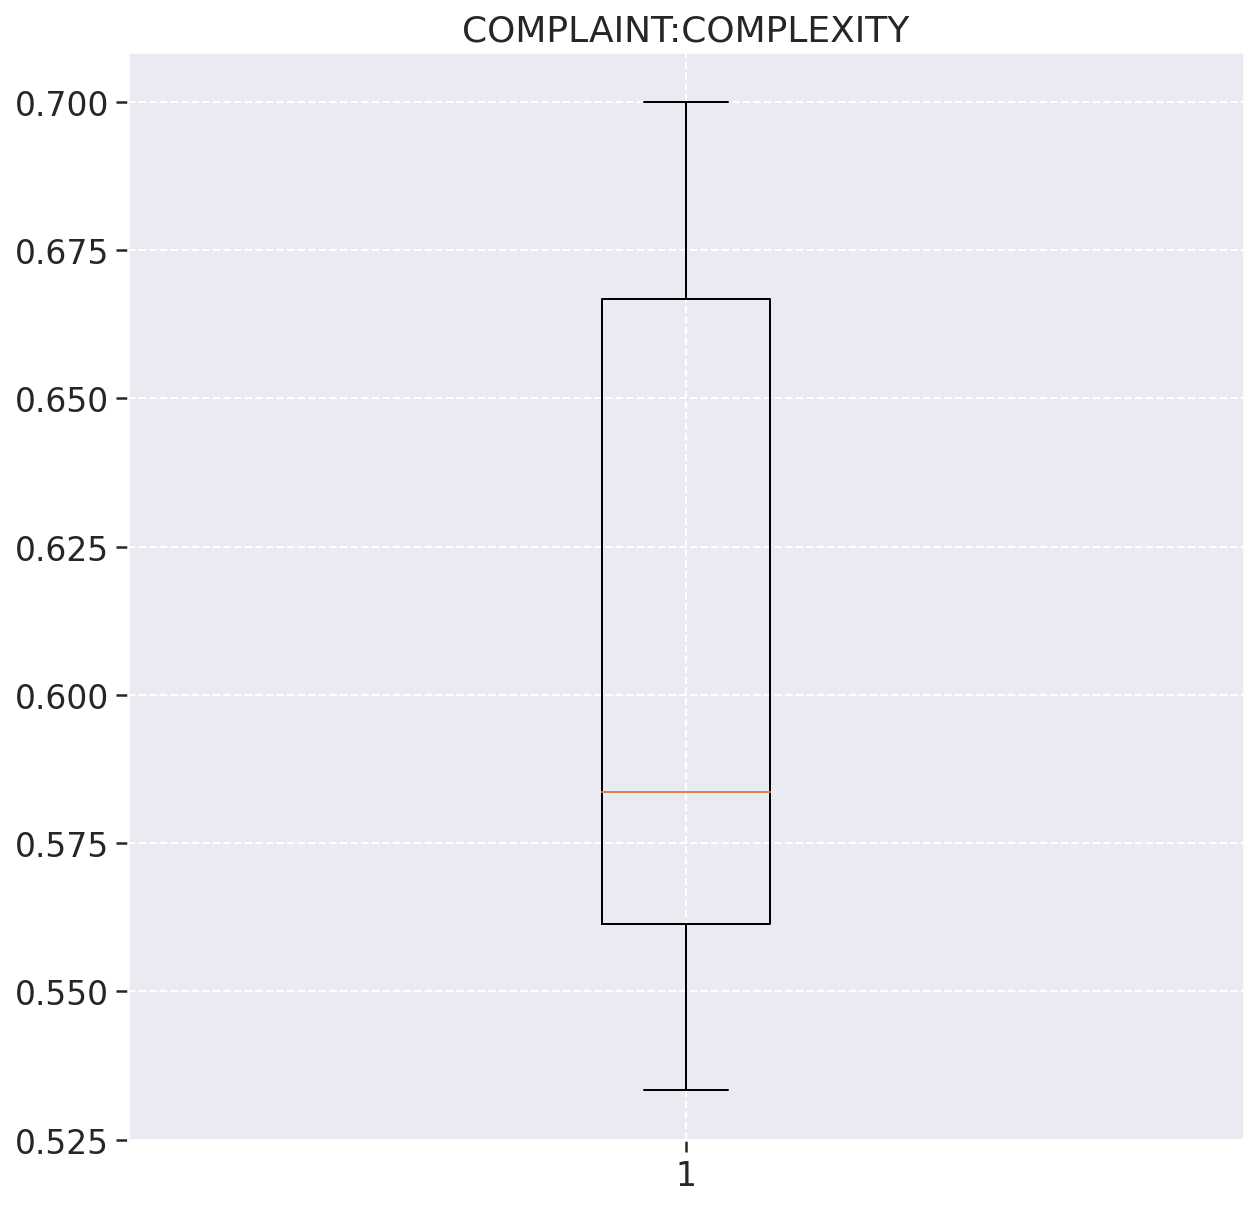

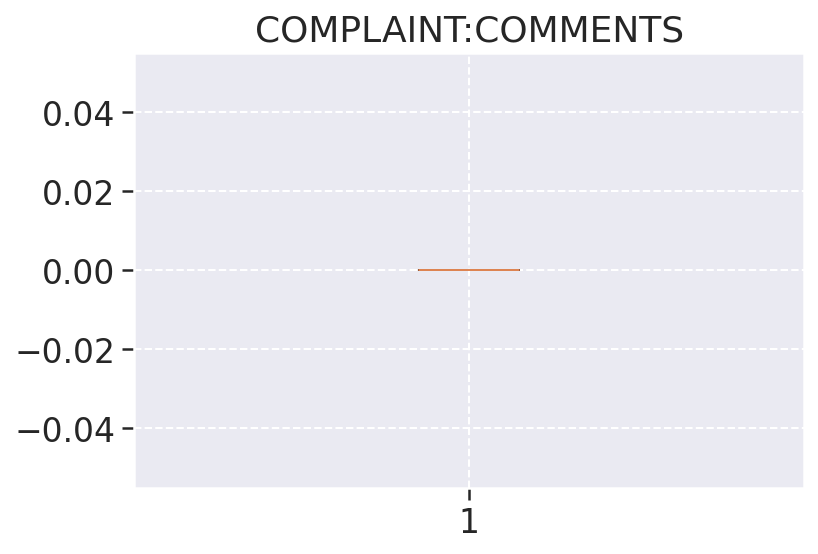

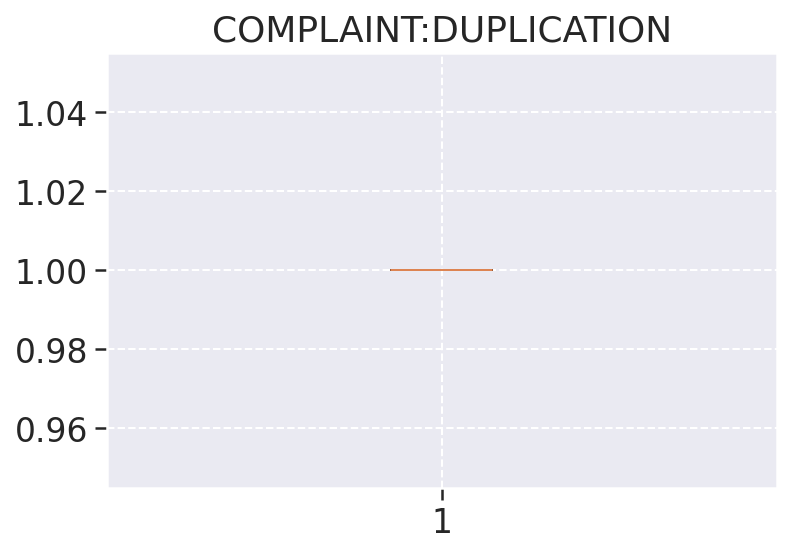

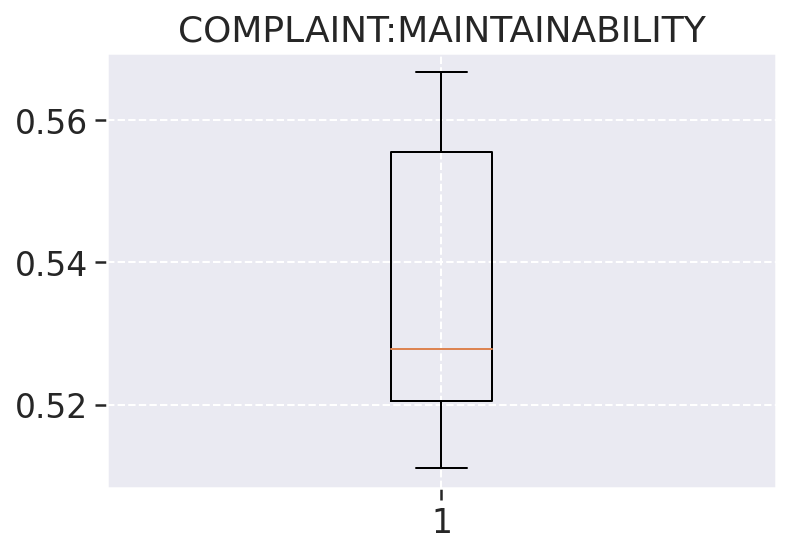

In [73]:
generate_boxplot(generic_df, repository)

## Gateway

In [74]:
generic_df = eccoar_gateway_metrics.copy()
repository = "GATEWAY"

### Gráfico histórico

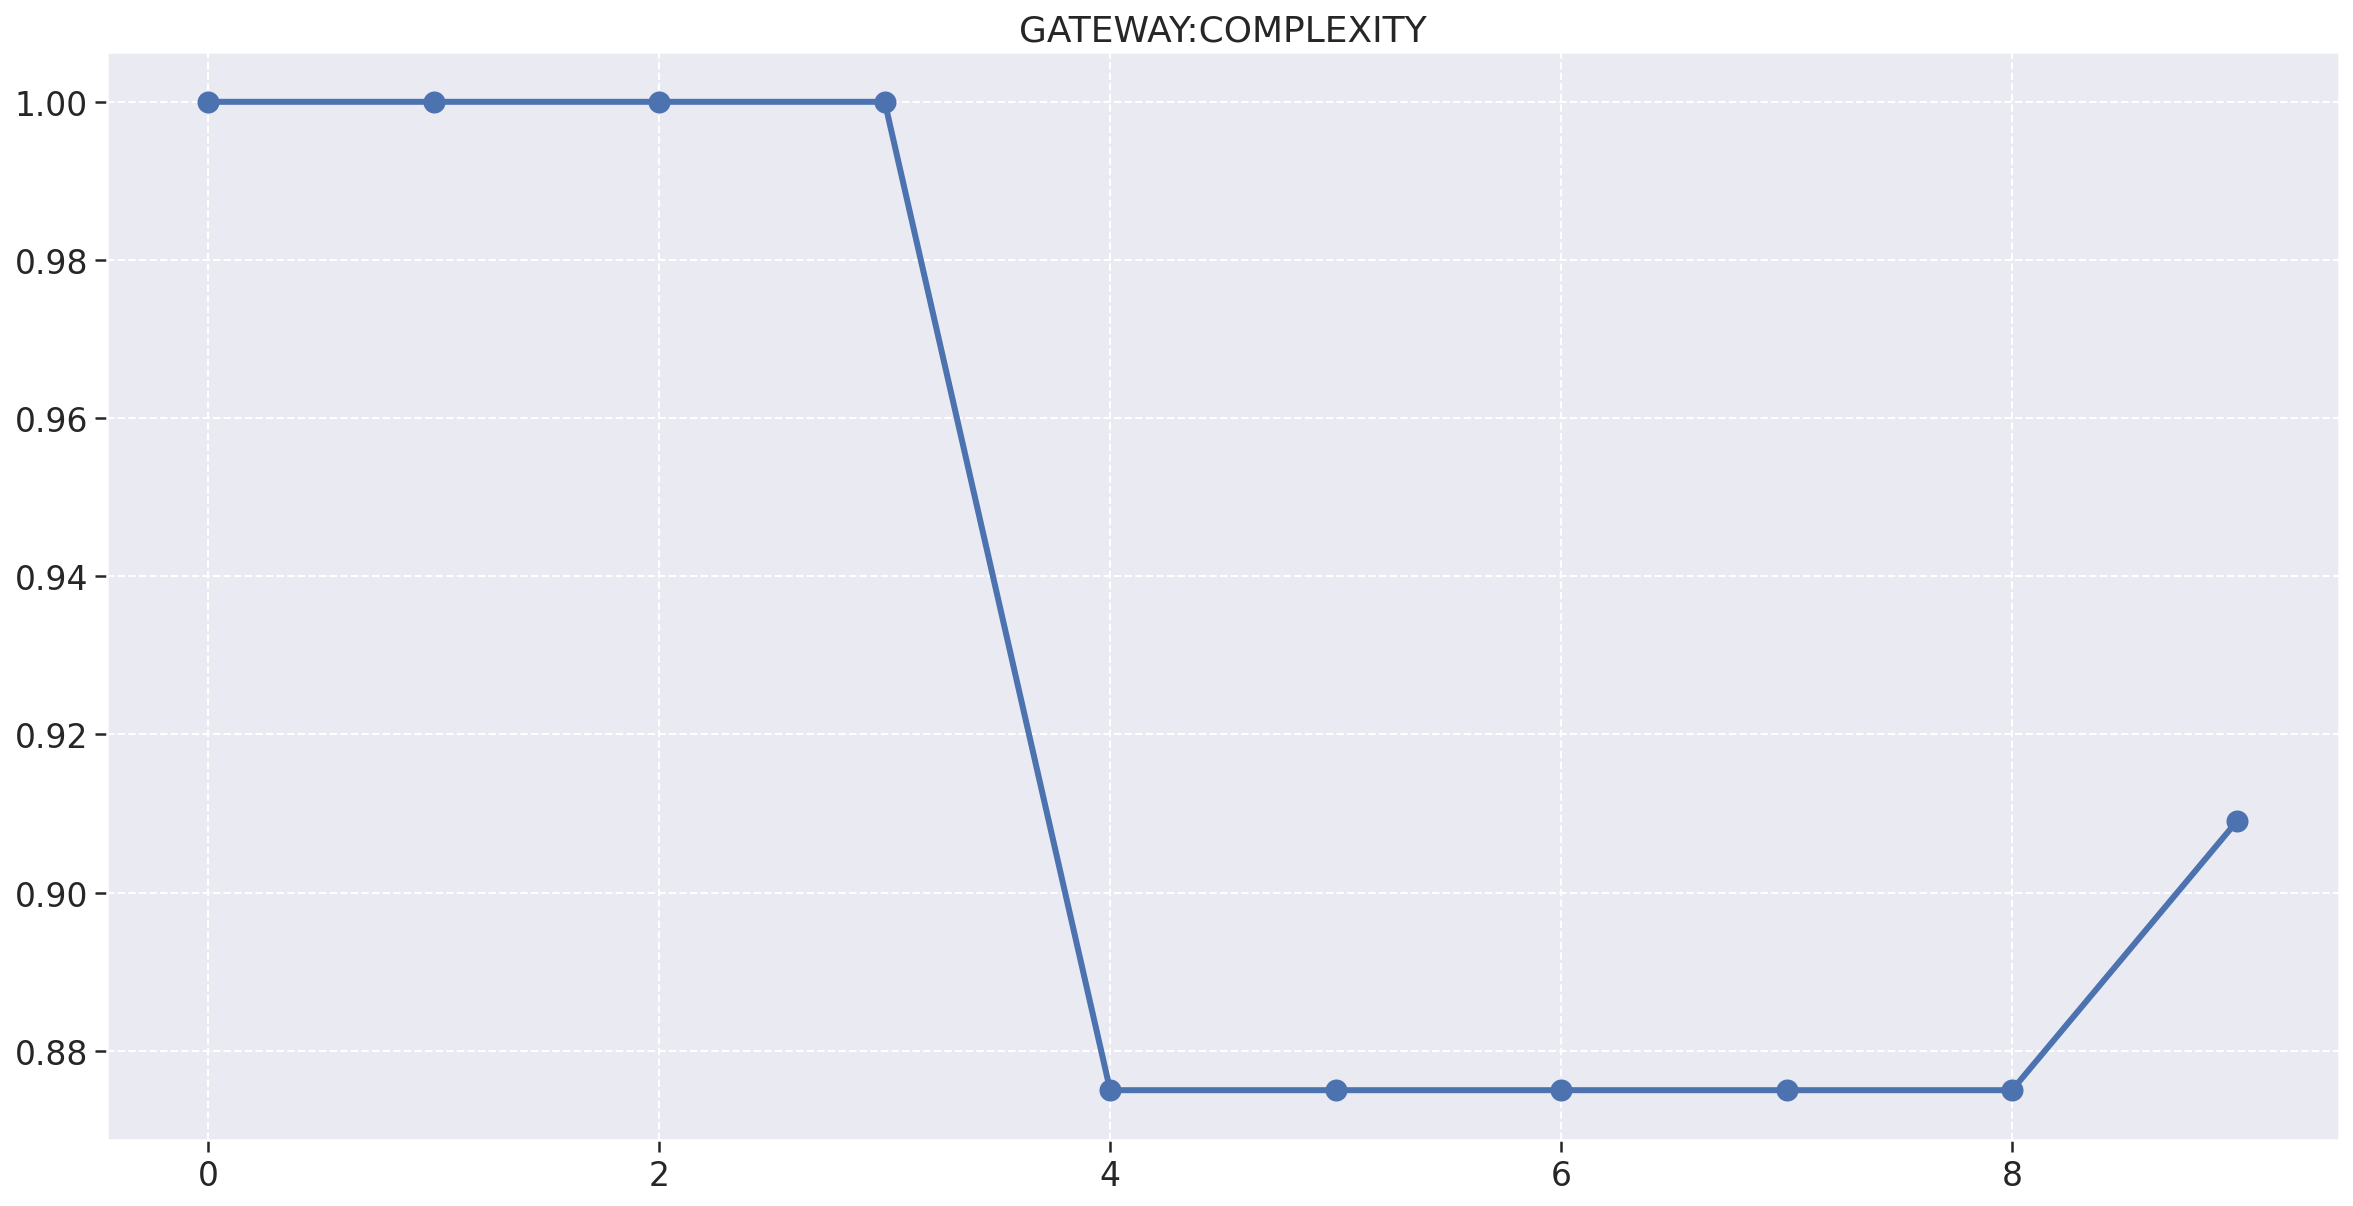

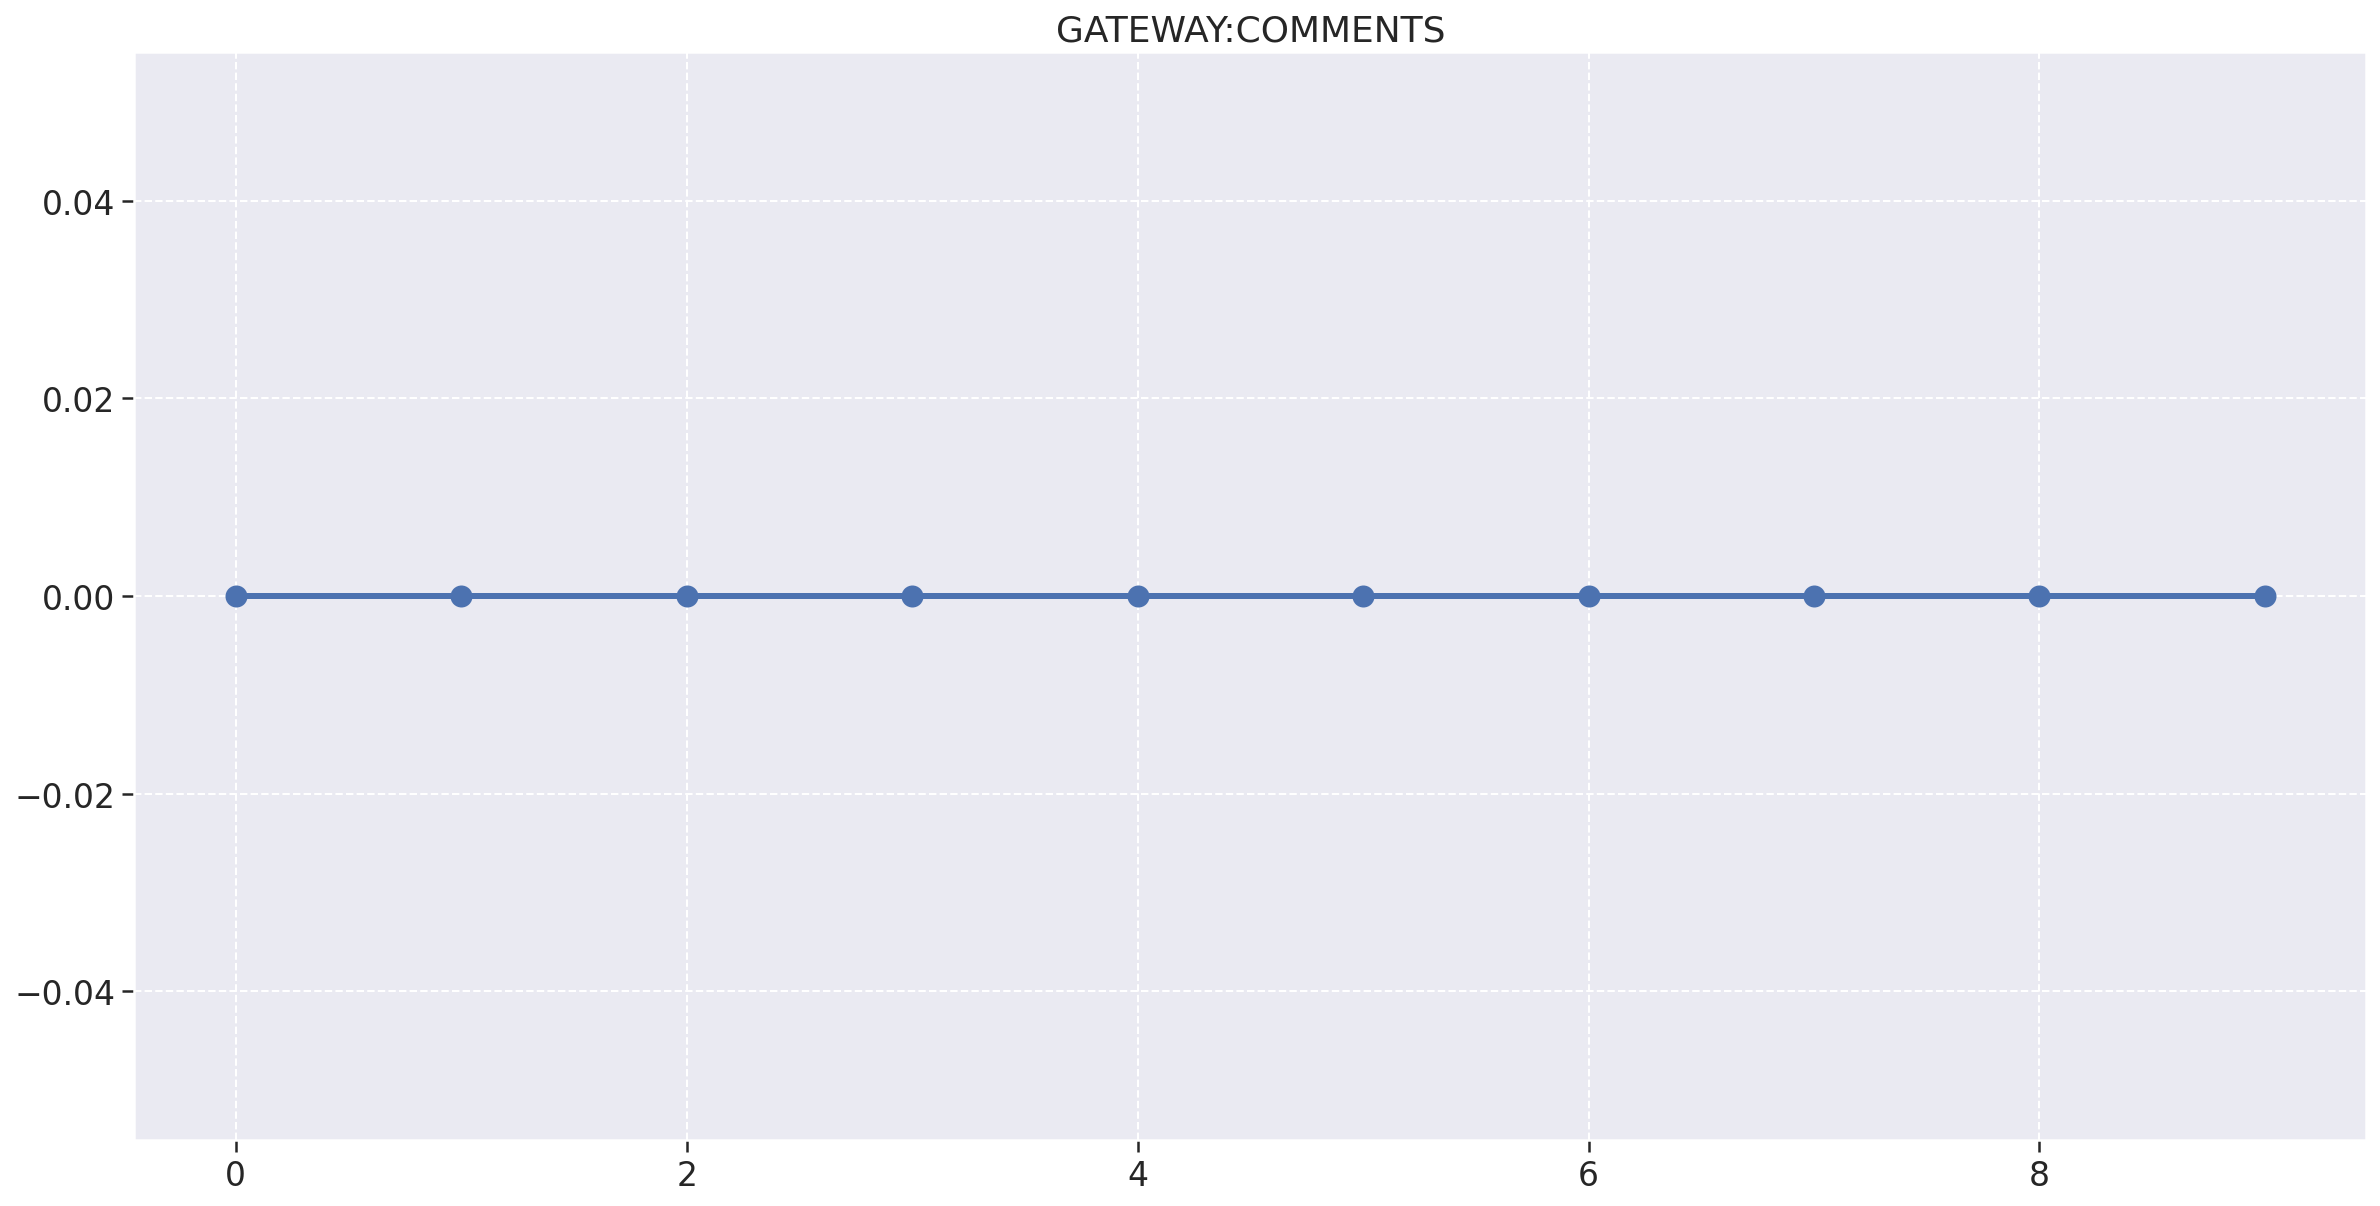

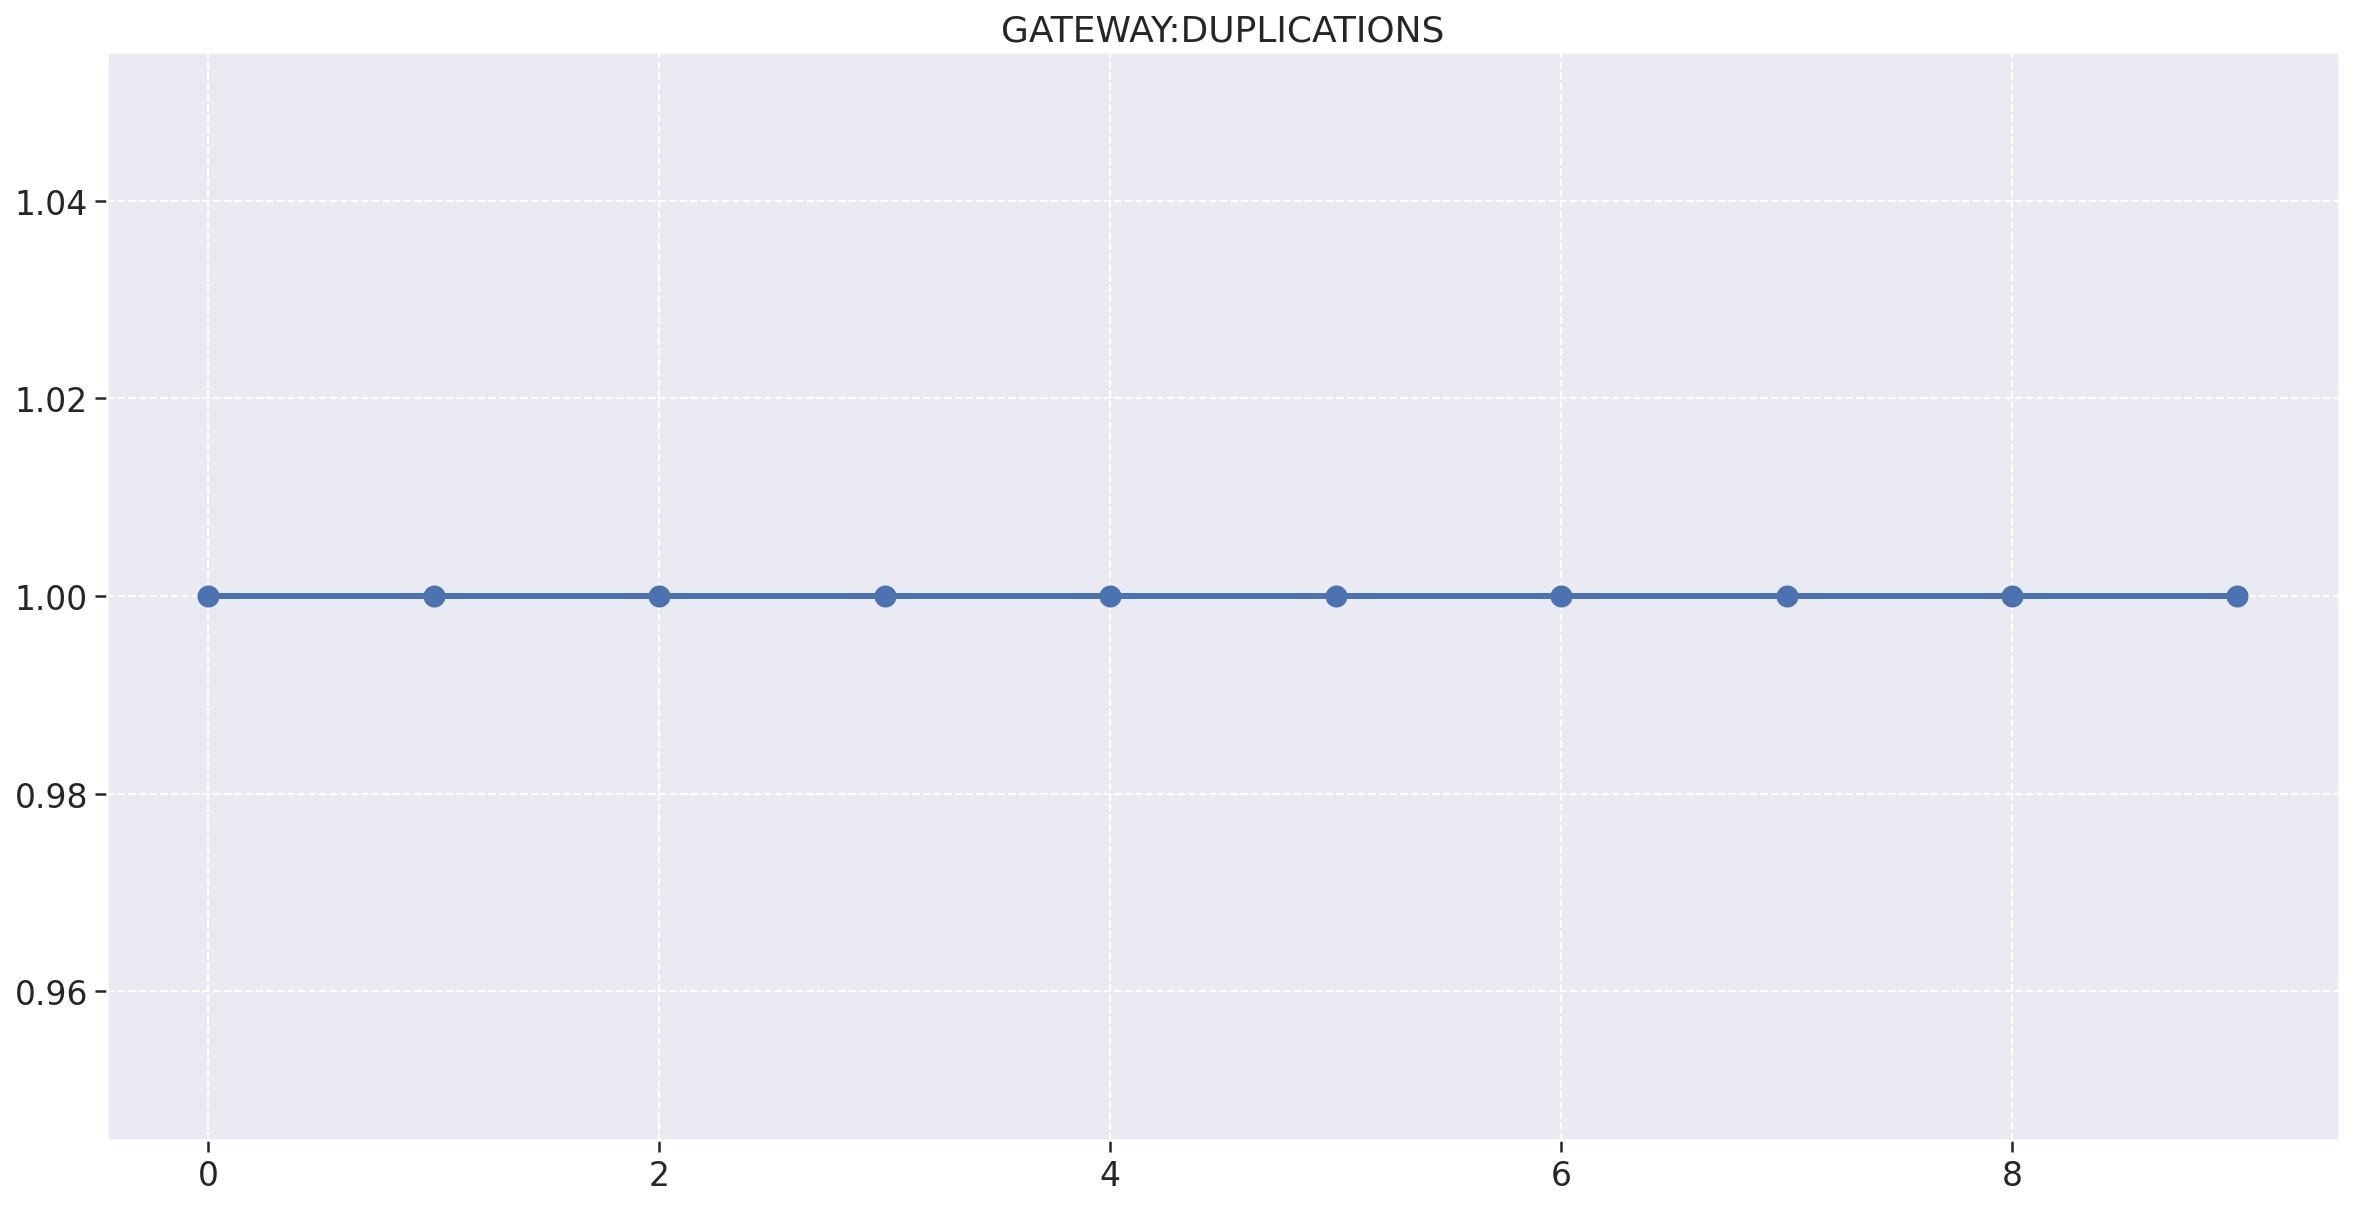

In [75]:
plot_history(generic_df, repository)

### Percentis

In [76]:
descriptive_percentage(generic_df)

### Regressão Linear

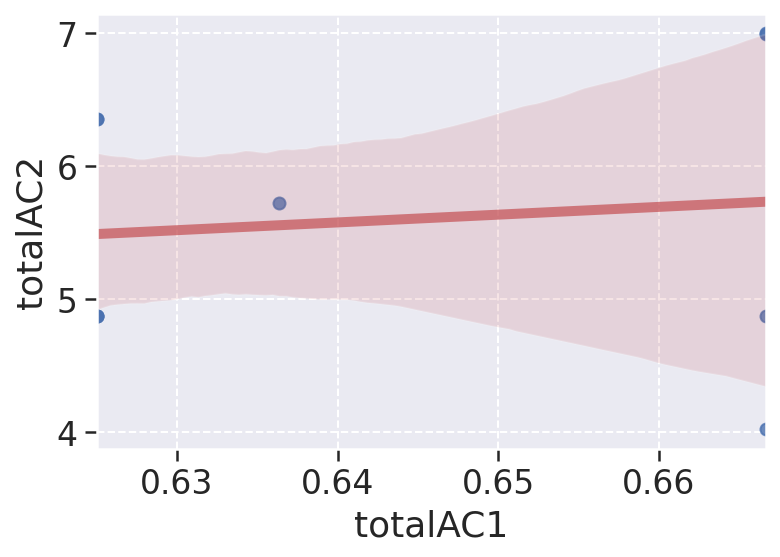

In [77]:
plot_linear_regression(generic_df)

### Histogramas

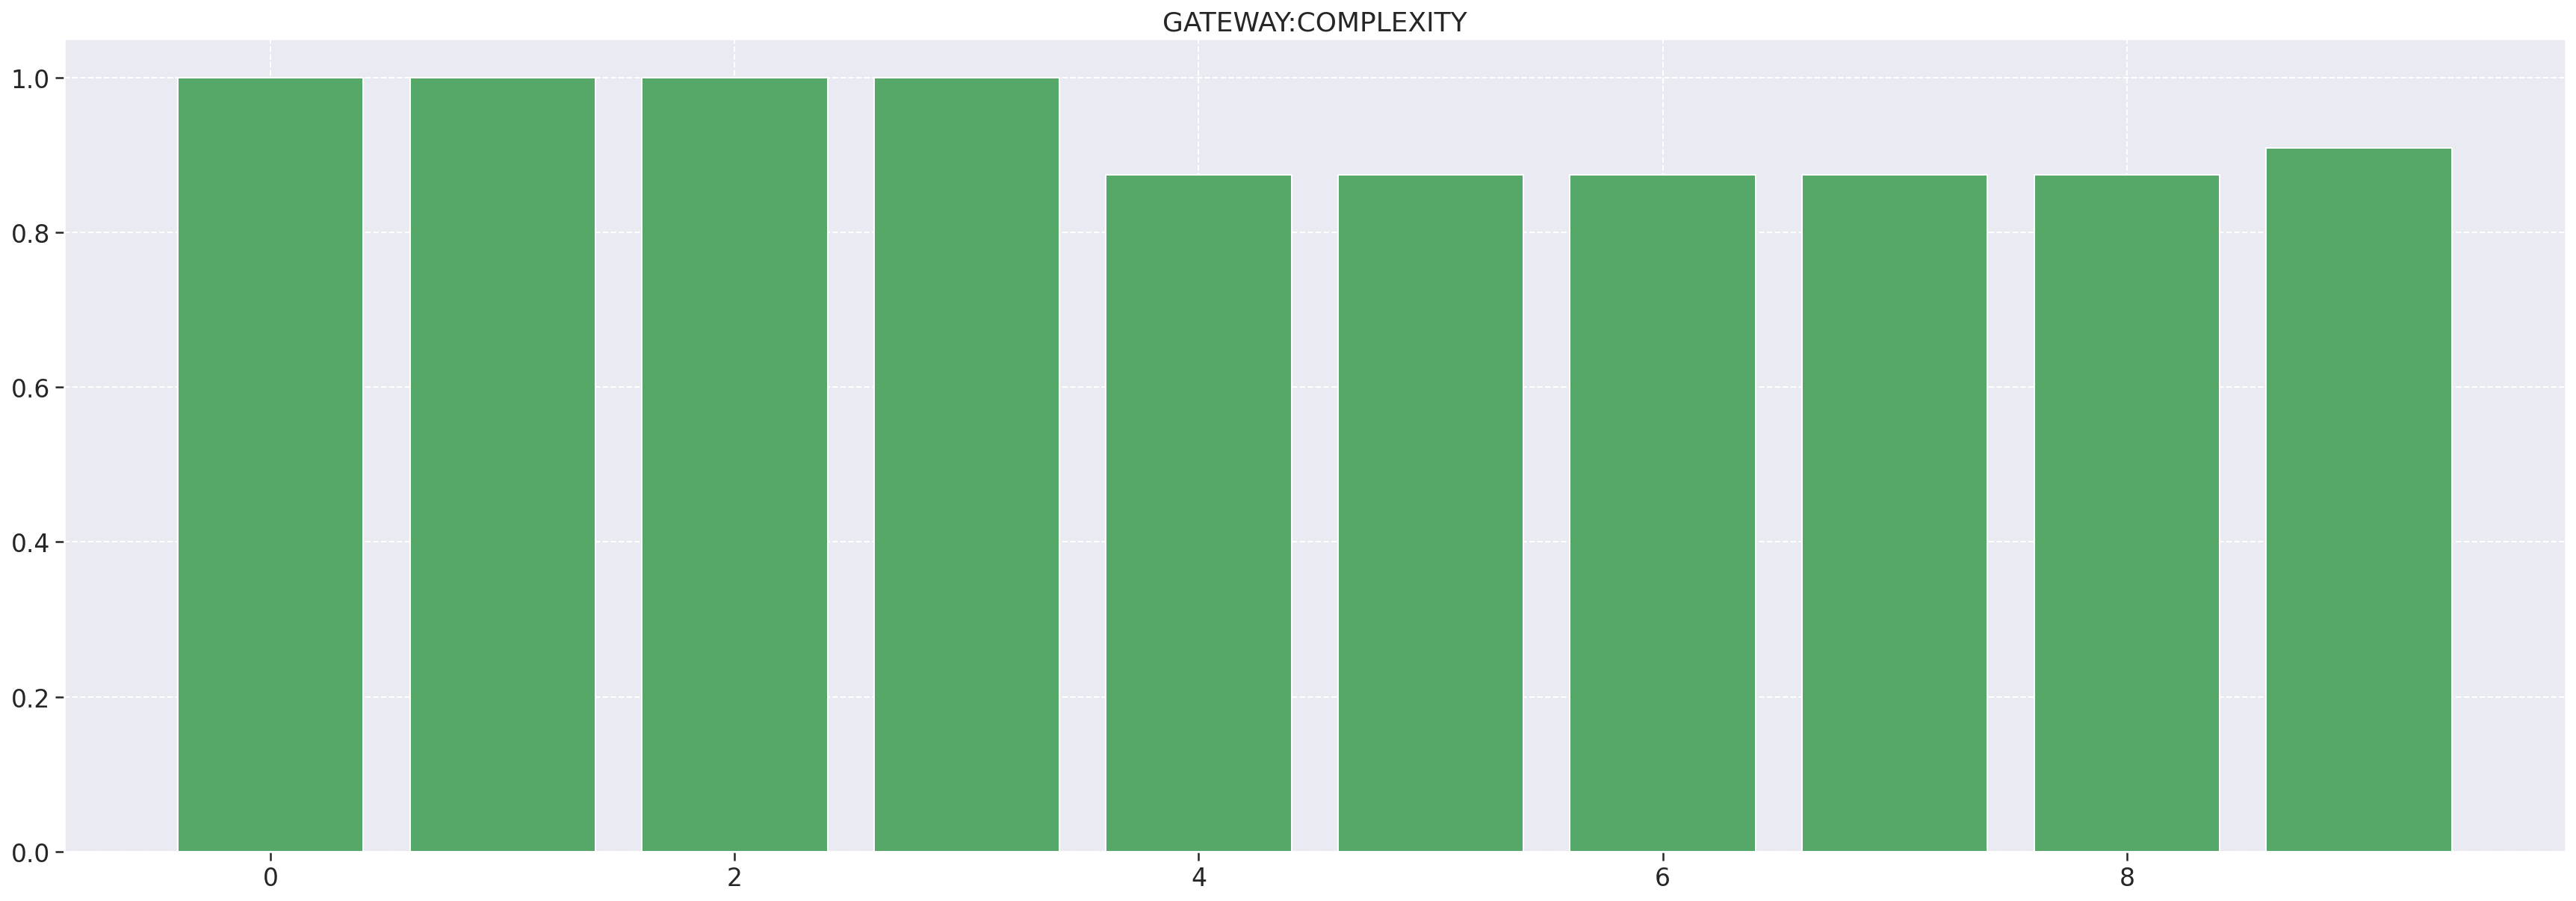

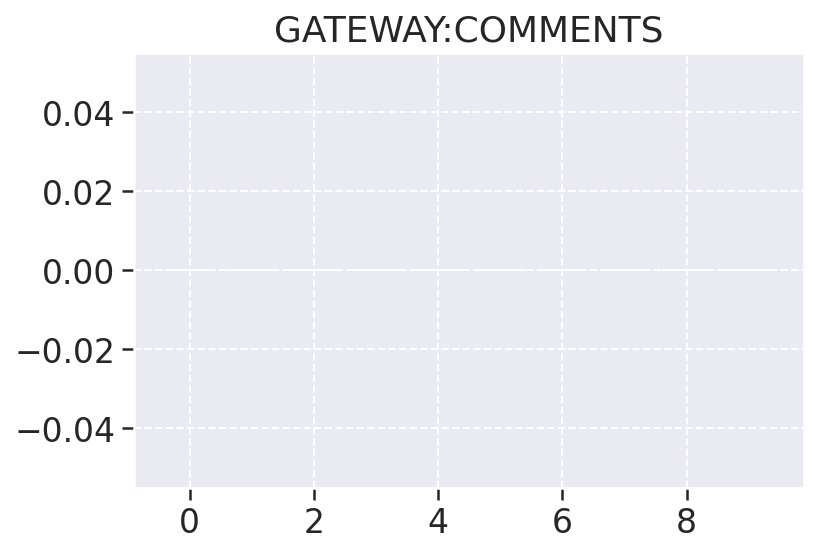

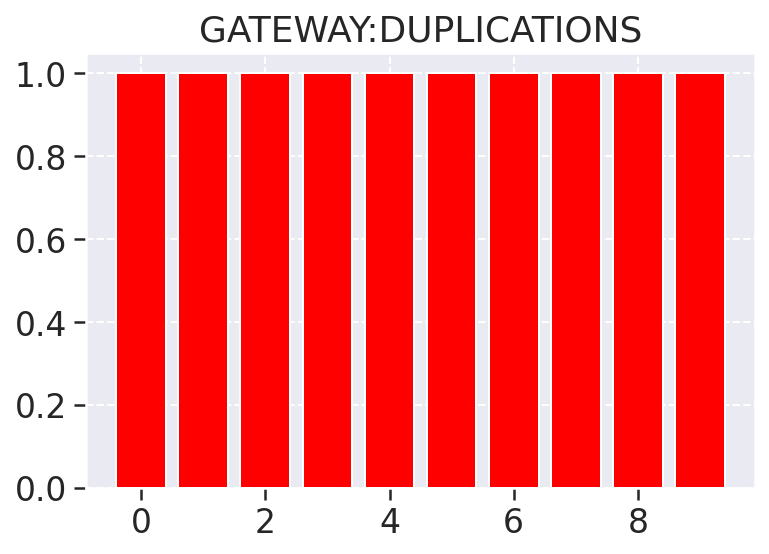

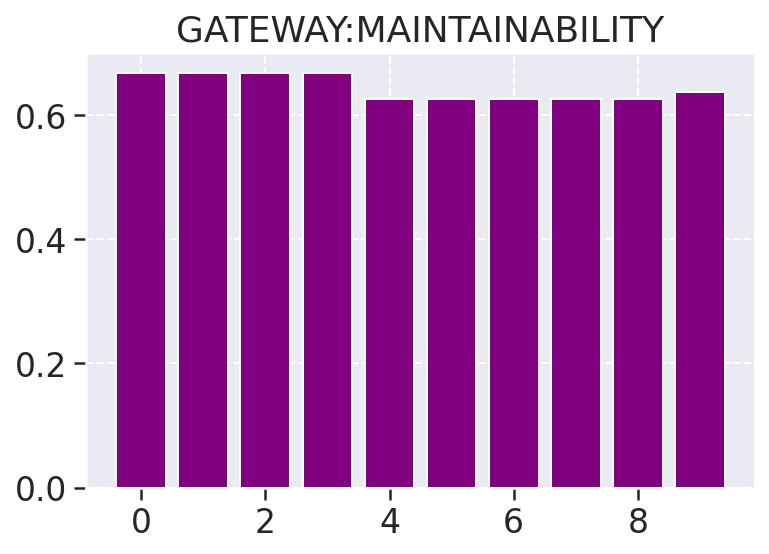

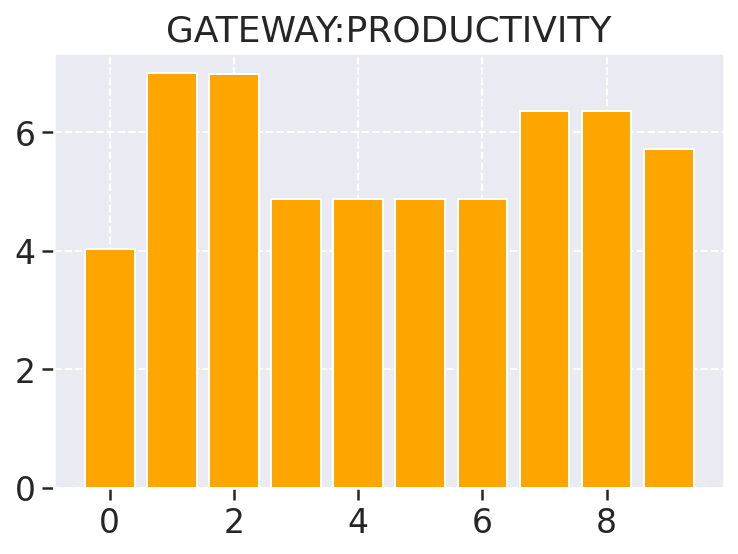

In [78]:
generate_histogram(repository, generic_df)

### Análise Descritiva

In [79]:
descriptive_statistics(generic_df)

count        mean        std      min      25%         50%  \
m1         10.0    0.928409   0.062483    0.875    0.875    0.892045   
m2         10.0    0.000000   0.000000    0.000    0.000    0.000000   
m3         10.0    1.000000   0.000000    1.000    1.000    1.000000   
ncloc      10.0  295.700000  94.558683  110.000  258.750  305.000000   
m7         10.0    5.549000   0.882427    4.660    5.080    5.295000   
m9         10.0    5.635000   1.385113    3.390    4.660    5.505000   
asc1       10.0    0.642803   0.020828    0.625    0.625    0.630682   
ac1        10.0    0.642803   0.020828    0.625    0.625    0.630682   
totalAC1   10.0    0.642803   0.020828    0.625    0.625    0.630682   
asc2       10.0    5.592000   1.035168    4.025    4.870    5.295000   
totalAC2   10.0    5.592000   1.035168    4.025    4.870    5.295000   

                 75%         max          var  
m1          1.000000    1.000000     0.003904  
m2          0.000000    0.000000     0.000000  
m3          1.000000    1.000000     0.000000  
ncloc     317.000000  494.000000  8941.344444  
m7          5.930000    7.630000     0.778677  
m9          6.675000    8.050000     1.918539  
asc1        0.666667    0.666667     0.000434  
ac1         0.666667    0.666667     0.000434  
totalAC1    0.666667    0.666667     0.000434  
asc2        6.355000    6.995000     1.071573  
totalAC2    6.355000    6.995000     1.071573

### Matriz de Correlação

In [80]:
correlationMatrix(generic_df)

m1  m2  m3     ncloc        m7        m9      asc1       ac1  \
m1        1.000000 NaN NaN -0.563517  0.169620  0.067475  1.000000  1.000000   
m2             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
m3             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
ncloc    -0.563517 NaN NaN  1.000000  0.130228  0.353644 -0.563517 -0.563517   
m7        0.169620 NaN NaN  0.130228  1.000000  0.650057  0.169620  0.169620   
m9        0.067475 NaN NaN  0.353644  0.650057  1.000000  0.067475  0.067475   
asc1      1.000000 NaN NaN -0.563517  0.169620  0.067475  1.000000  1.000000   
ac1       1.000000 NaN NaN -0.563517  0.169620  0.067475  1.000000  1.000000   
totalAC1  1.000000 NaN NaN -0.563517  0.169620  0.067475  1.000000  1.000000   
asc2      0.117439 NaN NaN  0.292104  0.861130  0.946098  0.117439  0.117439   
totalAC2  0.117439 NaN NaN  0.292104  0.861130  0.946098  0.117439  0.117439   

          totalAC1      asc2  totalAC2  
m1        1.000000  0.117439  0.117439  
m2             NaN       NaN       NaN  
m3             NaN       NaN       NaN  
ncloc    -0.563517  0.292104  0.292104  
m7        0.169620  0.861130  0.861130  
m9        0.067475  0.946098  0.946098  
asc1      1.000000  0.117439  0.117439  
ac1       1.000000  0.117439  0.117439  
totalAC1  1.000000  0.117439  0.117439  
asc2      0.117439  1.000000  1.000000  
totalAC2  0.117439  1.000000  1.000000

### Box-plot

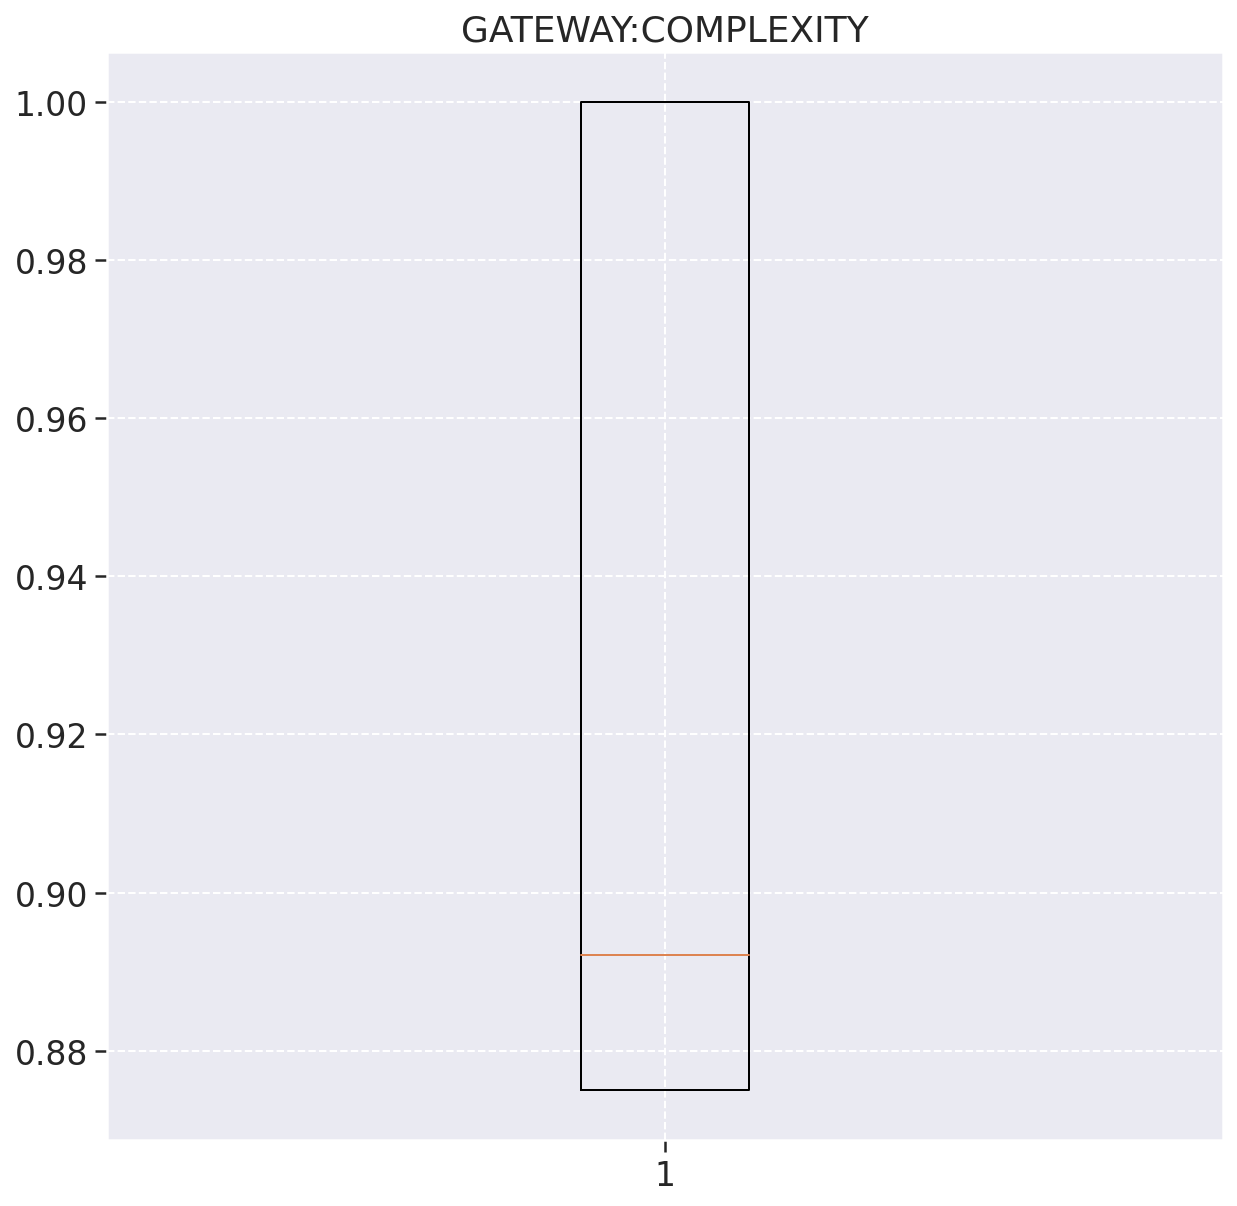

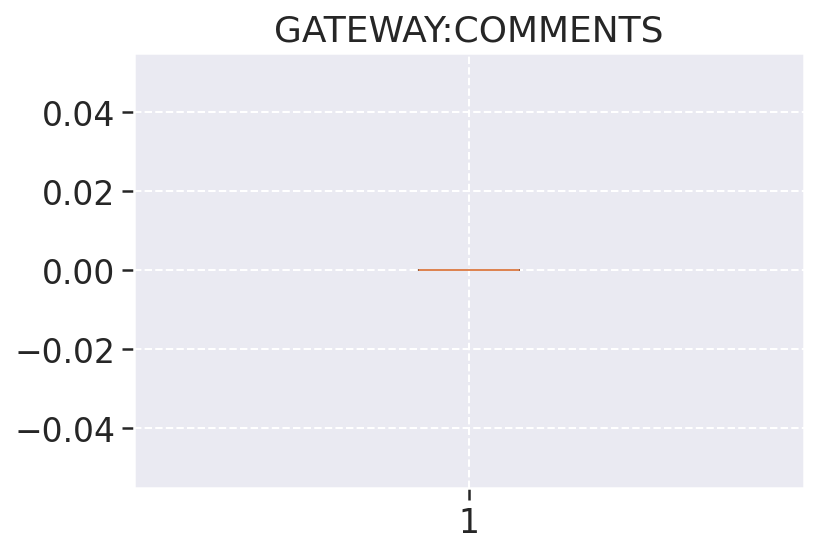

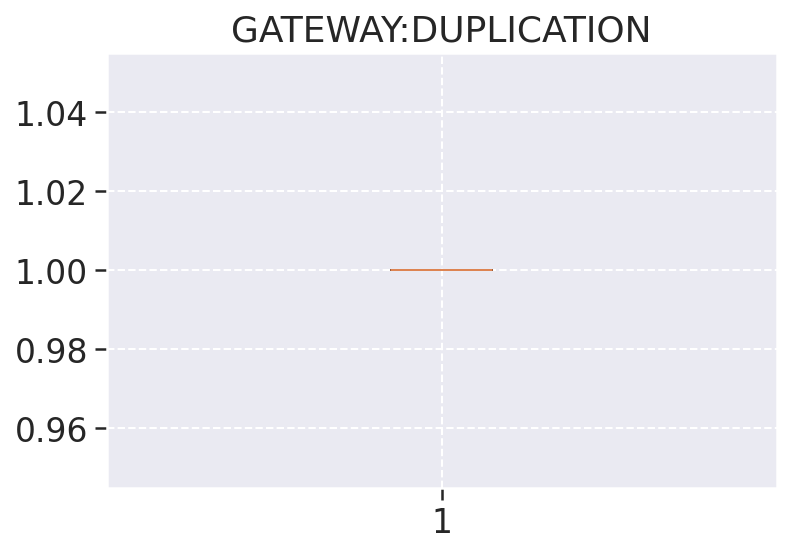

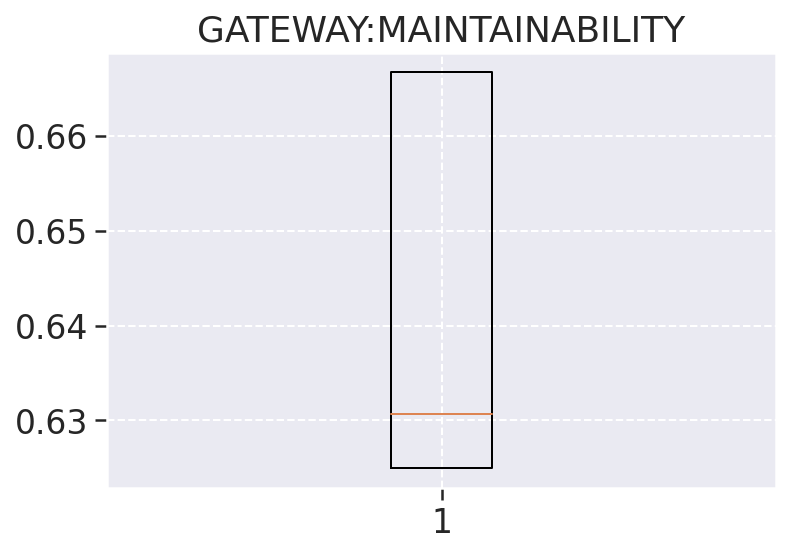

In [81]:
generate_boxplot(generic_df, repository)

## Users

In [82]:
generic_df = eccoar_users_metrics.copy()
repository = "USERS"

### Gráfico histórico

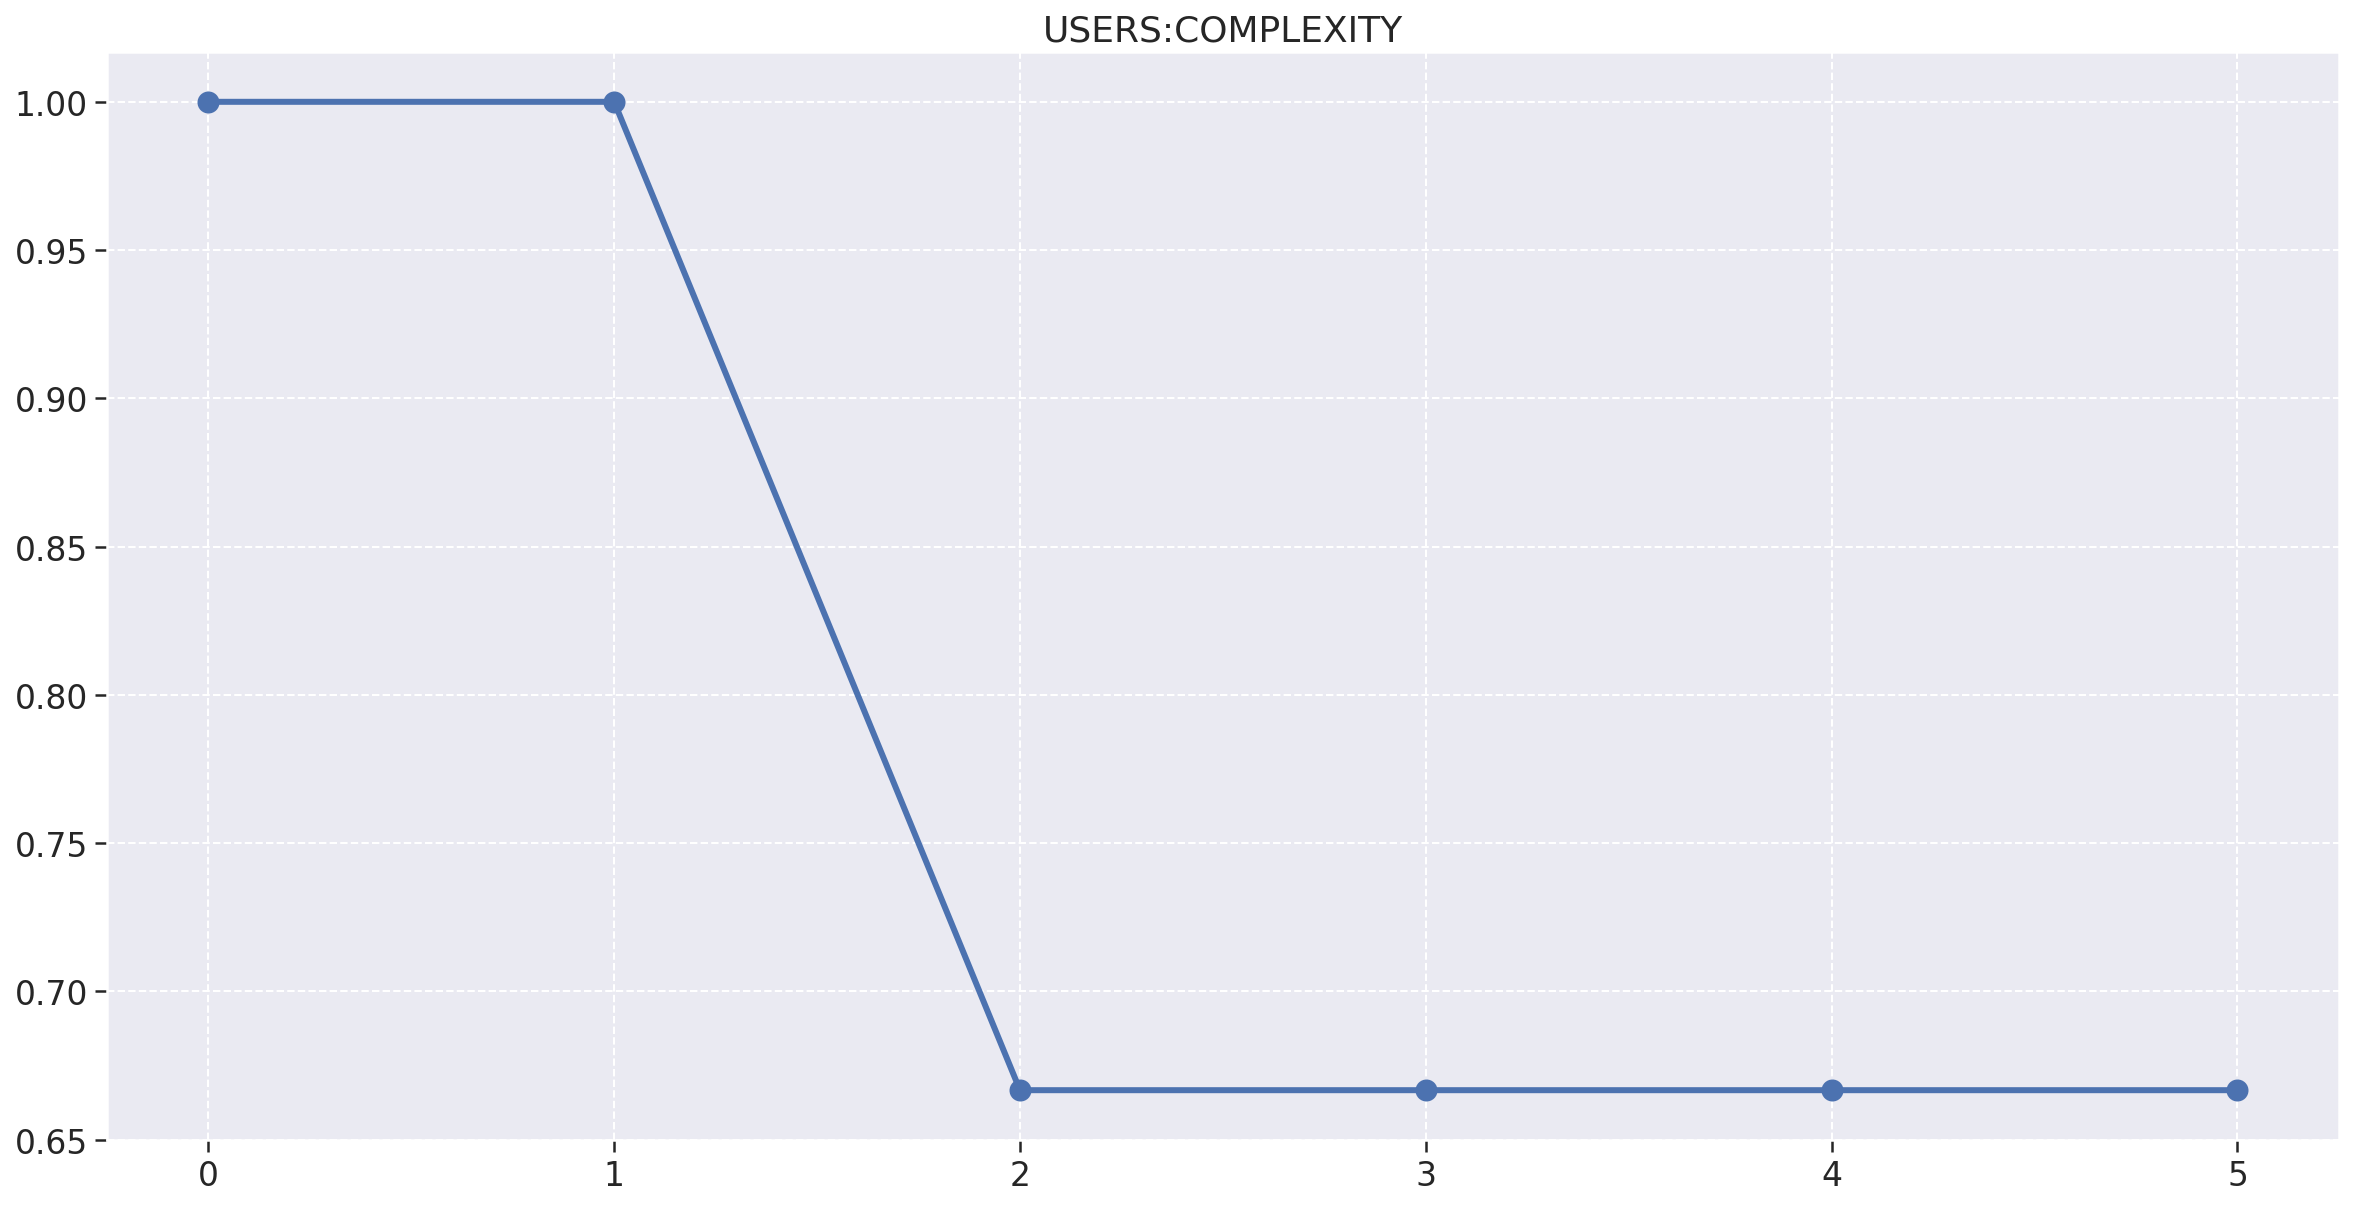

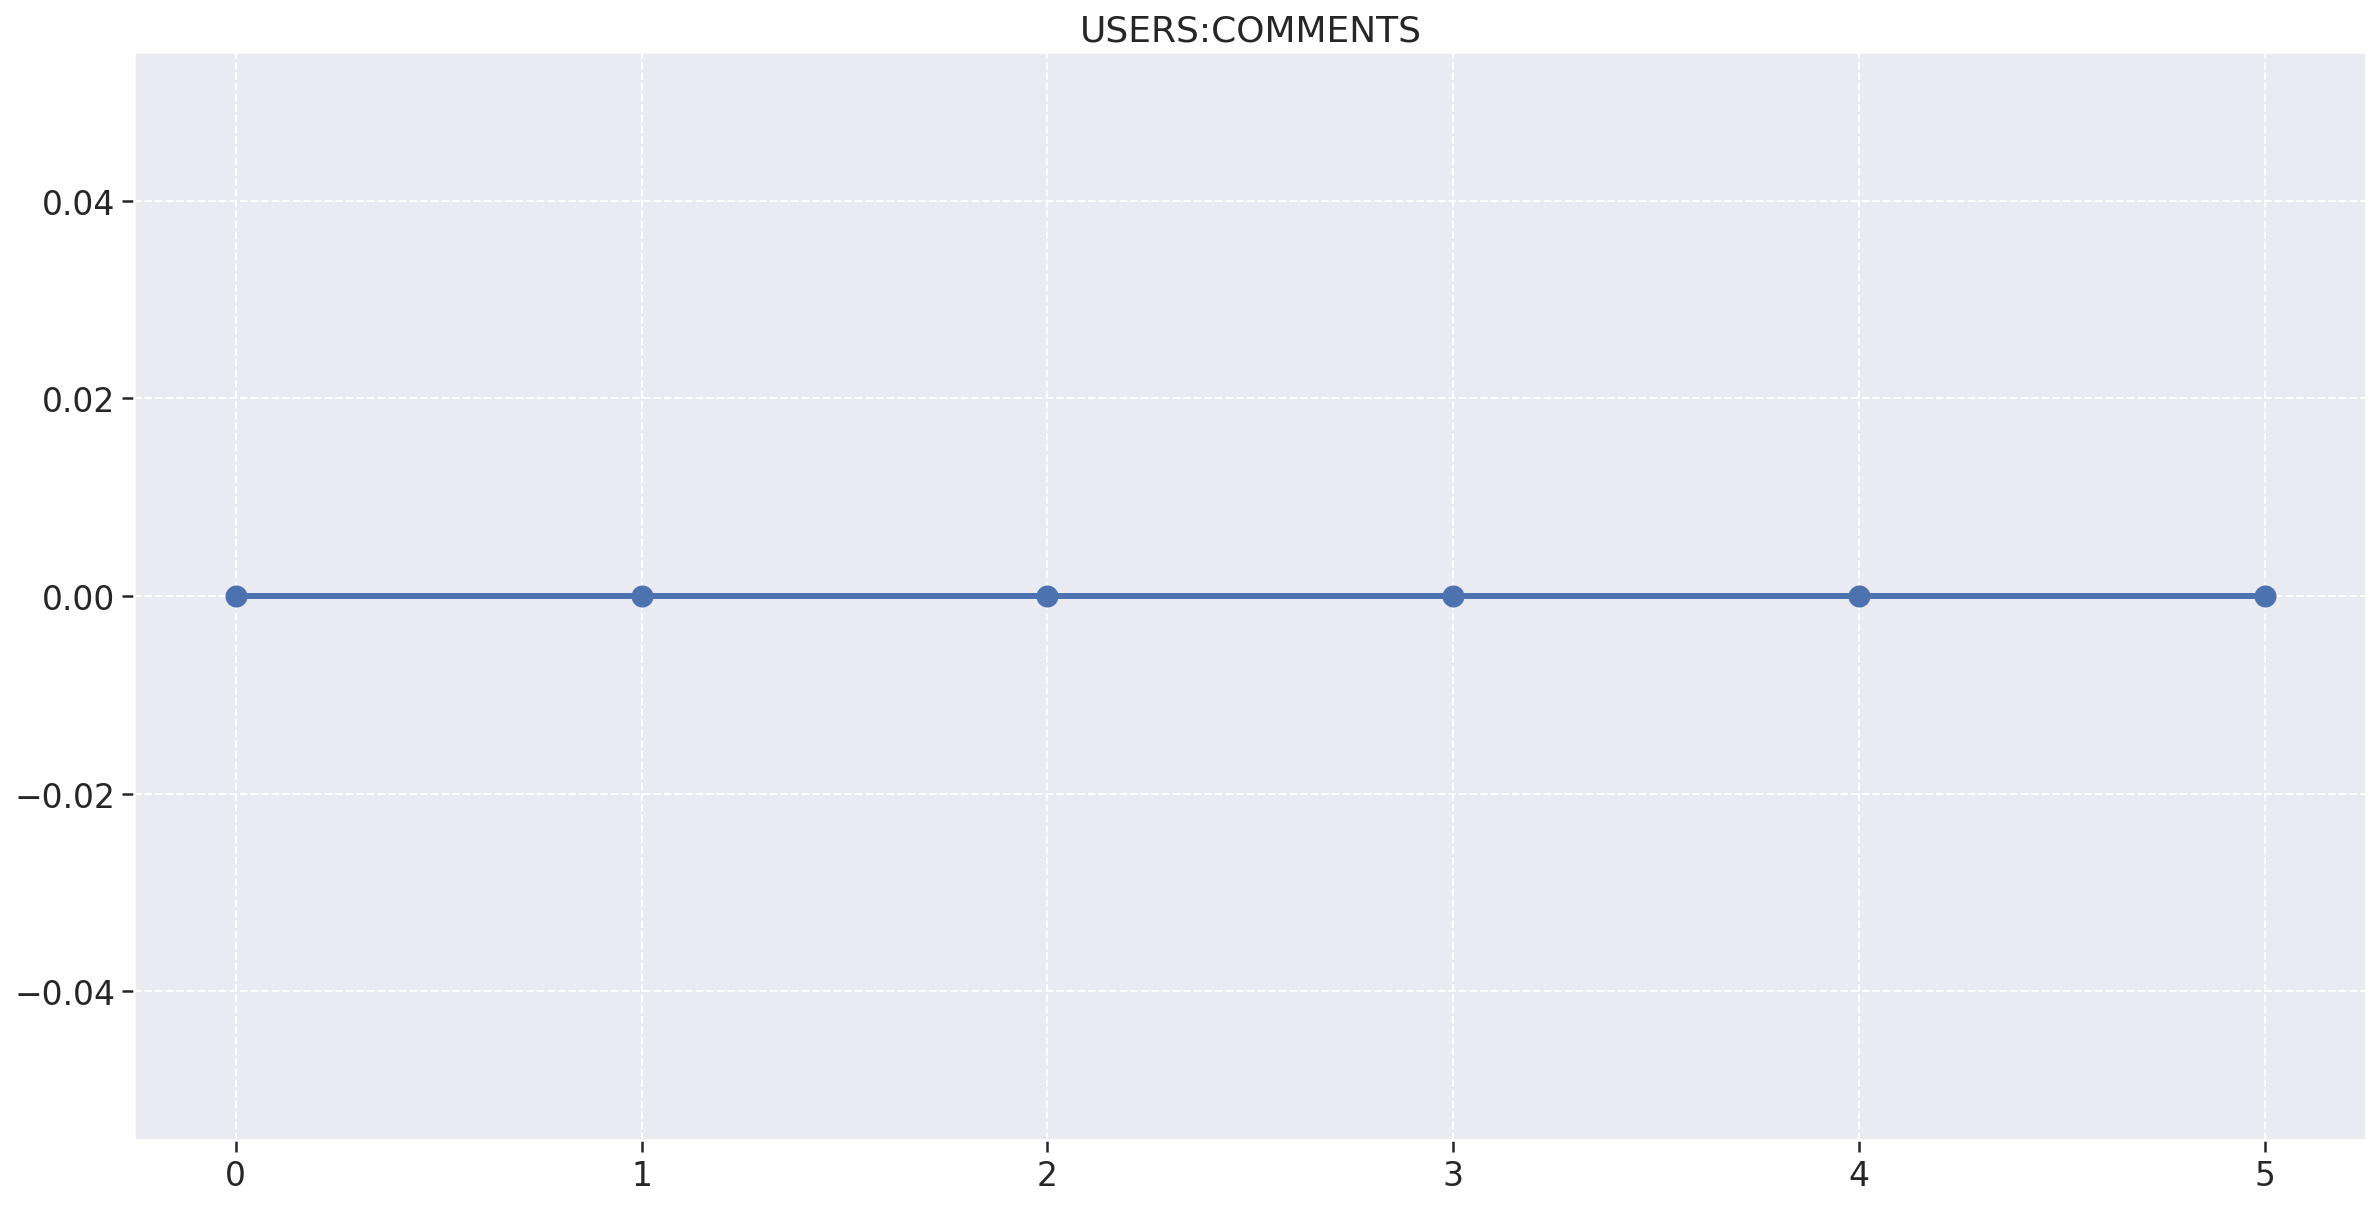

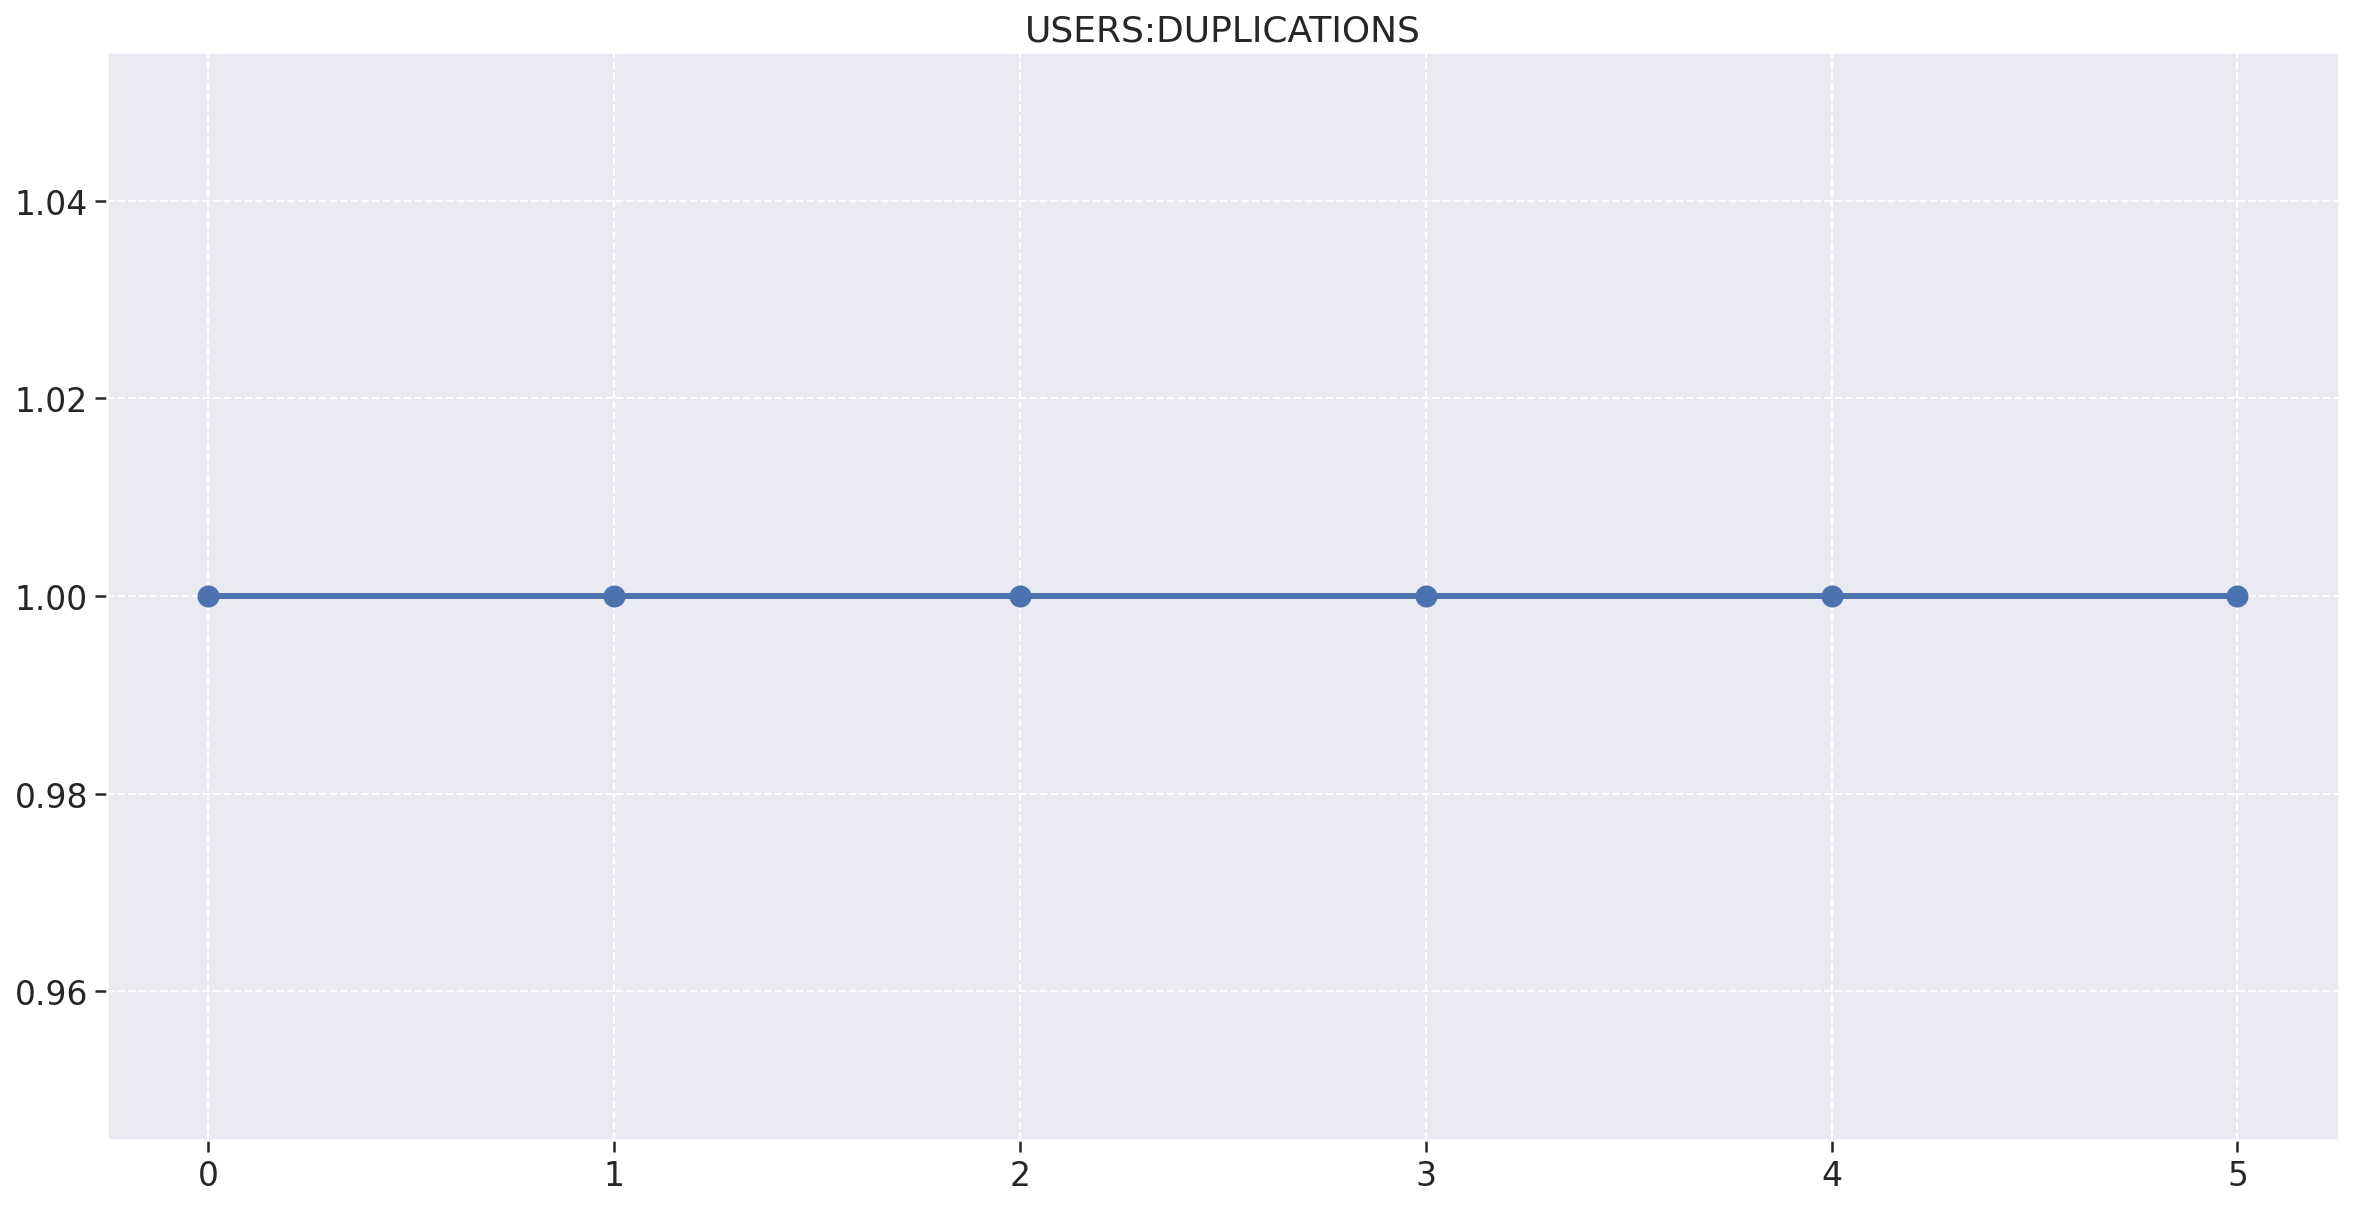

In [83]:
plot_history(generic_df, repository)

### Percentis

In [84]:
descriptive_percentage(generic_df)

### Regressão Linear

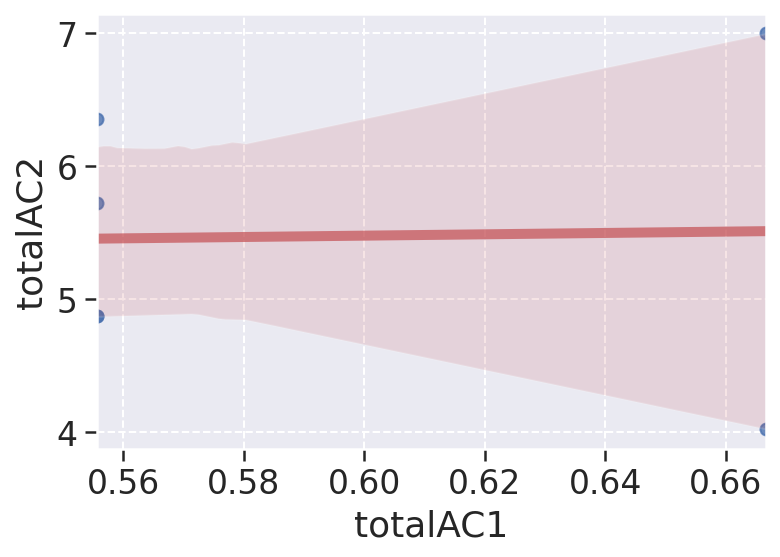

In [85]:
plot_linear_regression(generic_df)

### Histogramas

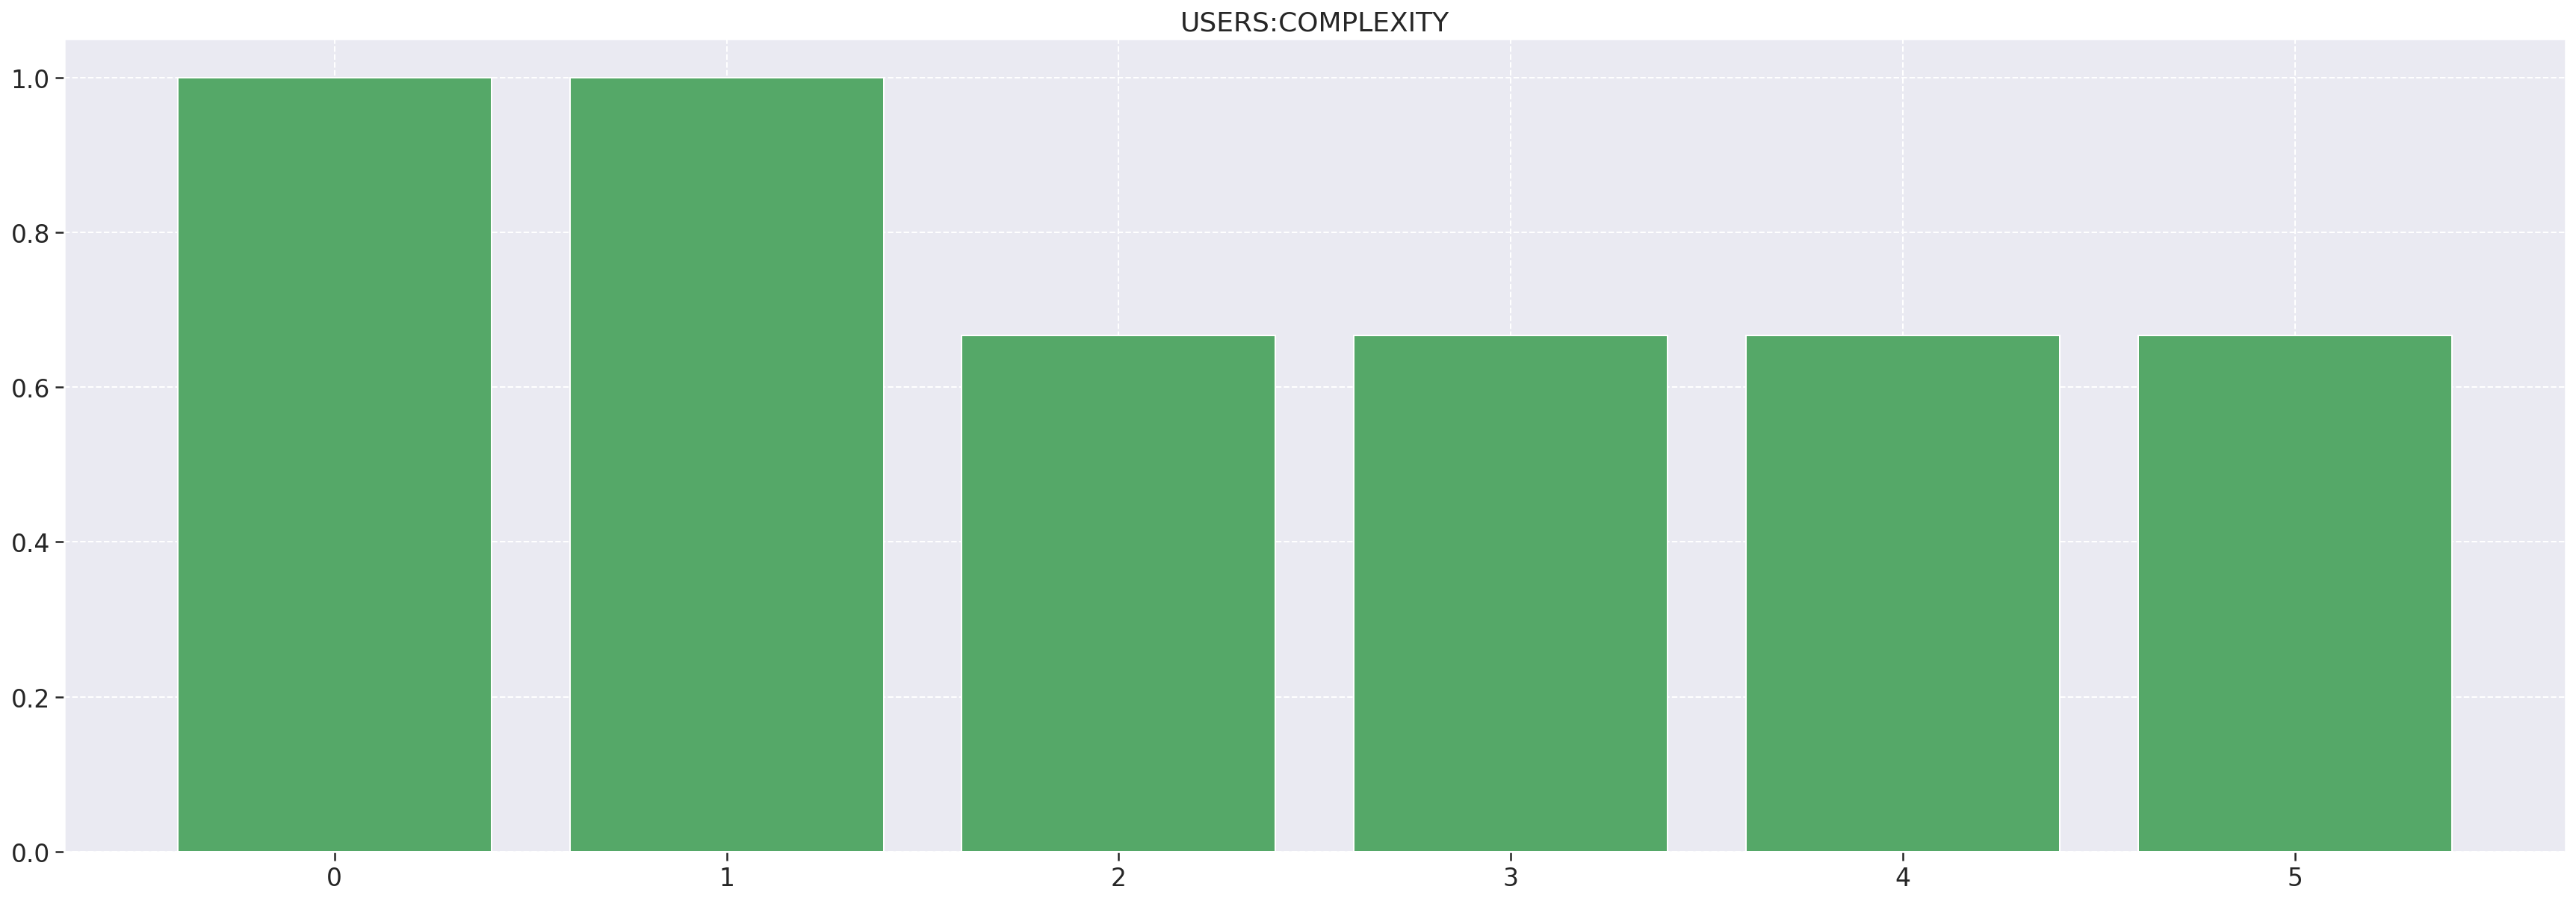

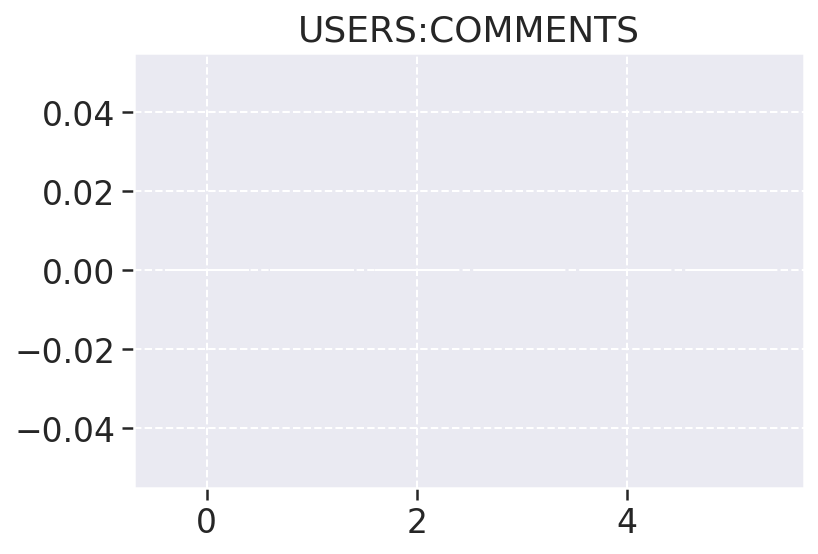

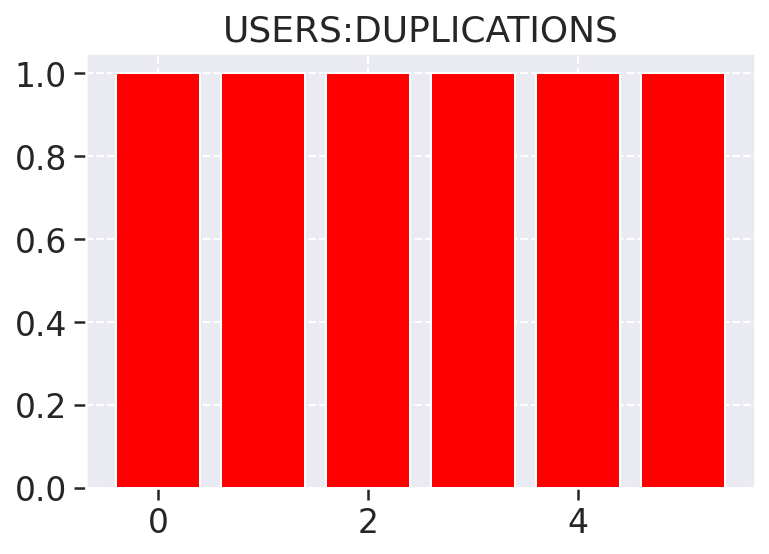

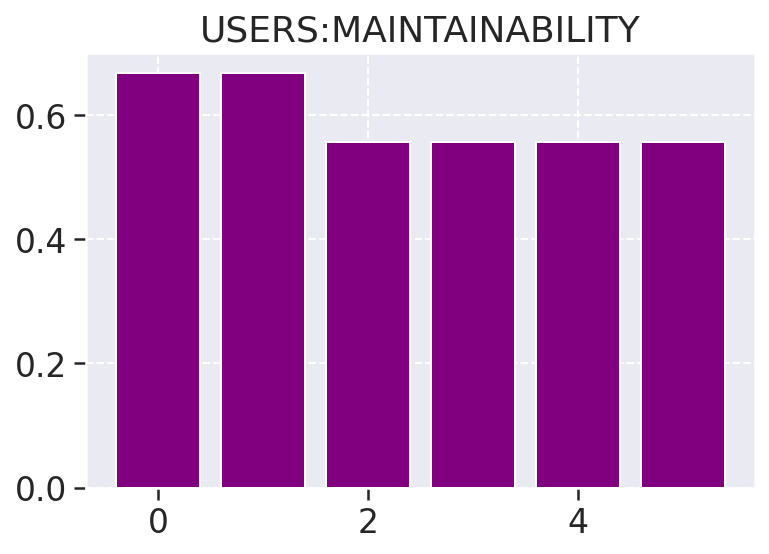

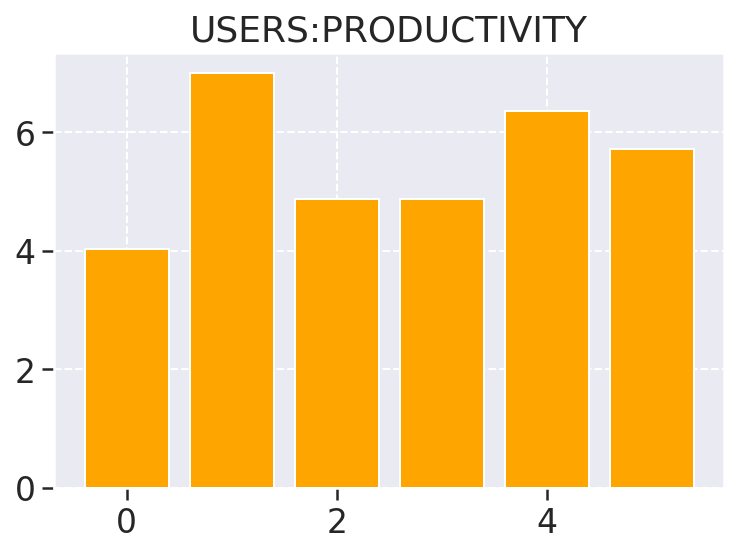

In [86]:
generate_histogram(repository, generic_df)

### Análise Descritiva

In [87]:
descriptive_statistics(generic_df)

count        mean        std         min         25%         50%  \
m1          6.0    0.777778   0.172133    0.666667    0.666667    0.666667   
m2          6.0    0.000000   0.000000    0.000000    0.000000    0.000000   
m3          6.0    1.000000   0.000000    1.000000    1.000000    1.000000   
ncloc       6.0  195.666667  78.313898  117.000000  132.750000  180.000000   
m7          6.0    5.578333   1.120061    4.660000    4.765000    5.295000   
m9          6.0    5.366667   1.248225    3.390000    4.765000    5.505000   
asc1        6.0    0.592593   0.057378    0.555556    0.555556    0.555556   
ac1         6.0    0.592593   0.057378    0.555556    0.555556    0.555556   
totalAC1    6.0    0.592593   0.057378    0.555556    0.555556    0.555556   
asc2        6.0    5.472500   1.093557    4.025000    4.870000    5.295000   
totalAC2    6.0    5.472500   1.093557    4.025000    4.870000    5.295000   

                 75%         max          var  
m1          0.916667    1.000000     0.029630  
m2          0.000000    0.000000     0.000000  
m3          1.000000    1.000000     0.000000  
ncloc     262.500000  290.000000  6133.066667  
m7          5.825000    7.630000     1.254537  
m9          6.252500    6.780000     1.558067  
asc1        0.638889    0.666667     0.003292  
ac1         0.638889    0.666667     0.003292  
totalAC1    0.638889    0.666667     0.003292  
asc2        6.196250    6.995000     1.195867  
totalAC2    6.196250    6.995000     1.195867

### Matriz de Correlação

In [88]:
correlationMatrix(generic_df)

m1  m2  m3     ncloc        m7        m9      asc1       ac1  \
m1        1.000000 NaN NaN -0.778086  0.391888 -0.305108  1.000000  1.000000   
m2             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
m3             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
ncloc    -0.778086 NaN NaN  1.000000 -0.091735  0.571608 -0.778086 -0.778086   
m7        0.391888 NaN NaN -0.091735  1.000000  0.704843  0.391888  0.391888   
m9       -0.305108 NaN NaN  0.571608  0.704843  1.000000 -0.305108 -0.305108   
asc1      1.000000 NaN NaN -0.778086  0.391888 -0.305108  1.000000  1.000000   
ac1       1.000000 NaN NaN -0.778086  0.391888 -0.305108  1.000000  1.000000   
totalAC1  1.000000 NaN NaN -0.778086  0.391888 -0.305108  1.000000  1.000000   
asc2      0.026562 NaN NaN  0.279248  0.914385  0.931681  0.026562  0.026562   
totalAC2  0.026562 NaN NaN  0.279248  0.914385  0.931681  0.026562  0.026562   

          totalAC1      asc2  totalAC2  
m1        1.000000  0.026562  0.026562  
m2             NaN       NaN       NaN  
m3             NaN       NaN       NaN  
ncloc    -0.778086  0.279248  0.279248  
m7        0.391888  0.914385  0.914385  
m9       -0.305108  0.931681  0.931681  
asc1      1.000000  0.026562  0.026562  
ac1       1.000000  0.026562  0.026562  
totalAC1  1.000000  0.026562  0.026562  
asc2      0.026562  1.000000  1.000000  
totalAC2  0.026562  1.000000  1.000000

### Box-plot

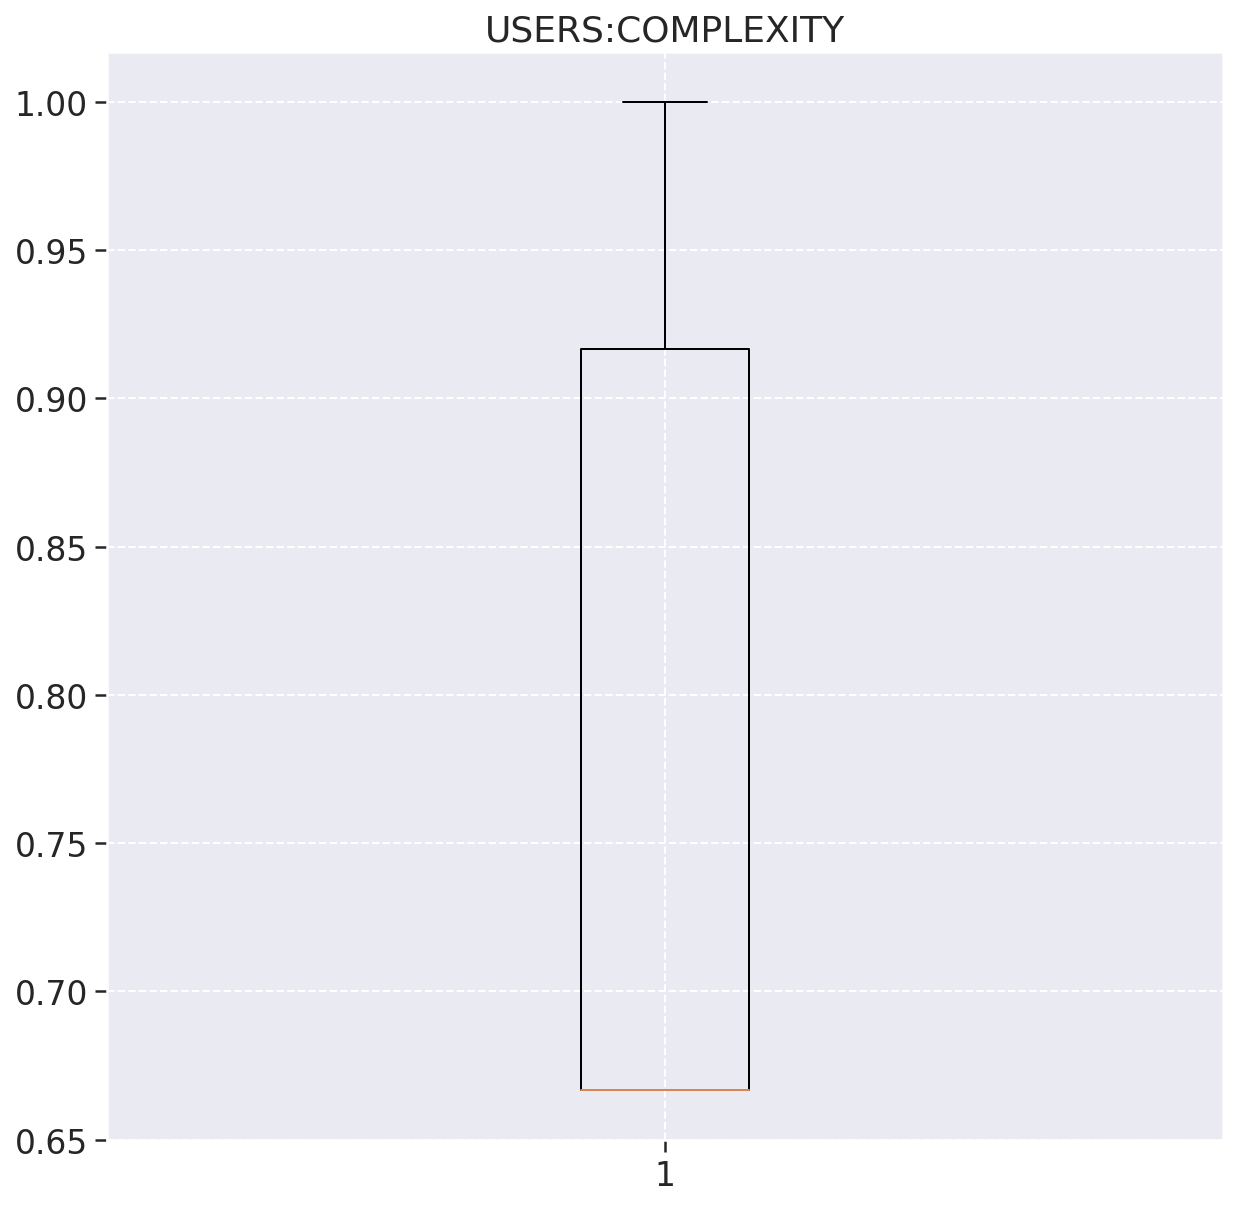

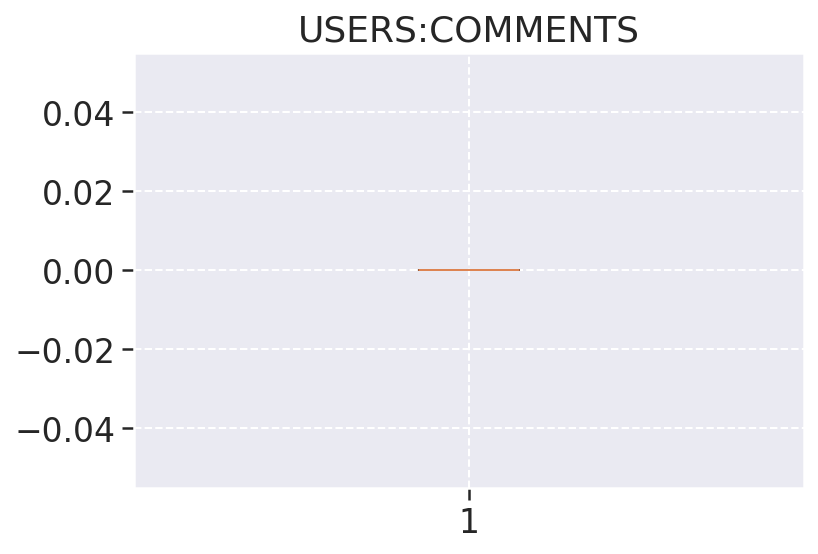

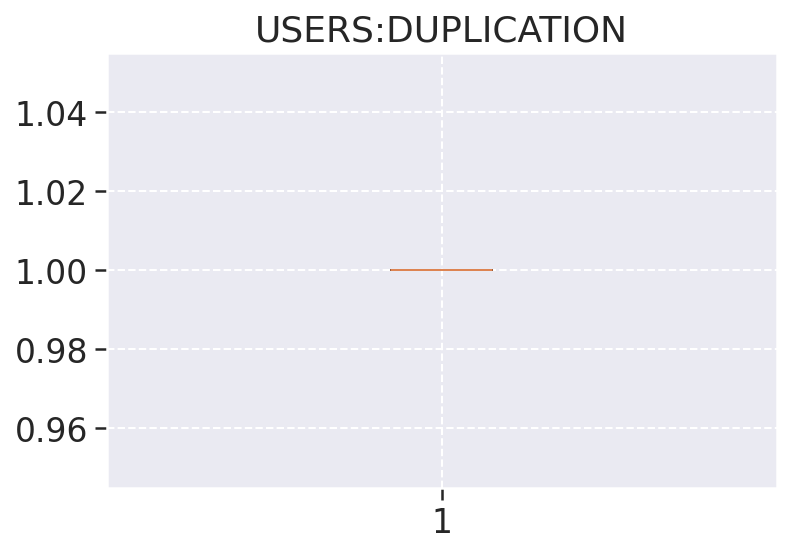

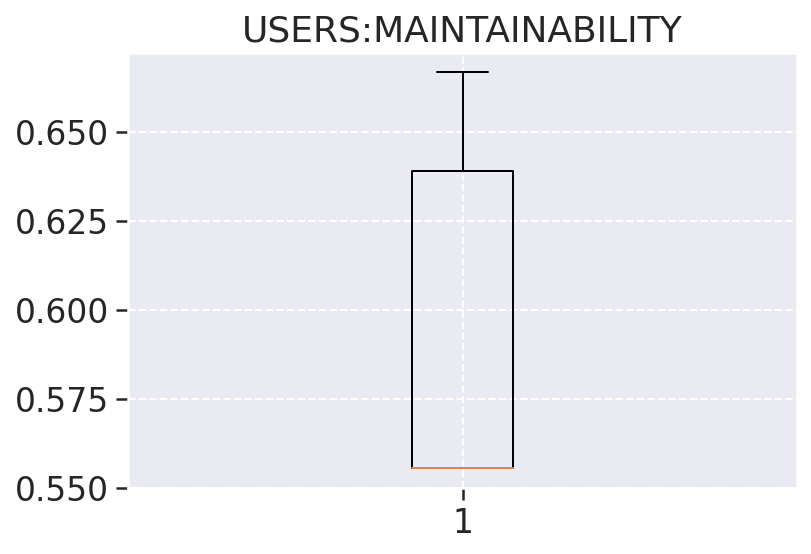

In [89]:
generate_boxplot(generic_df, repository)

## Mailer

In [90]:
generic_df = eccoar_mailer_metrics.copy()
repository = "MAILER"

### Gráfico histórico

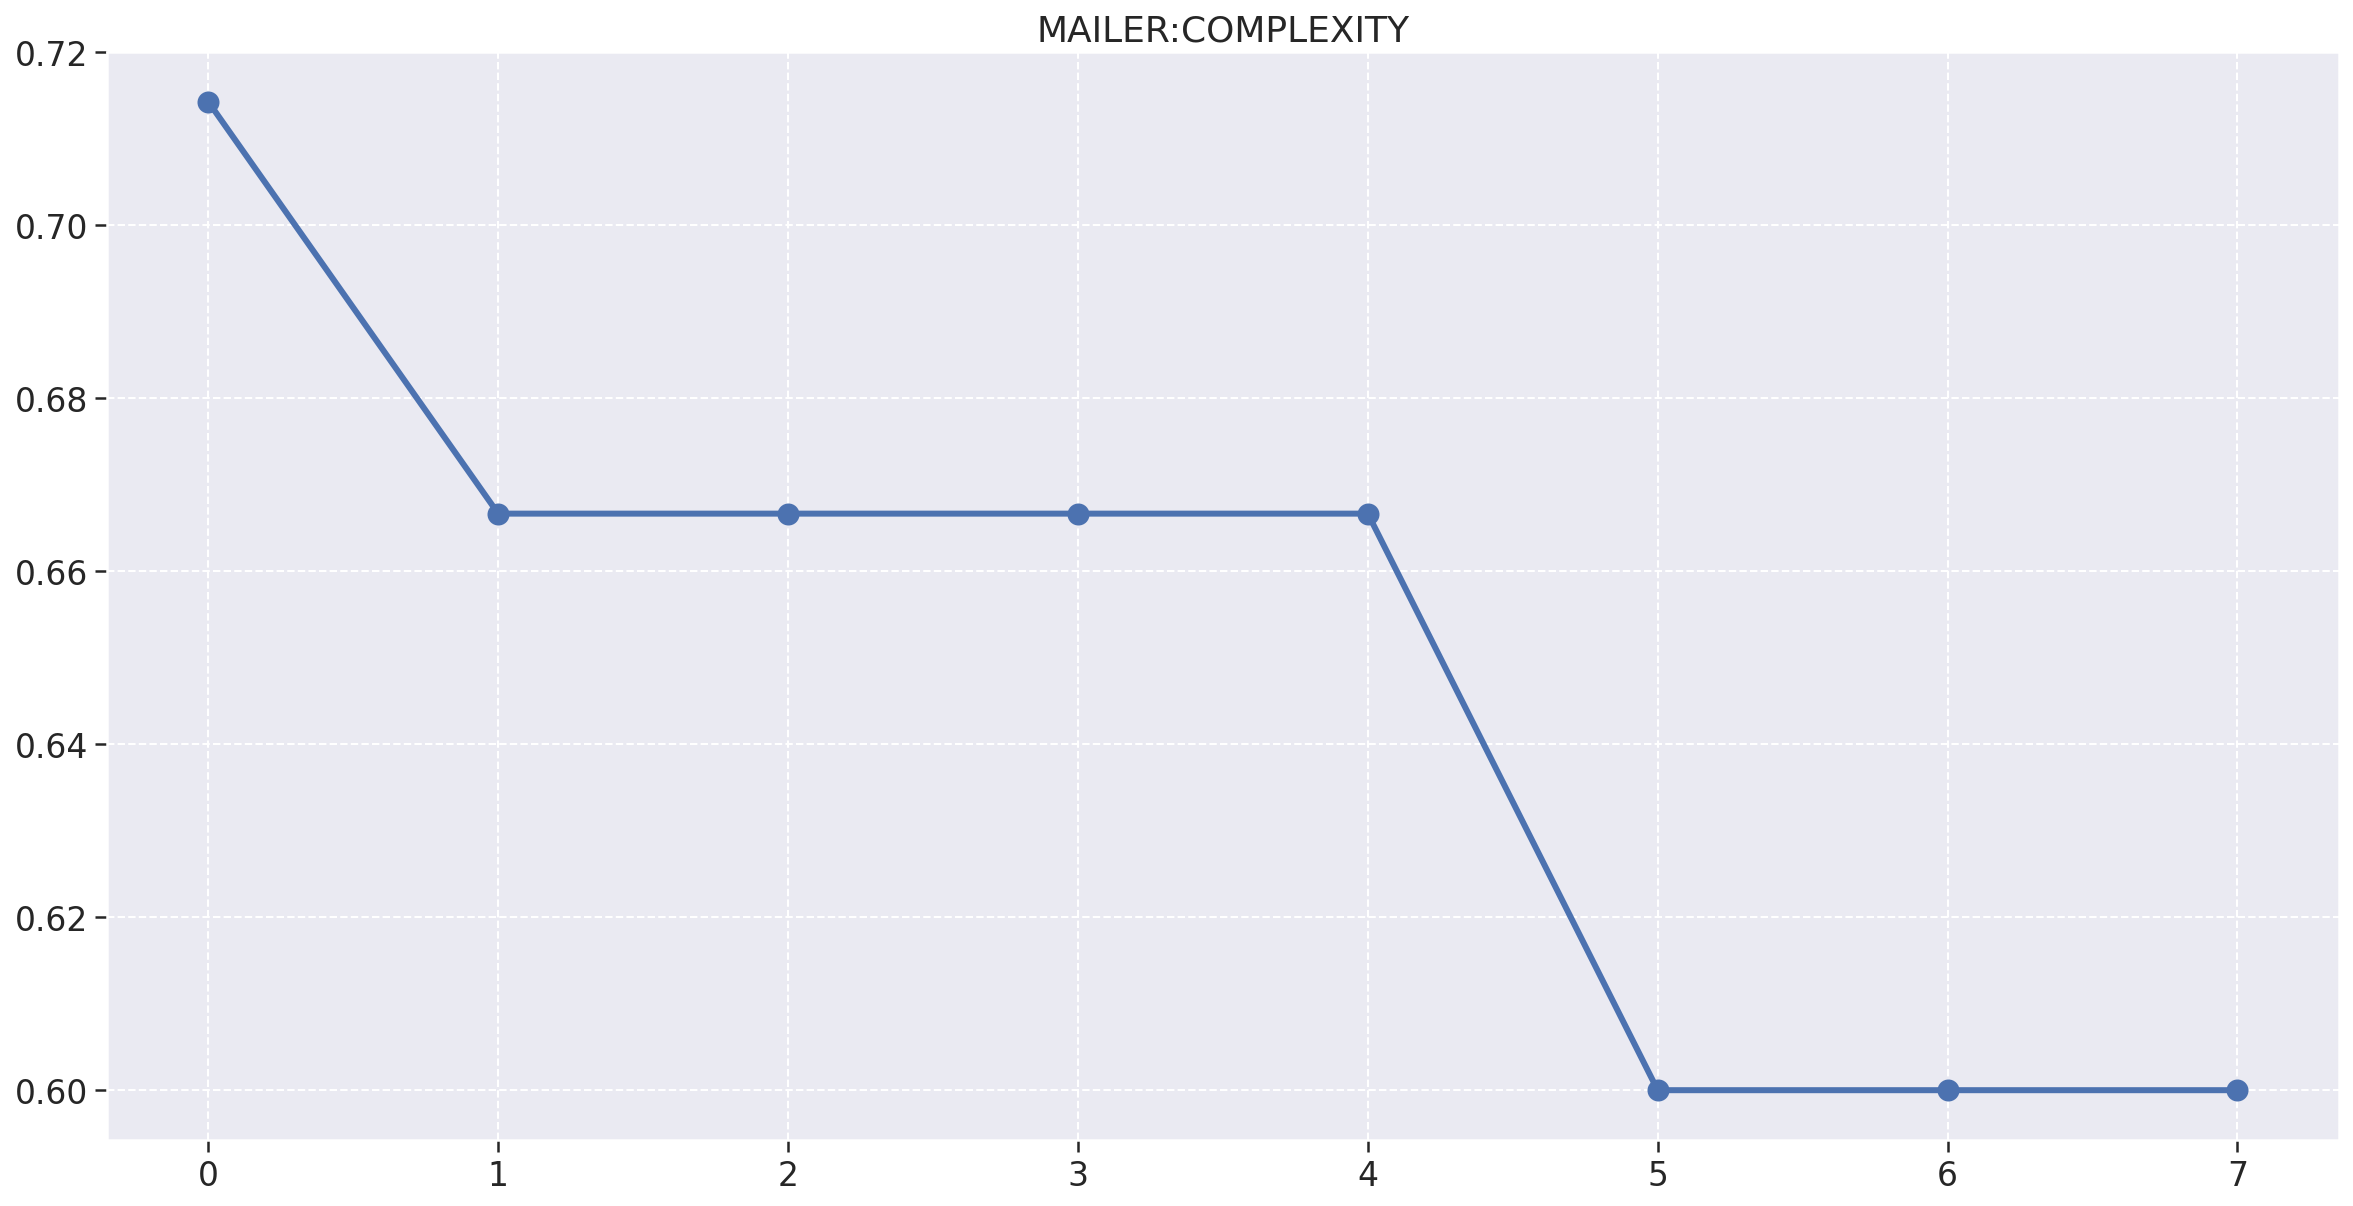

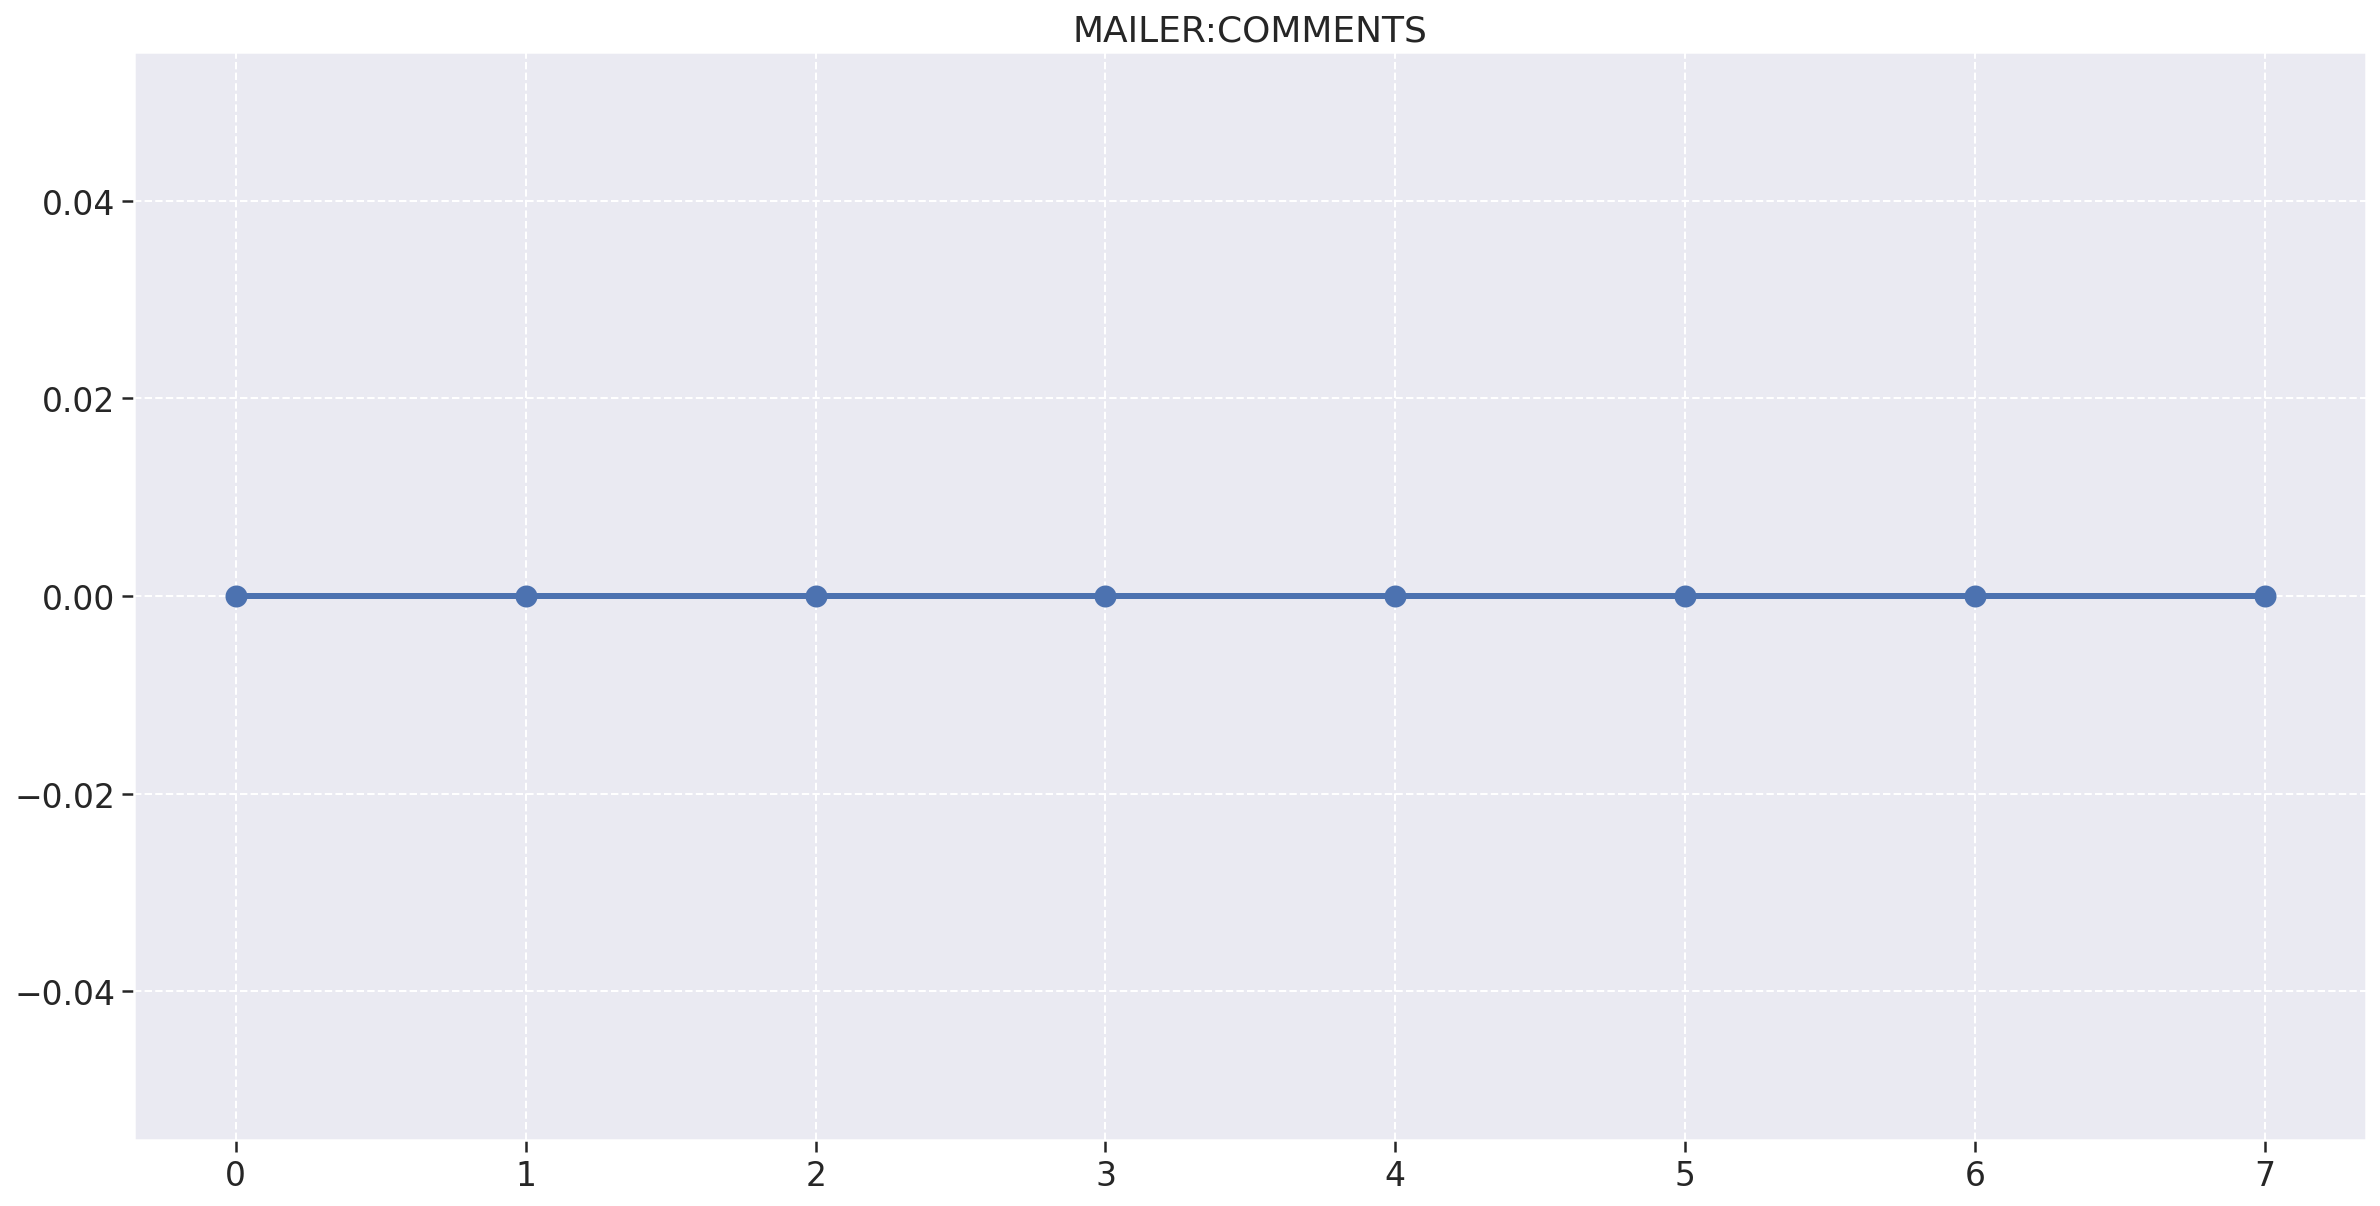

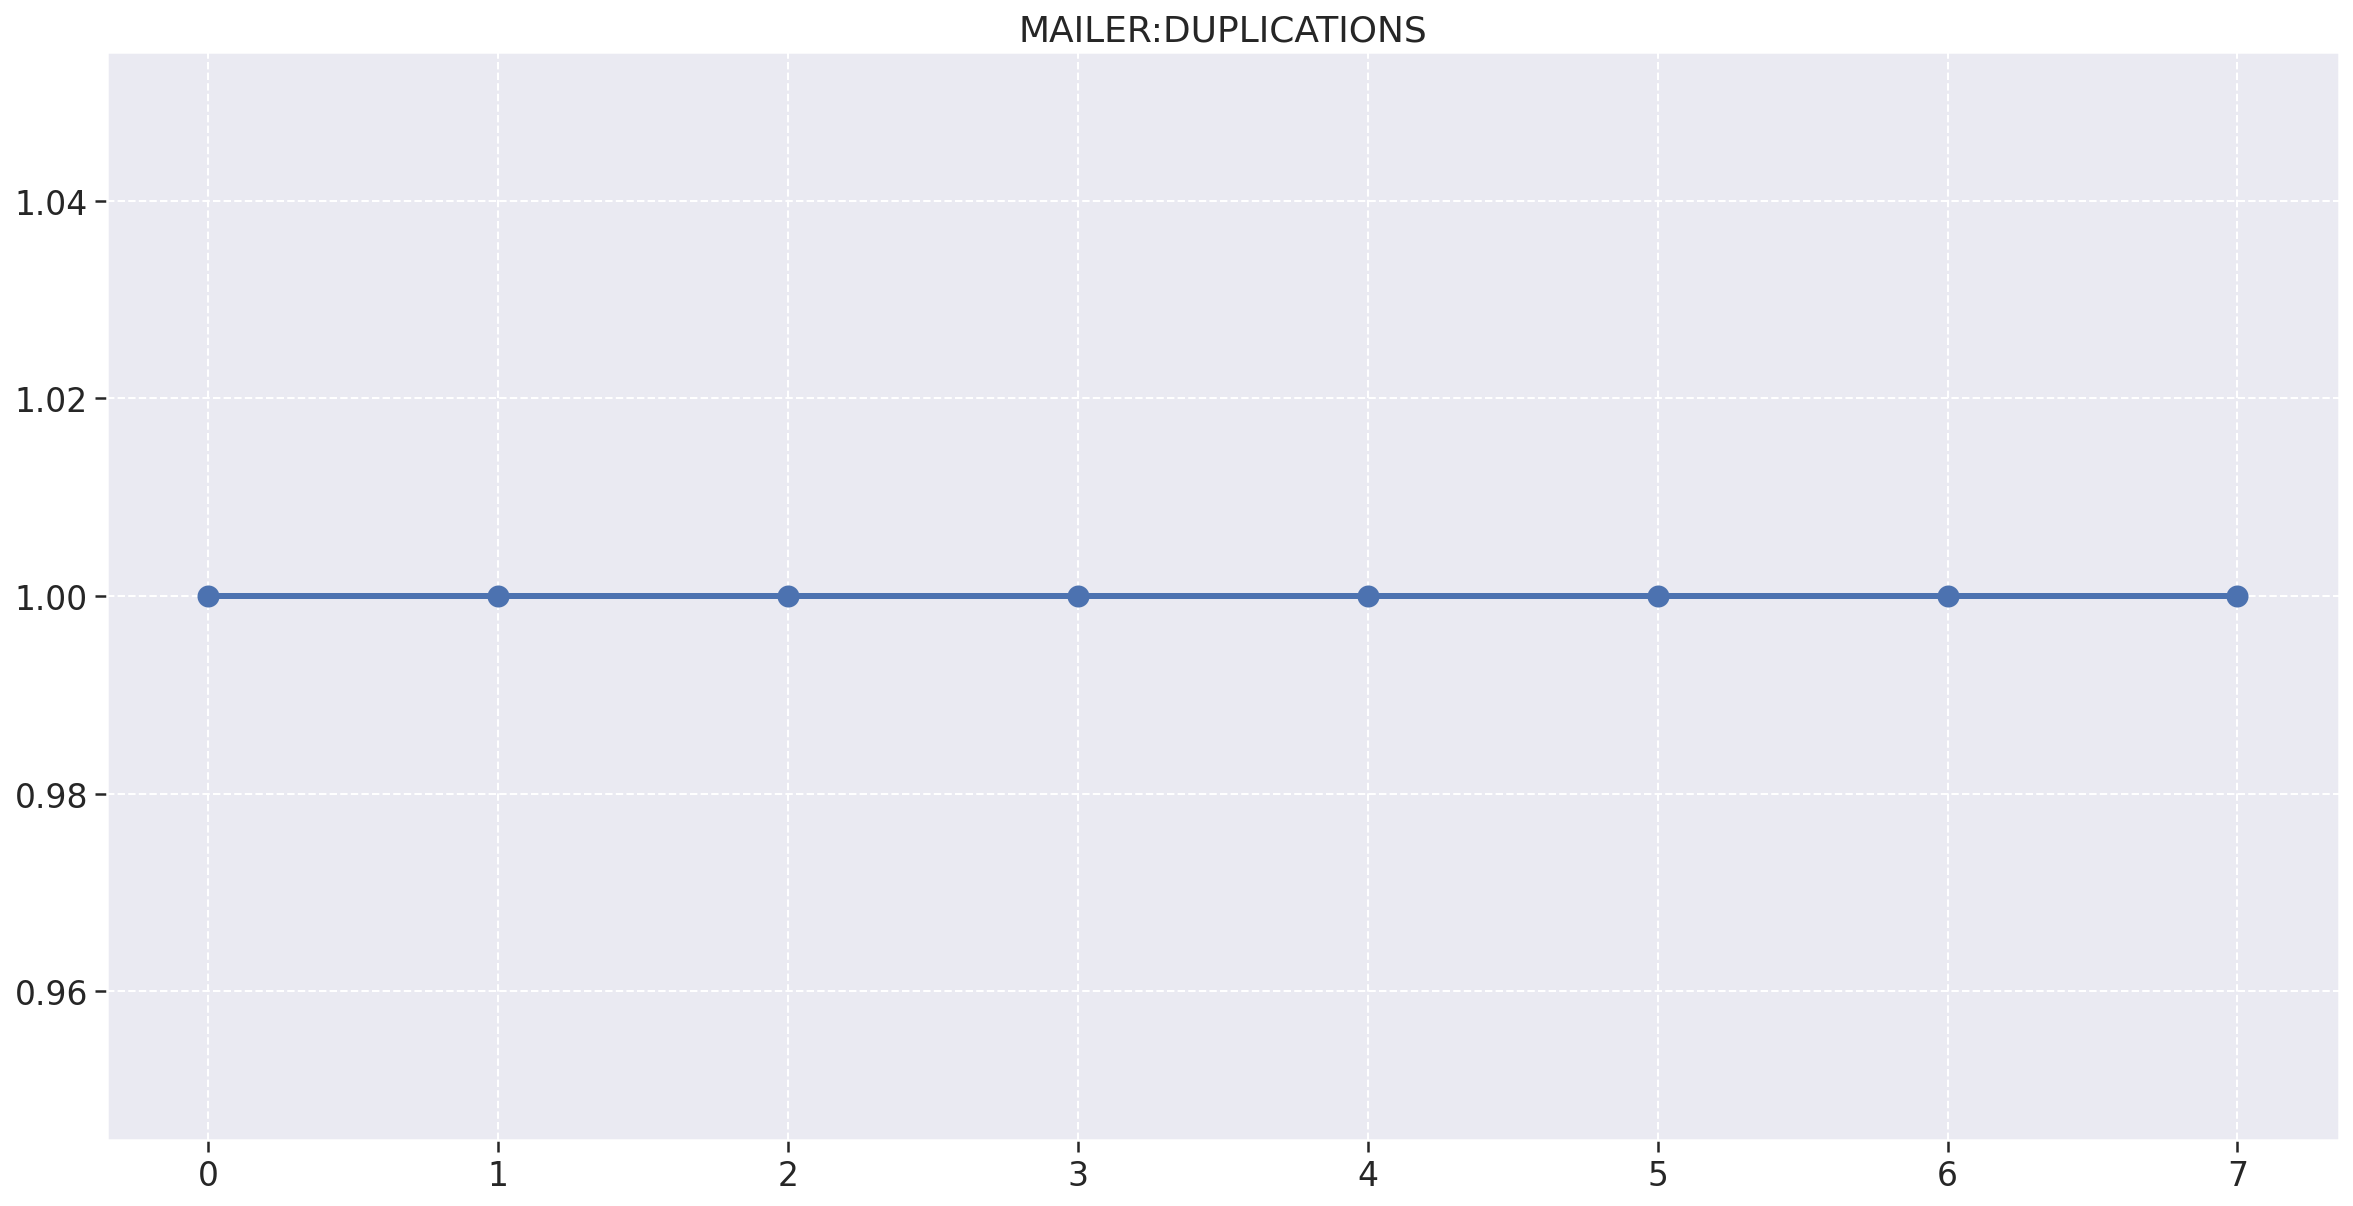

In [91]:
plot_history(generic_df, repository)

### Percentis

In [92]:
descriptive_percentage(generic_df)

### Regressão Linear

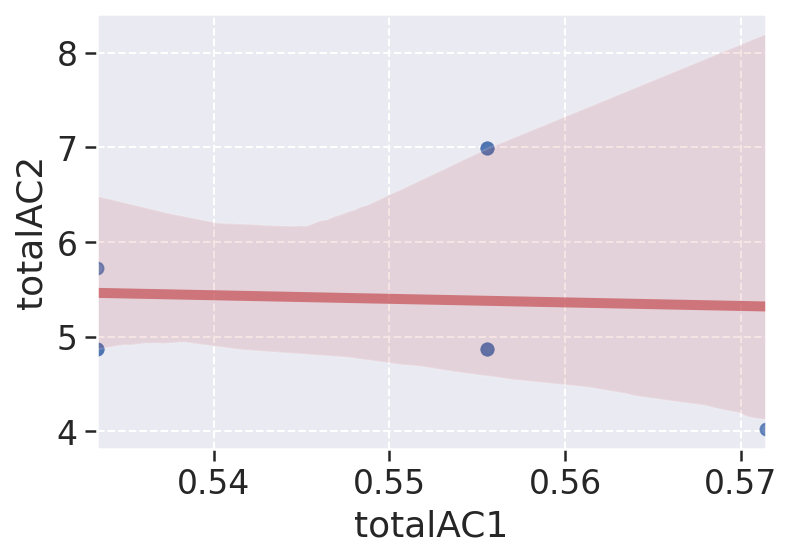

In [93]:
plot_linear_regression(generic_df)

### Histogramas

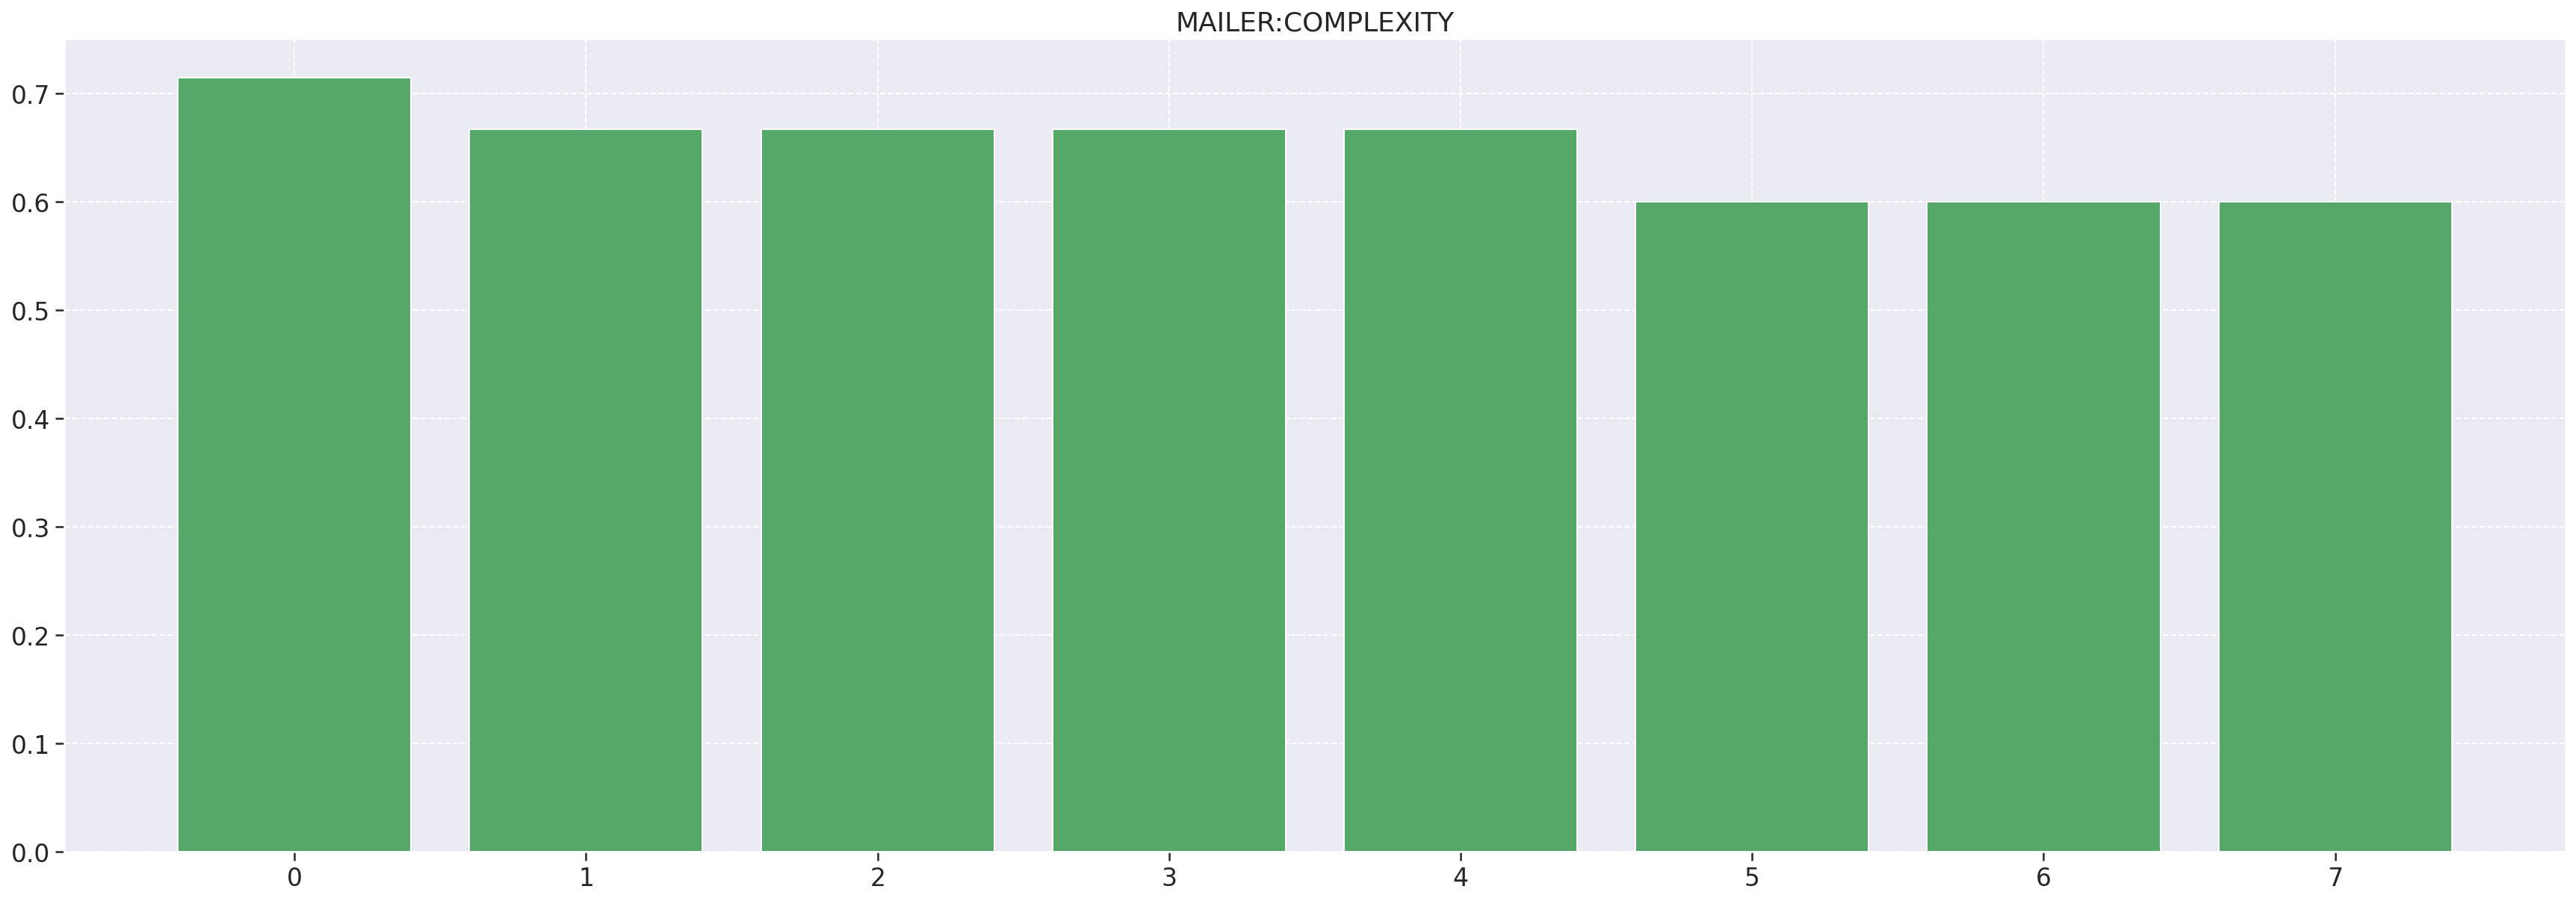

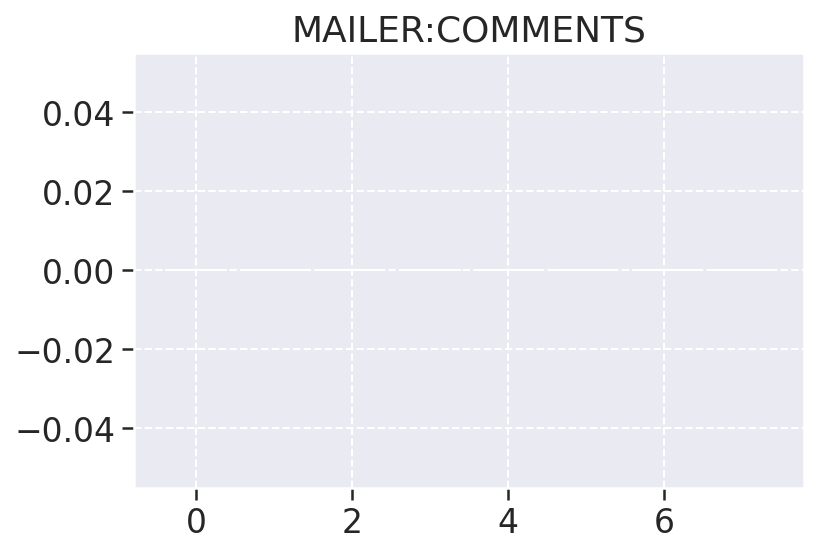

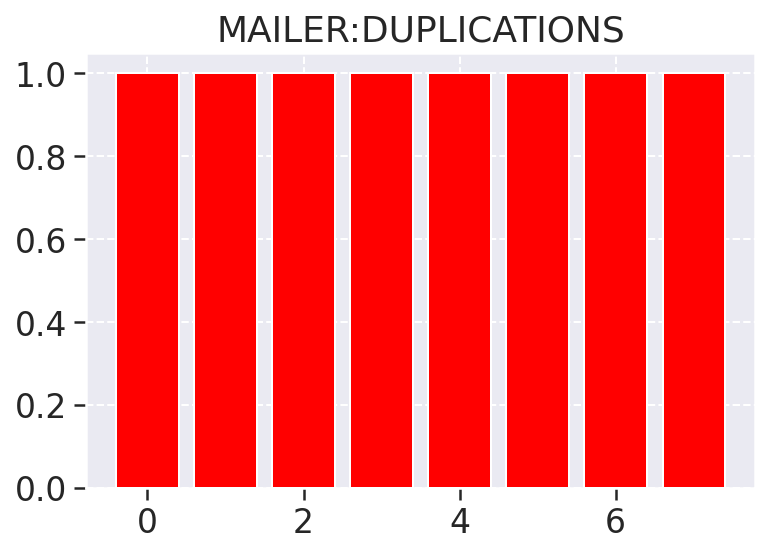

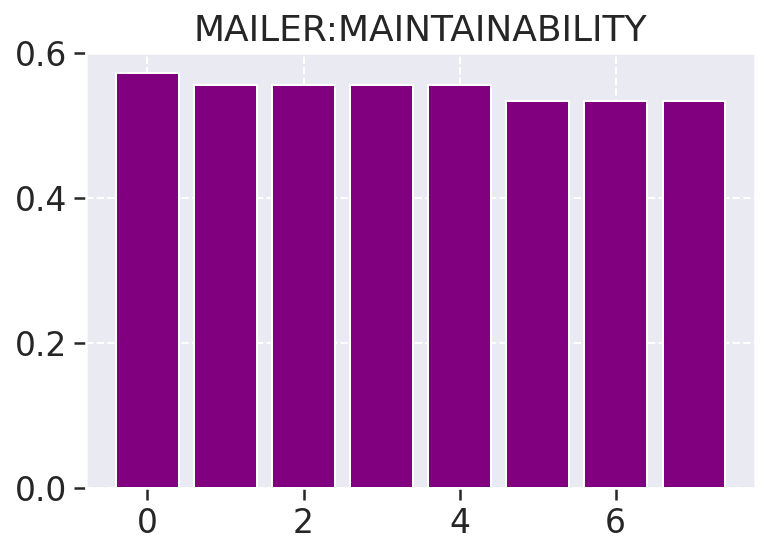

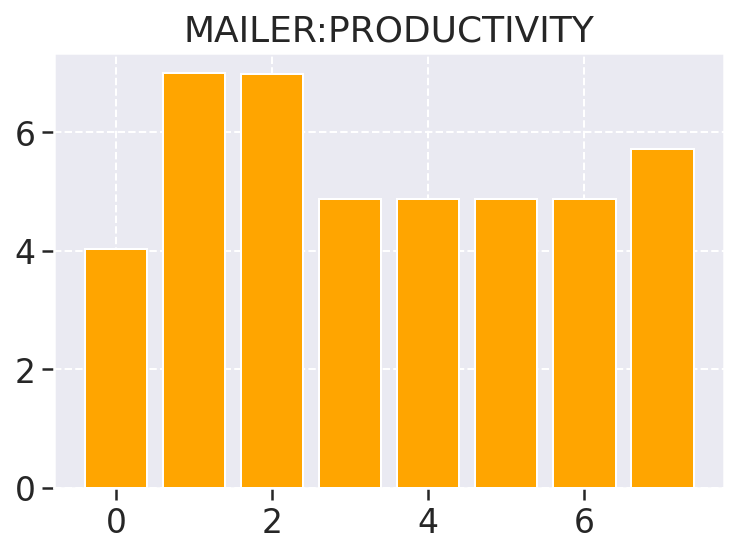

In [94]:
generate_histogram(repository, generic_df)

### Análise Descritiva

In [95]:
descriptive_statistics(generic_df)

count        mean        std         min         25%         50%  \
m1          8.0    0.647619   0.042592    0.600000    0.600000    0.666667   
m2          8.0    0.000000   0.000000    0.000000    0.000000    0.000000   
m3          8.0    1.000000   0.000000    1.000000    1.000000    1.000000   
ncloc       8.0  203.625000  30.302935  132.000000  205.750000  208.000000   
m7          8.0    5.401250   1.008074    4.660000    4.660000    5.080000   
m9          8.0    5.401250   1.392074    3.390000    4.660000    5.080000   
asc1        8.0    0.549206   0.014197    0.533333    0.533333    0.555556   
ac1         8.0    0.549206   0.014197    0.533333    0.533333    0.555556   
totalAC1    8.0    0.549206   0.014197    0.533333    0.533333    0.555556   
asc2        8.0    5.401250   1.081582    4.025000    4.870000    4.870000   
totalAC2    8.0    5.401250   1.081582    4.025000    4.870000    4.870000   

                 75%         max         var  
m1          0.666667    0.714286    0.001814  
m2          0.000000    0.000000    0.000000  
m3          1.000000    1.000000    0.000000  
ncloc     224.000000  224.000000  918.267857  
m7          5.615000    7.630000    1.016212  
m9          6.037500    8.050000    1.937870  
asc1        0.555556    0.571429    0.000202  
ac1         0.555556    0.571429    0.000202  
totalAC1    0.555556    0.571429    0.000202  
asc2        6.037500    6.995000    1.169820  
totalAC2    6.037500    6.995000    1.169820

### Matriz de Correlação

In [96]:
correlationMatrix(generic_df)

m1  m2  m3     ncloc        m7        m9      asc1       ac1  \
m1        1.000000 NaN NaN -0.828562  0.000951 -0.077561  1.000000  1.000000   
m2             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
m3             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
ncloc    -0.828562 NaN NaN  1.000000  0.247781  0.473585 -0.828562 -0.828562   
m7        0.000951 NaN NaN  0.247781  1.000000  0.614687  0.000951  0.000951   
m9       -0.077561 NaN NaN  0.473585  0.614687  1.000000 -0.077561 -0.077561   
asc1      1.000000 NaN NaN -0.828562  0.000951 -0.077561  1.000000  1.000000   
ac1       1.000000 NaN NaN -0.828562  0.000951 -0.077561  1.000000  1.000000   
totalAC1  1.000000 NaN NaN -0.828562  0.000951 -0.077561  1.000000  1.000000   
asc2     -0.049470 NaN NaN  0.420239  0.861591  0.929991 -0.049470 -0.049470   
totalAC2 -0.049470 NaN NaN  0.420239  0.861591  0.929991 -0.049470 -0.049470   

          totalAC1      asc2  totalAC2  
m1        1.000000 -0.049470 -0.049470  
m2             NaN       NaN       NaN  
m3             NaN       NaN       NaN  
ncloc    -0.828562  0.420239  0.420239  
m7        0.000951  0.861591  0.861591  
m9       -0.077561  0.929991  0.929991  
asc1      1.000000 -0.049470 -0.049470  
ac1       1.000000 -0.049470 -0.049470  
totalAC1  1.000000 -0.049470 -0.049470  
asc2     -0.049470  1.000000  1.000000  
totalAC2 -0.049470  1.000000  1.000000

### Box-plot

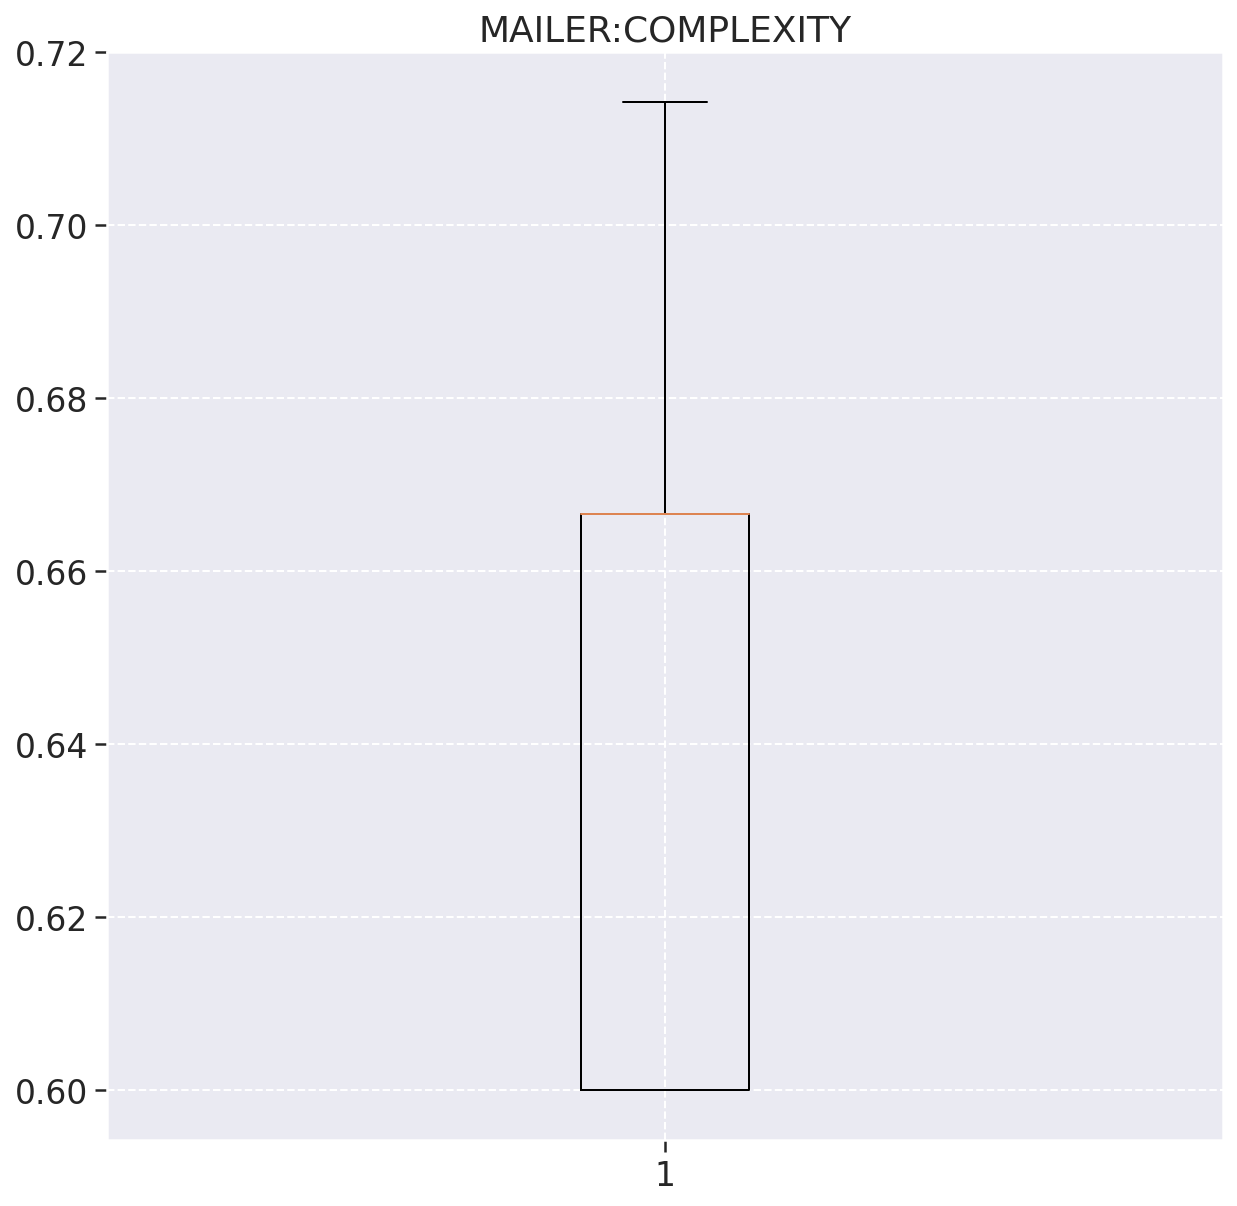

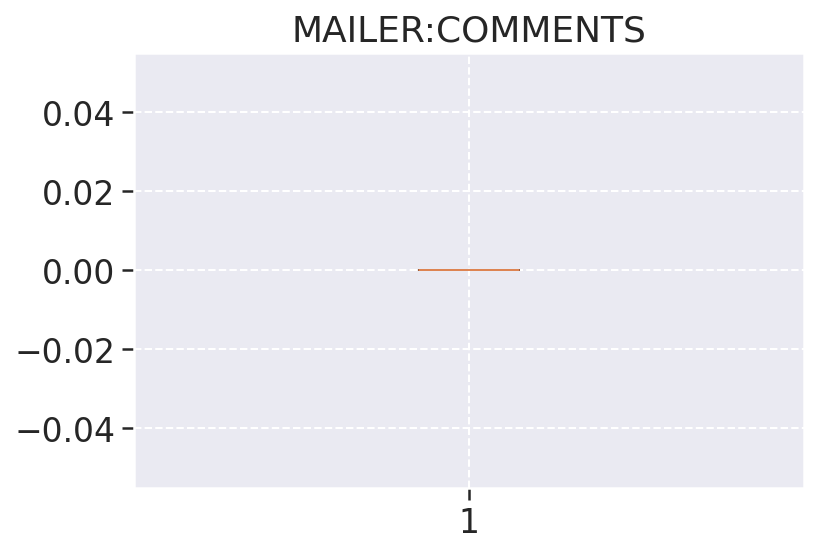

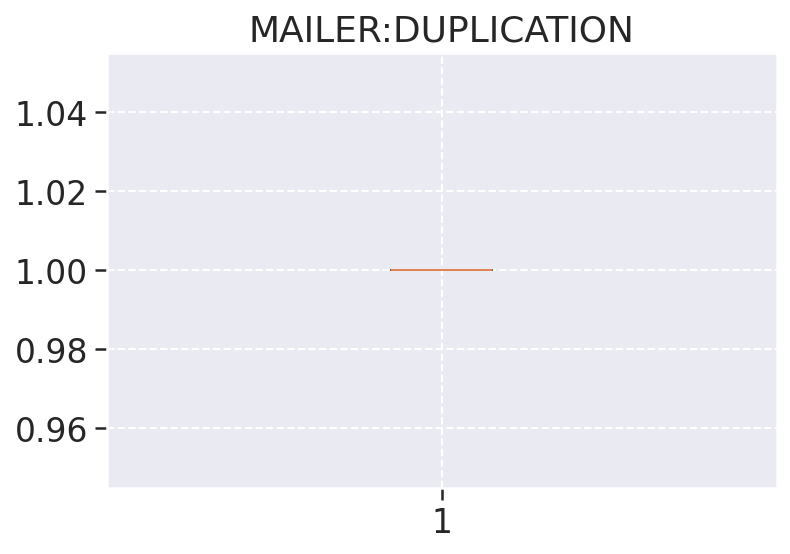

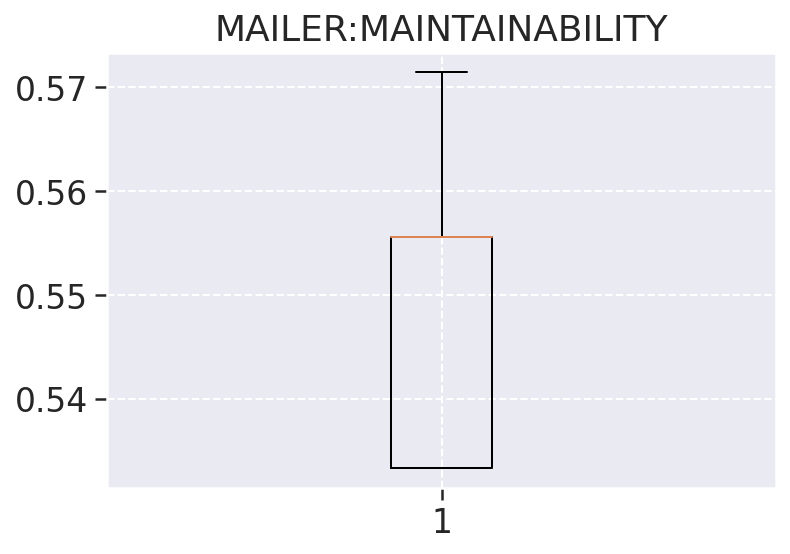

In [97]:
generate_boxplot(generic_df, repository)

## Reports

In [98]:
generic_df = eccoar_reports_metrics.copy()
repository = "REPORTS"

### Gráfico histórico

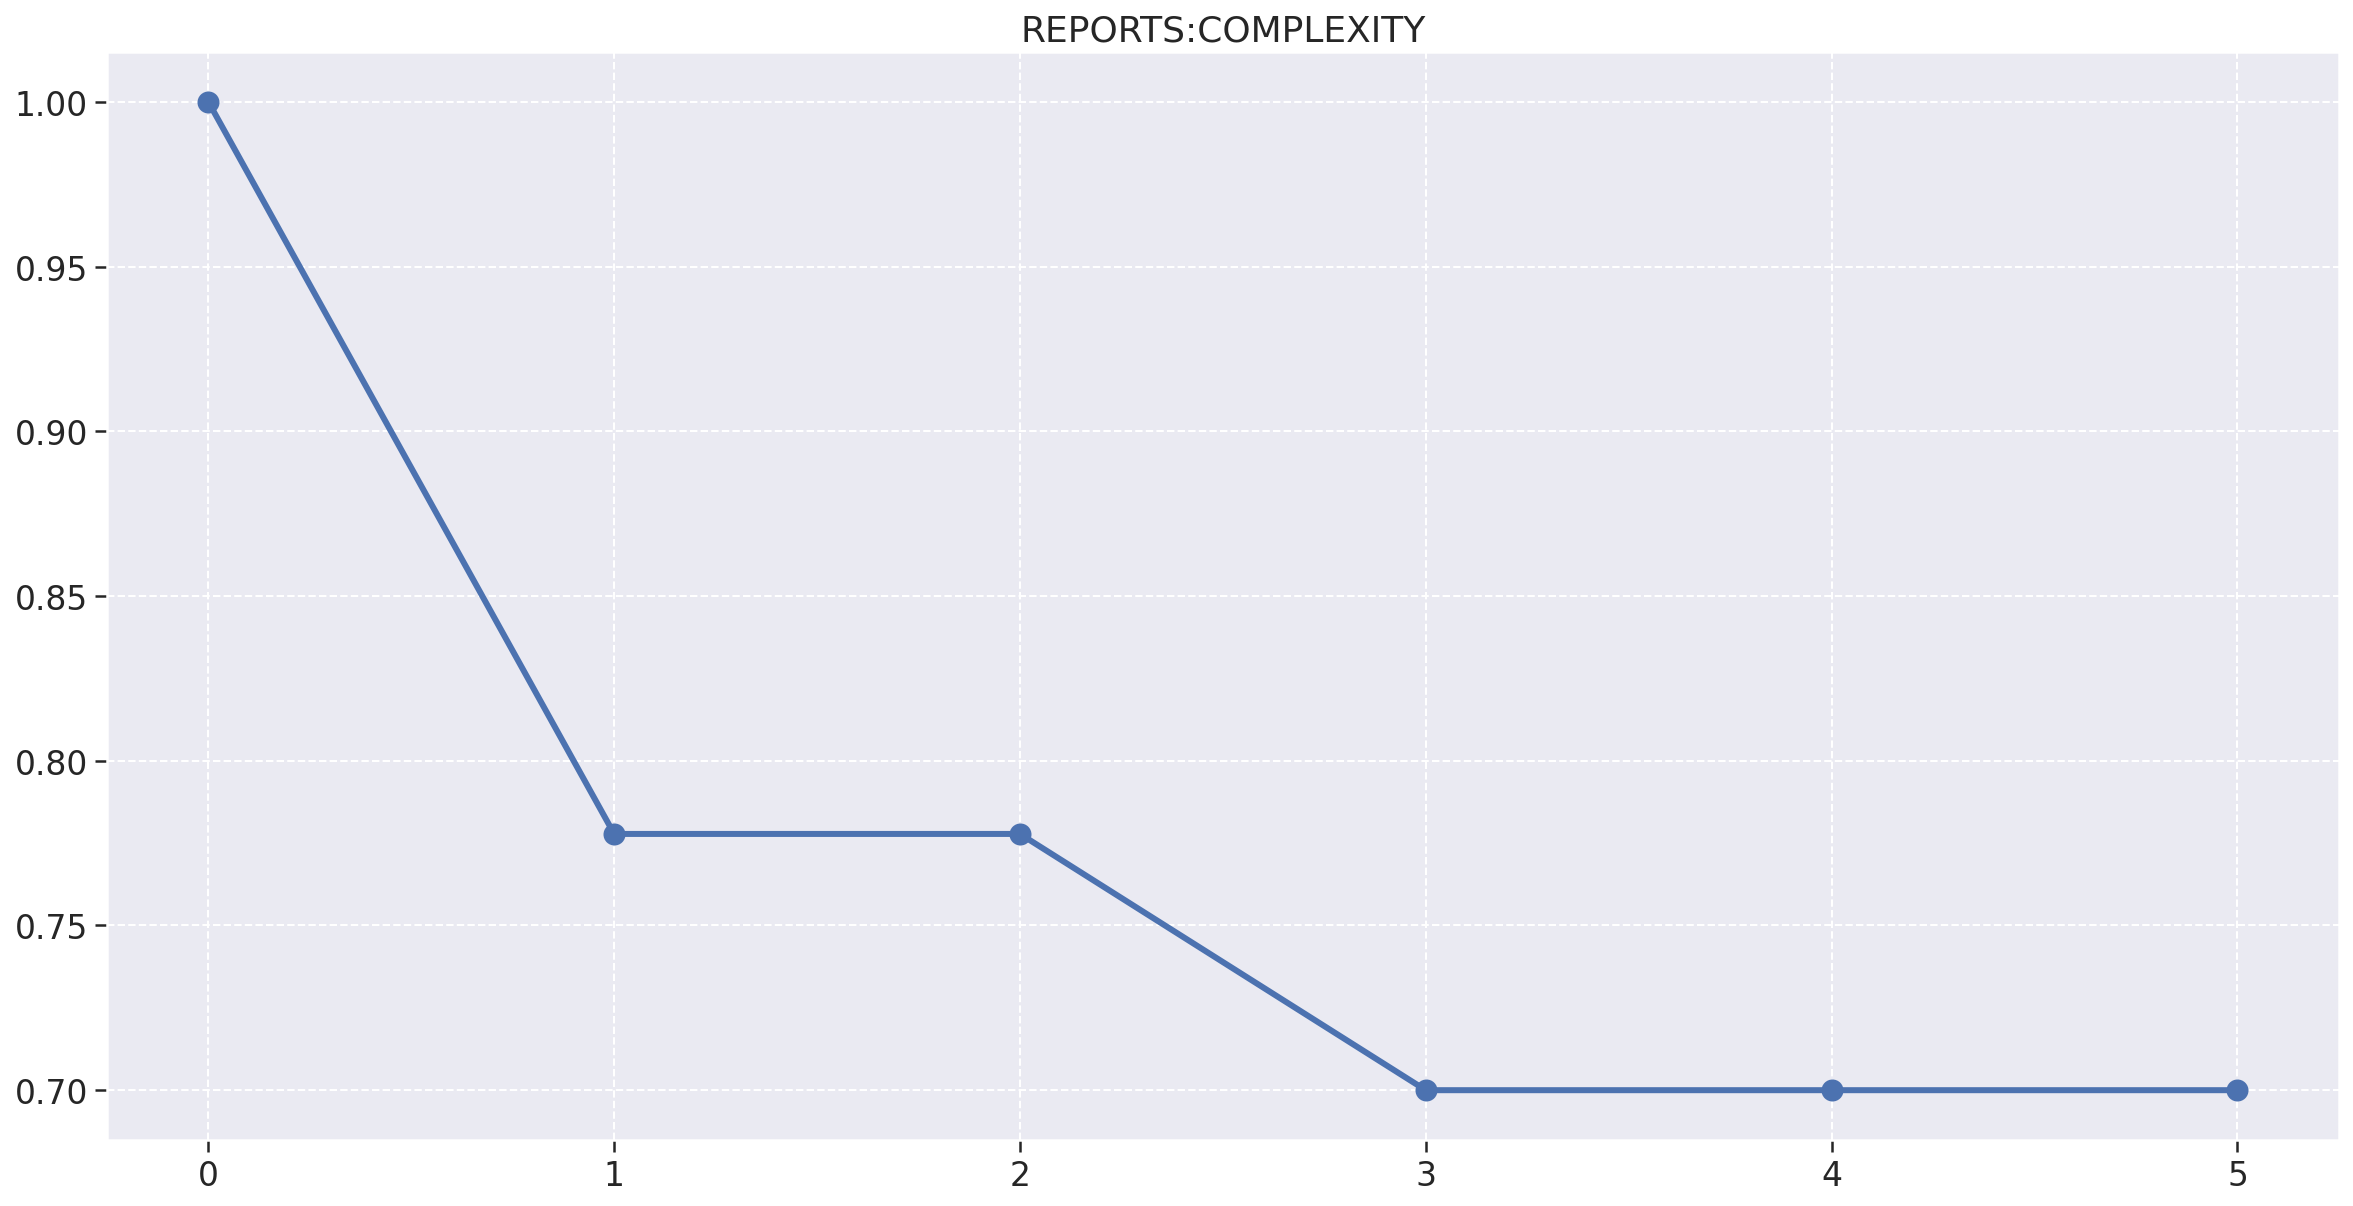

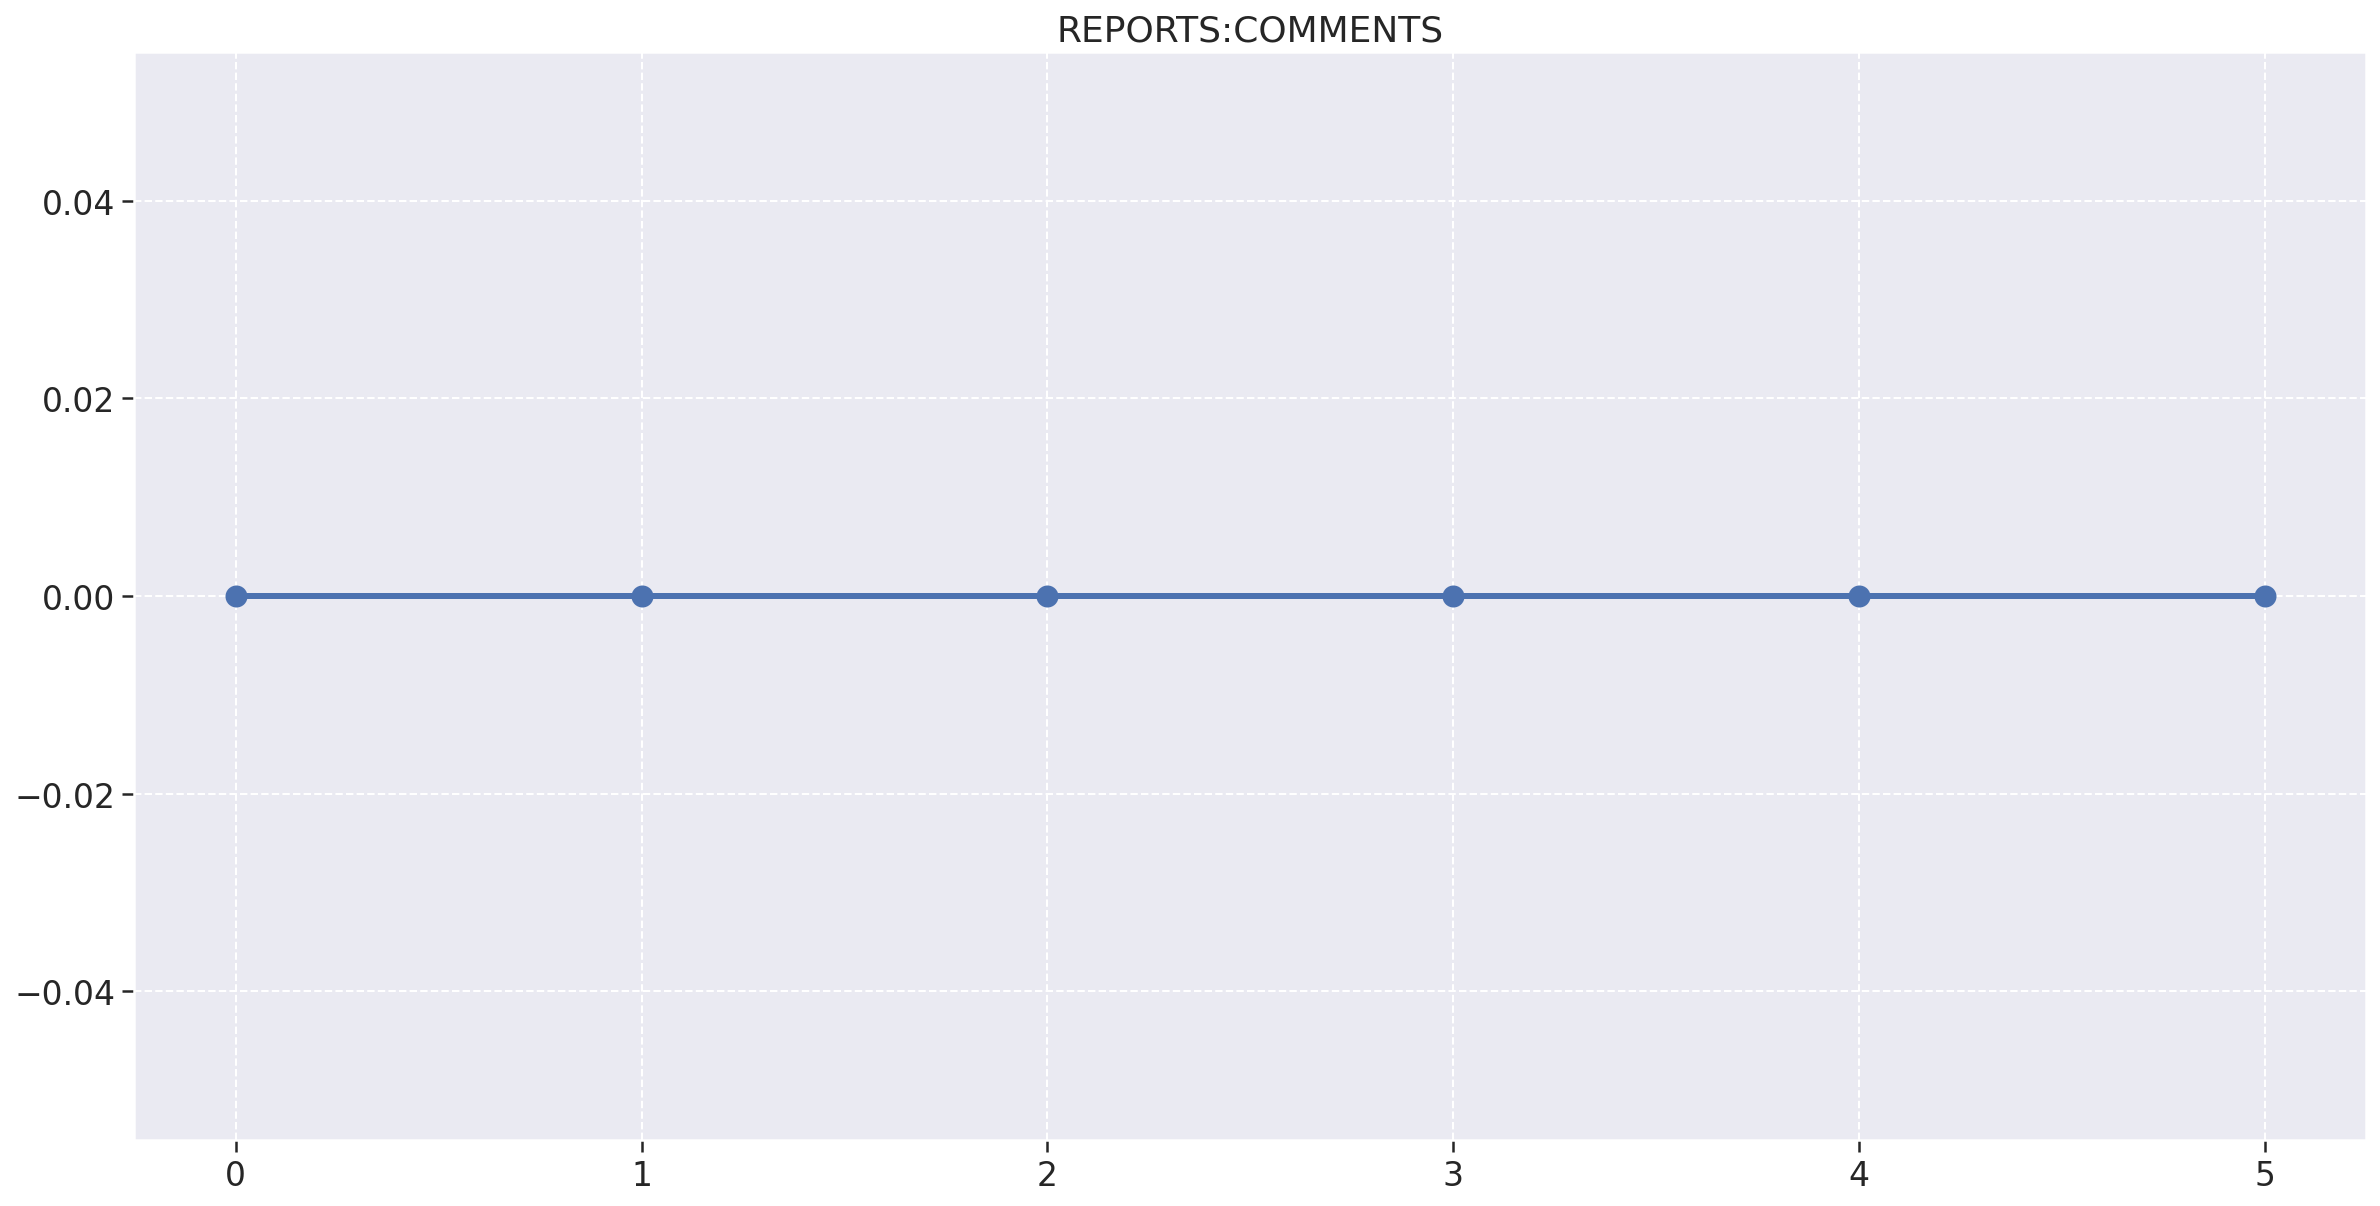

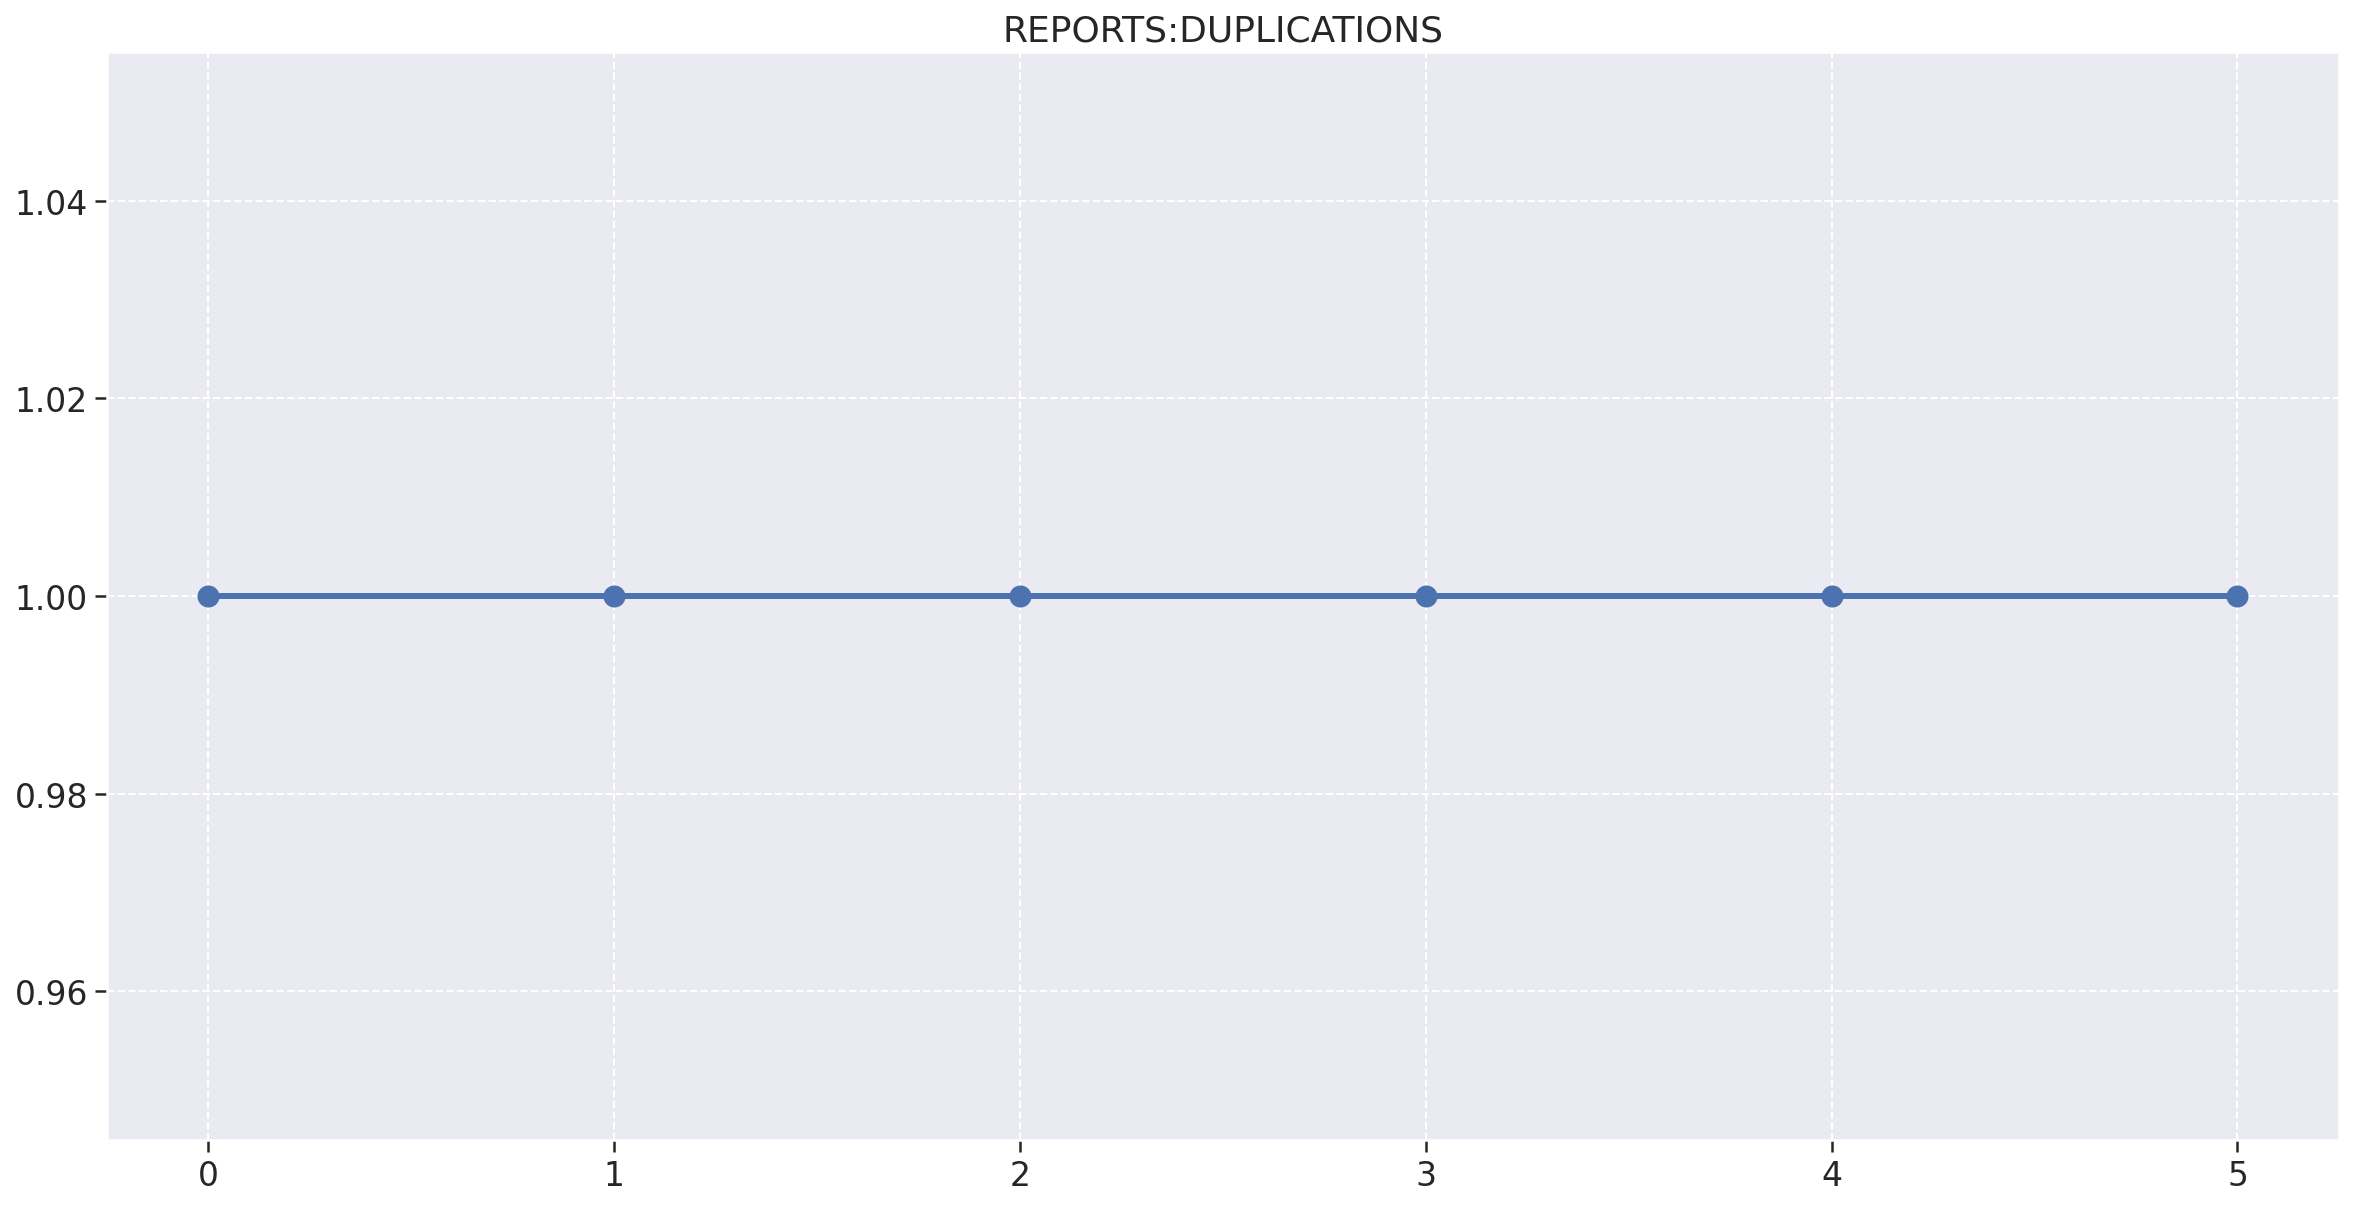

In [99]:
plot_history(generic_df, repository)

### Percentis

In [100]:
descriptive_percentage(generic_df)

### Regressão Linear

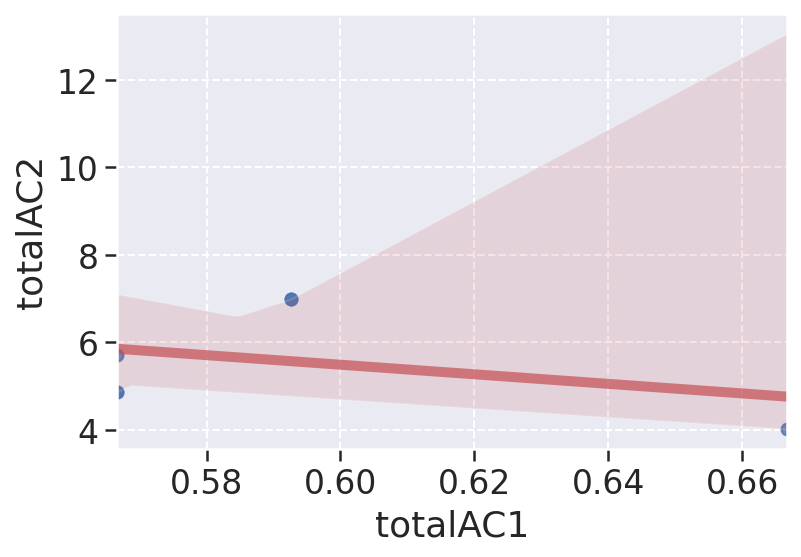

In [101]:
plot_linear_regression(generic_df)

### Histogramas

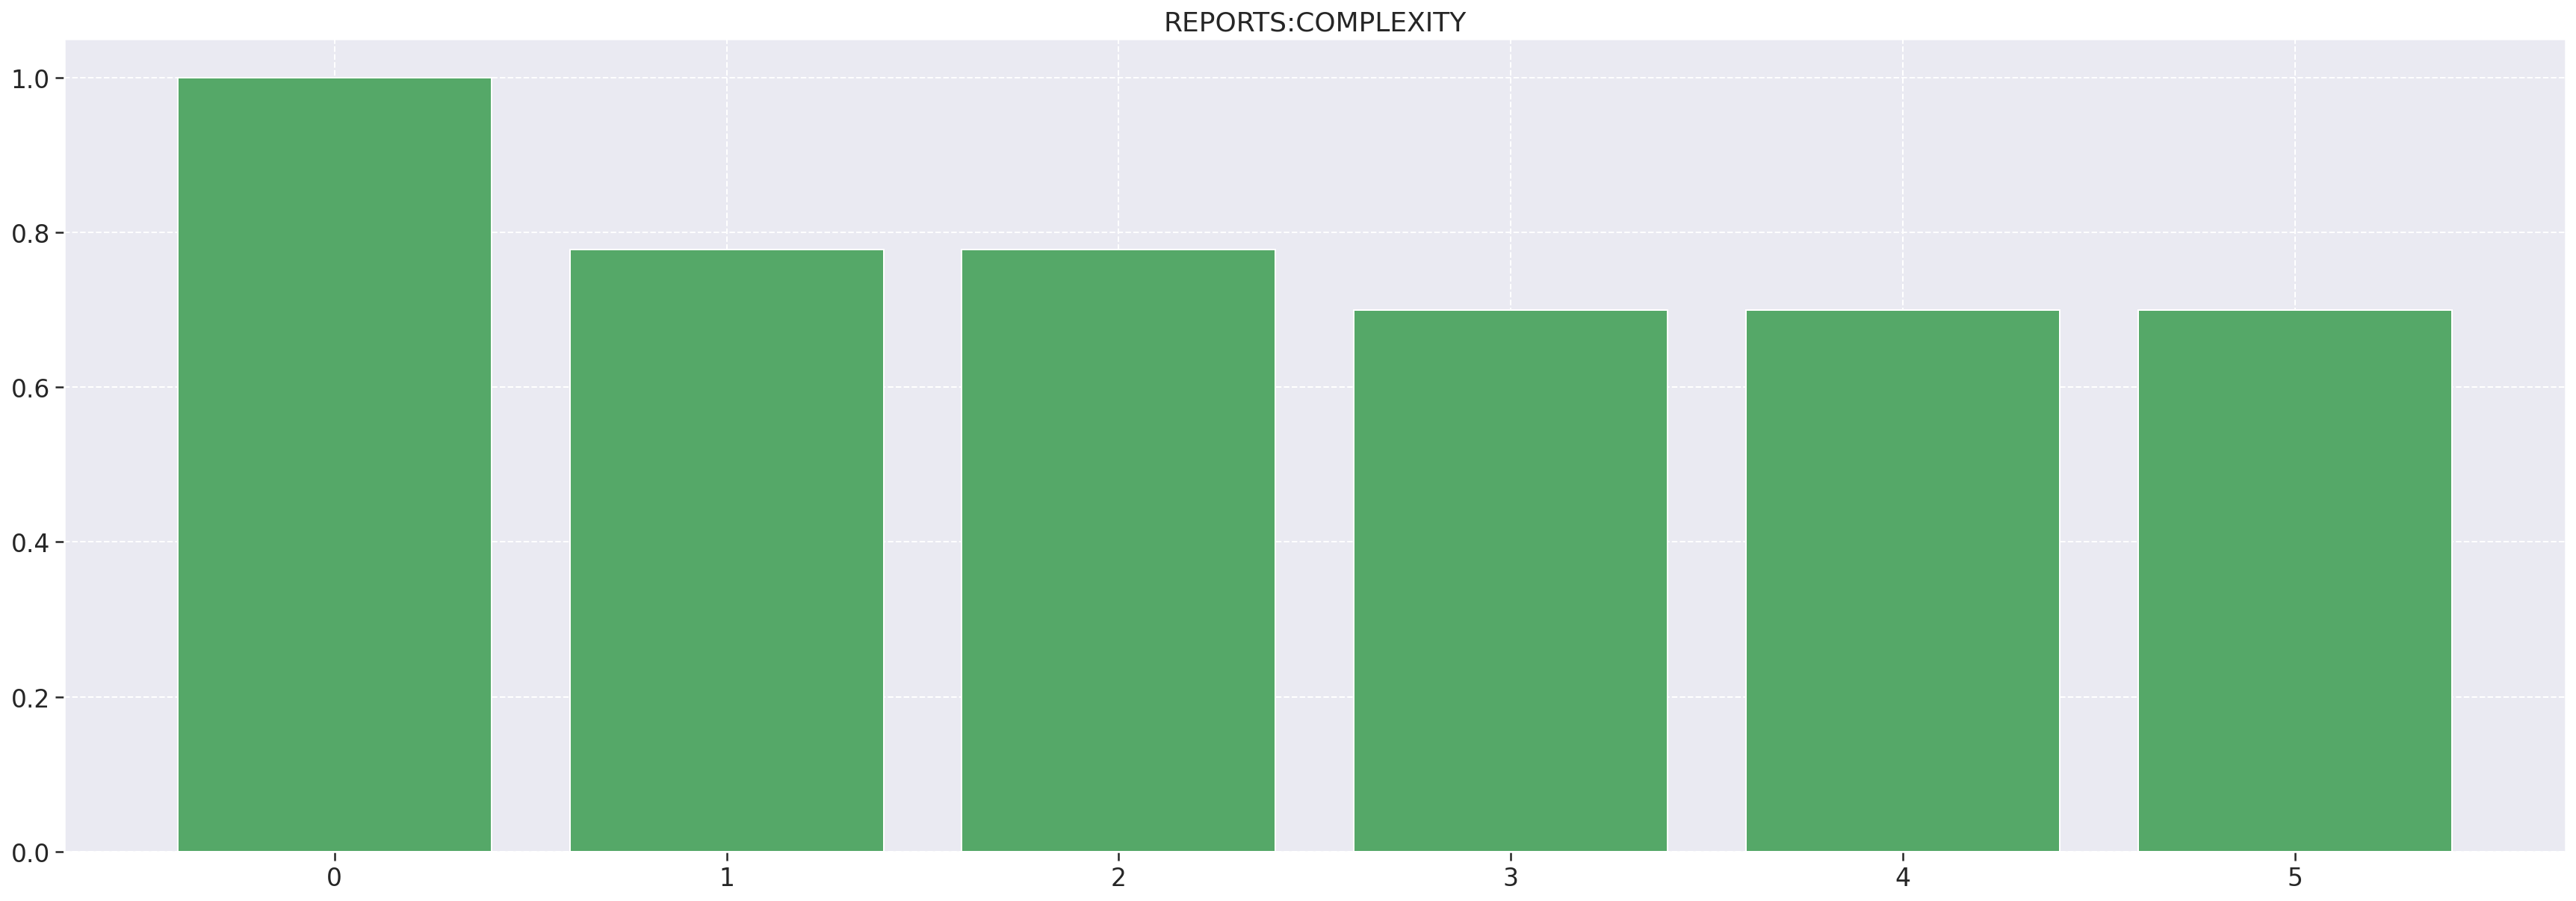

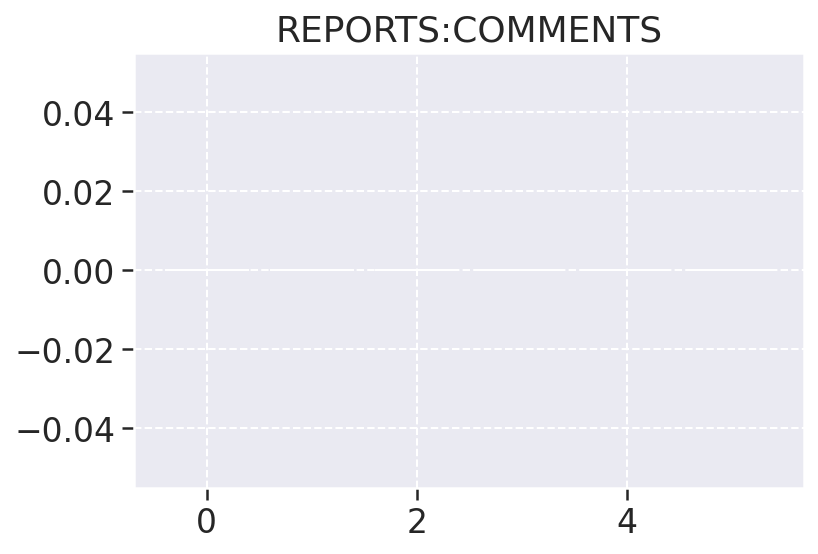

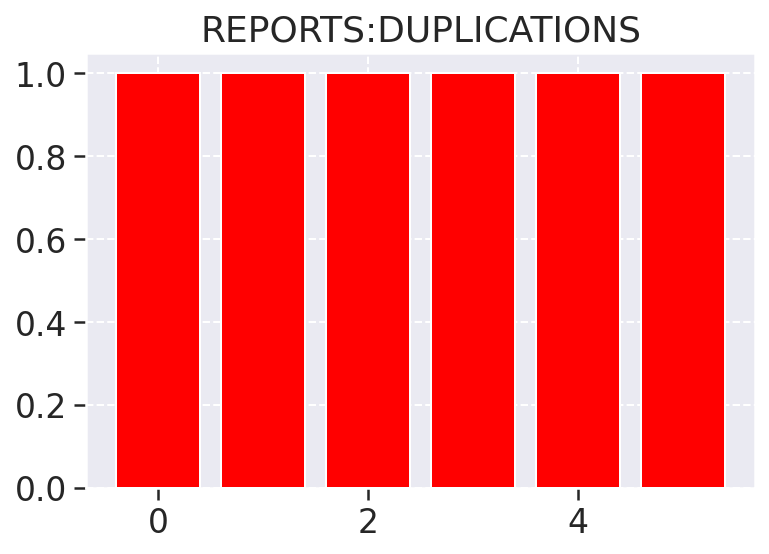

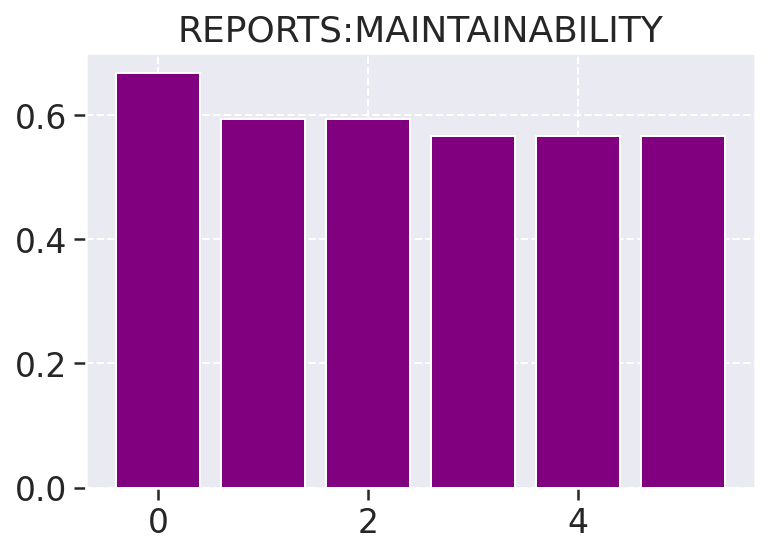

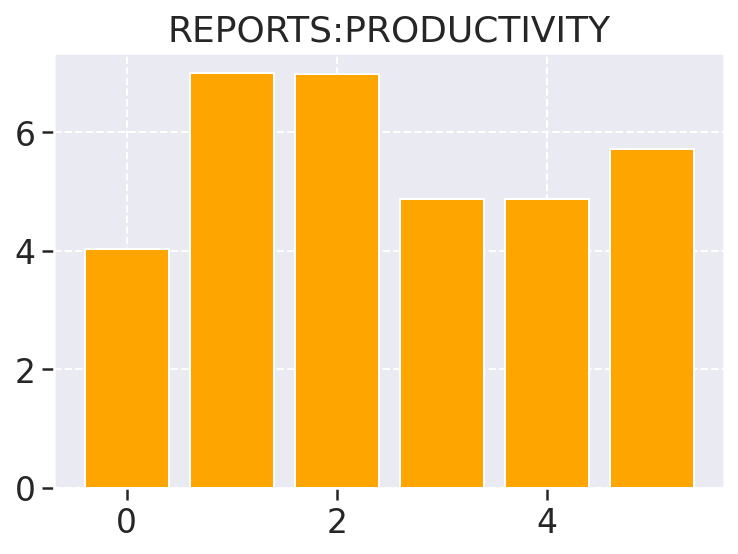

In [102]:
generate_histogram(repository, generic_df)

### Análise Descritiva

In [103]:
descriptive_statistics(generic_df)

count        mean        std        min         25%         50%  \
m1          6.0    0.775926   0.116198   0.700000    0.700000    0.738889   
m2          6.0    0.000000   0.000000   0.000000    0.000000    0.000000   
m3          6.0    1.000000   0.000000   1.000000    1.000000    1.000000   
ncloc       6.0  197.333333  83.653253  28.000000  218.000000  229.000000   
m7          6.0    5.648333   1.062853   4.660000    5.080000    5.295000   
m9          6.0    5.508333   1.630330   3.390000    4.660000    5.295000   
asc1        6.0    0.591975   0.038733   0.566667    0.566667    0.579630   
ac1         6.0    0.591975   0.038733   0.566667    0.566667    0.579630   
totalAC1    6.0    0.591975   0.038733   0.566667    0.566667    0.579630   
asc2        6.0    5.578333   1.219519   4.025000    4.870000    5.295000   
totalAC2    6.0    5.578333   1.219519   4.025000    4.870000    5.295000   

                 75%         max          var  
m1          0.777778    1.000000     0.013502  
m2          0.000000    0.000000     0.000000  
m3          1.000000    1.000000     0.000000  
ncloc     240.000000  240.000000  6997.866667  
m7          5.825000    7.630000     1.129657  
m9          6.252500    8.050000     2.657977  
asc1        0.592593    0.666667     0.001500  
ac1         0.592593    0.666667     0.001500  
totalAC1    0.592593    0.666667     0.001500  
asc2        6.672500    6.995000     1.487227  
totalAC2    6.672500    6.995000     1.487227

### Matriz de Correlação

In [104]:
correlationMatrix(generic_df)

m1  m2  m3     ncloc        m7        m9      asc1       ac1  \
m1        1.000000 NaN NaN -0.979082 -0.195079 -0.392283  1.000000  1.000000   
m2             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
m3             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
ncloc    -0.979082 NaN NaN  1.000000  0.359310  0.549093 -0.979082 -0.979082   
m7       -0.195079 NaN NaN  0.359310  1.000000  0.623636 -0.195079 -0.195079   
m9       -0.392283 NaN NaN  0.549093  0.623636  1.000000 -0.392283 -0.392283   
asc1      1.000000 NaN NaN -0.979082 -0.195079 -0.392283  1.000000  1.000000   
ac1       1.000000 NaN NaN -0.979082 -0.195079 -0.392283  1.000000  1.000000   
totalAC1  1.000000 NaN NaN -0.979082 -0.195079 -0.392283  1.000000  1.000000   
asc2     -0.347224 NaN NaN  0.523607  0.852625  0.940192 -0.347224 -0.347224   
totalAC2 -0.347224 NaN NaN  0.523607  0.852625  0.940192 -0.347224 -0.347224   

          totalAC1      asc2  totalAC2  
m1        1.000000 -0.347224 -0.347224  
m2             NaN       NaN       NaN  
m3             NaN       NaN       NaN  
ncloc    -0.979082  0.523607  0.523607  
m7       -0.195079  0.852625  0.852625  
m9       -0.392283  0.940192  0.940192  
asc1      1.000000 -0.347224 -0.347224  
ac1       1.000000 -0.347224 -0.347224  
totalAC1  1.000000 -0.347224 -0.347224  
asc2     -0.347224  1.000000  1.000000  
totalAC2 -0.347224  1.000000  1.000000

### Box-plot

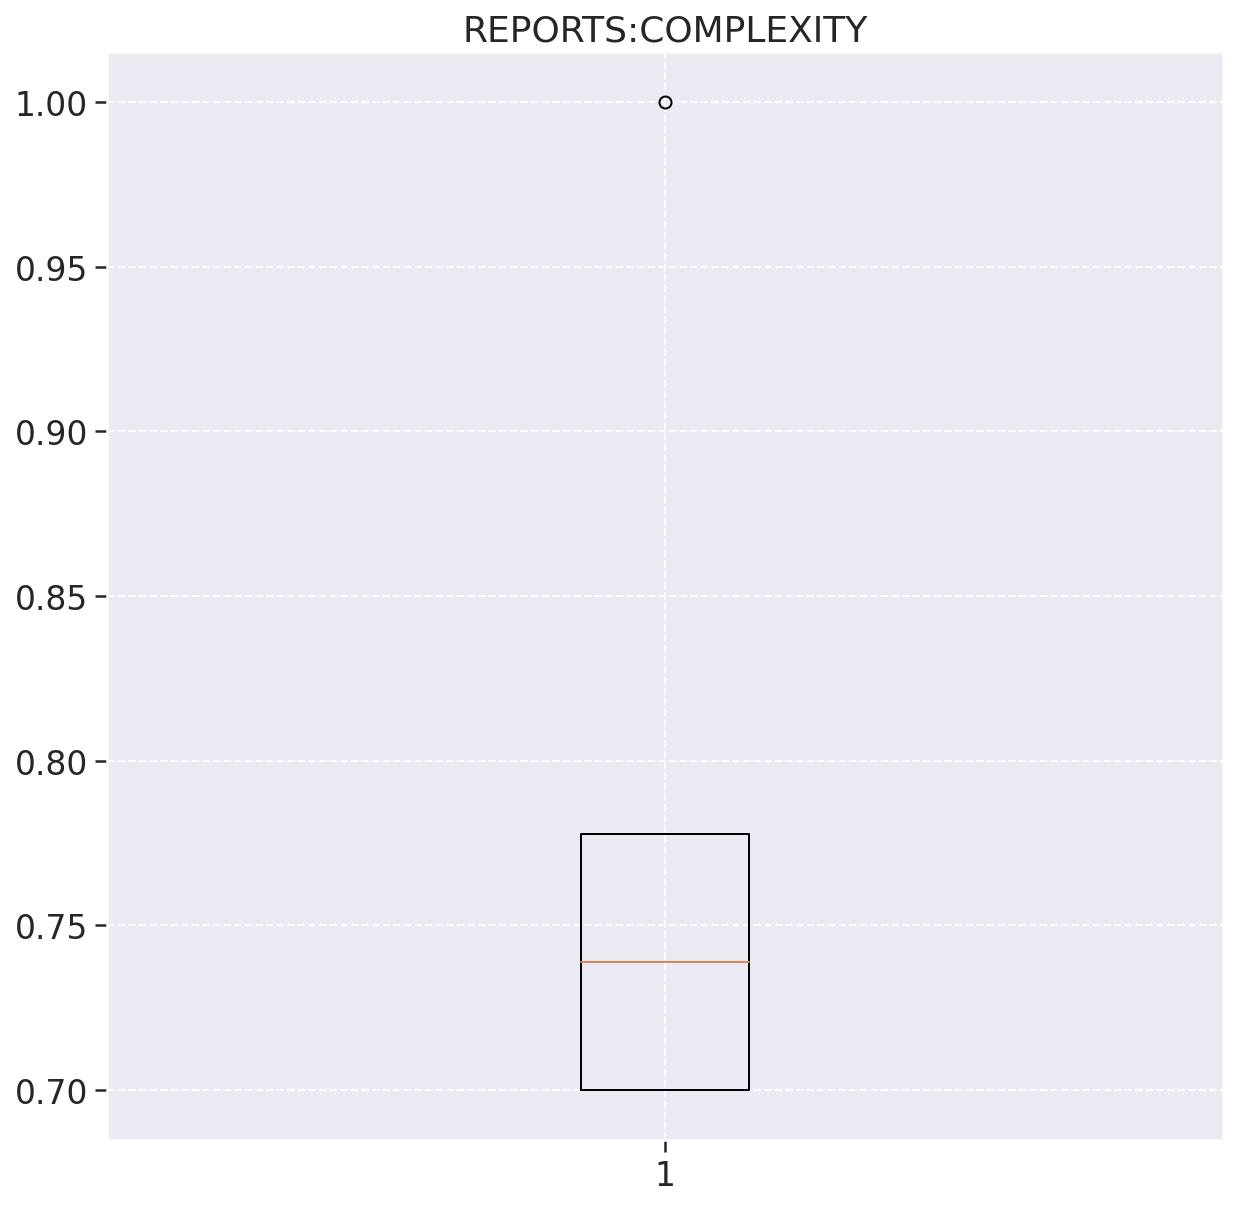

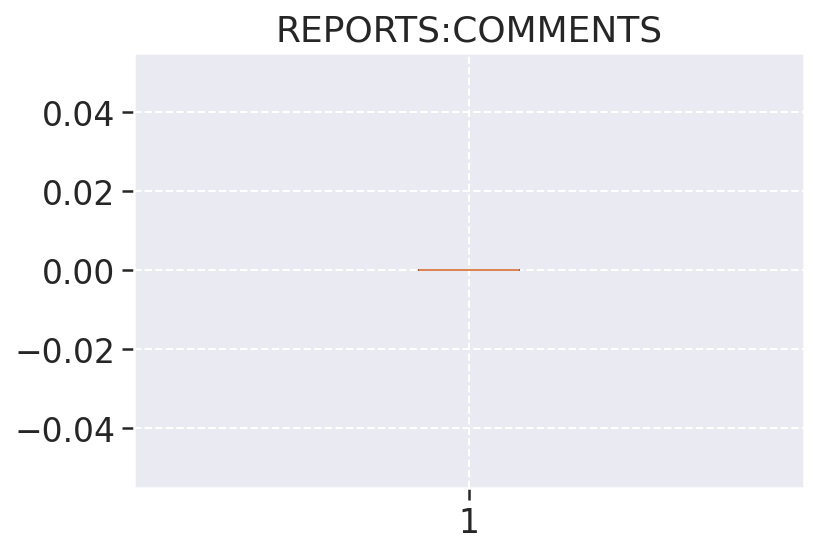

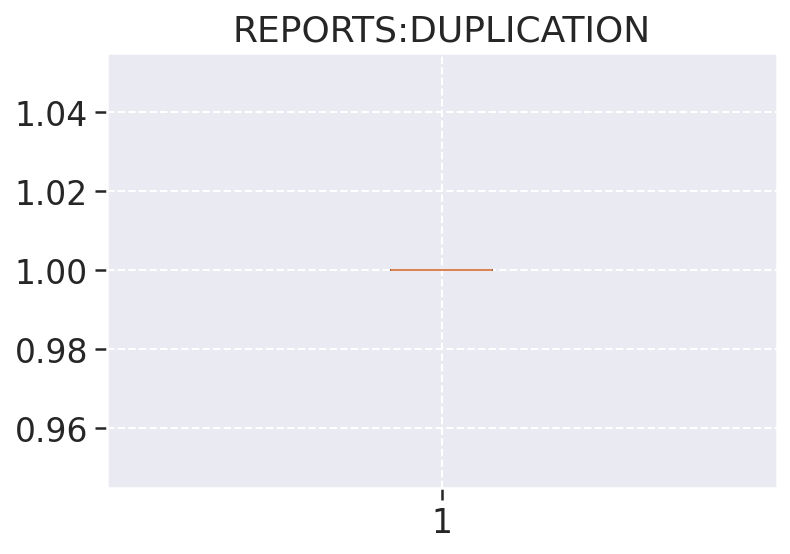

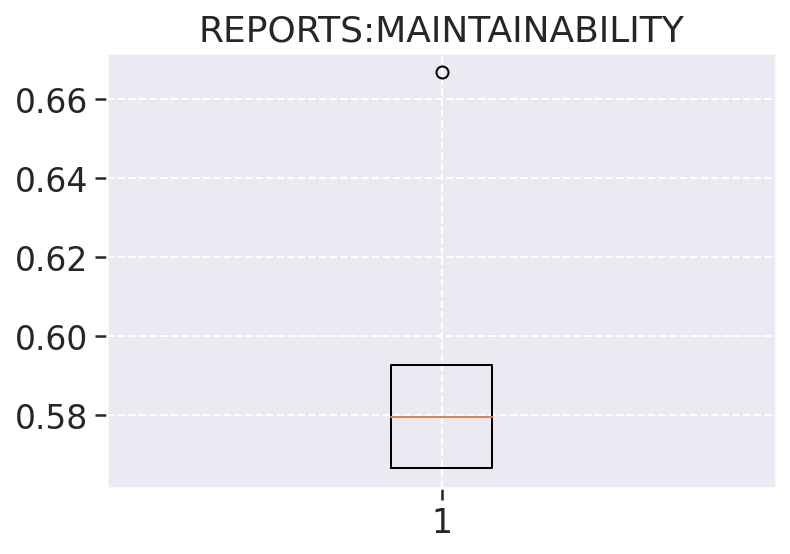

In [105]:
generate_boxplot(generic_df, repository)

## All metrics

In [107]:
generic_df = all_metrics.copy()
repository = "ALL METRICS"

### Gráfico histórico

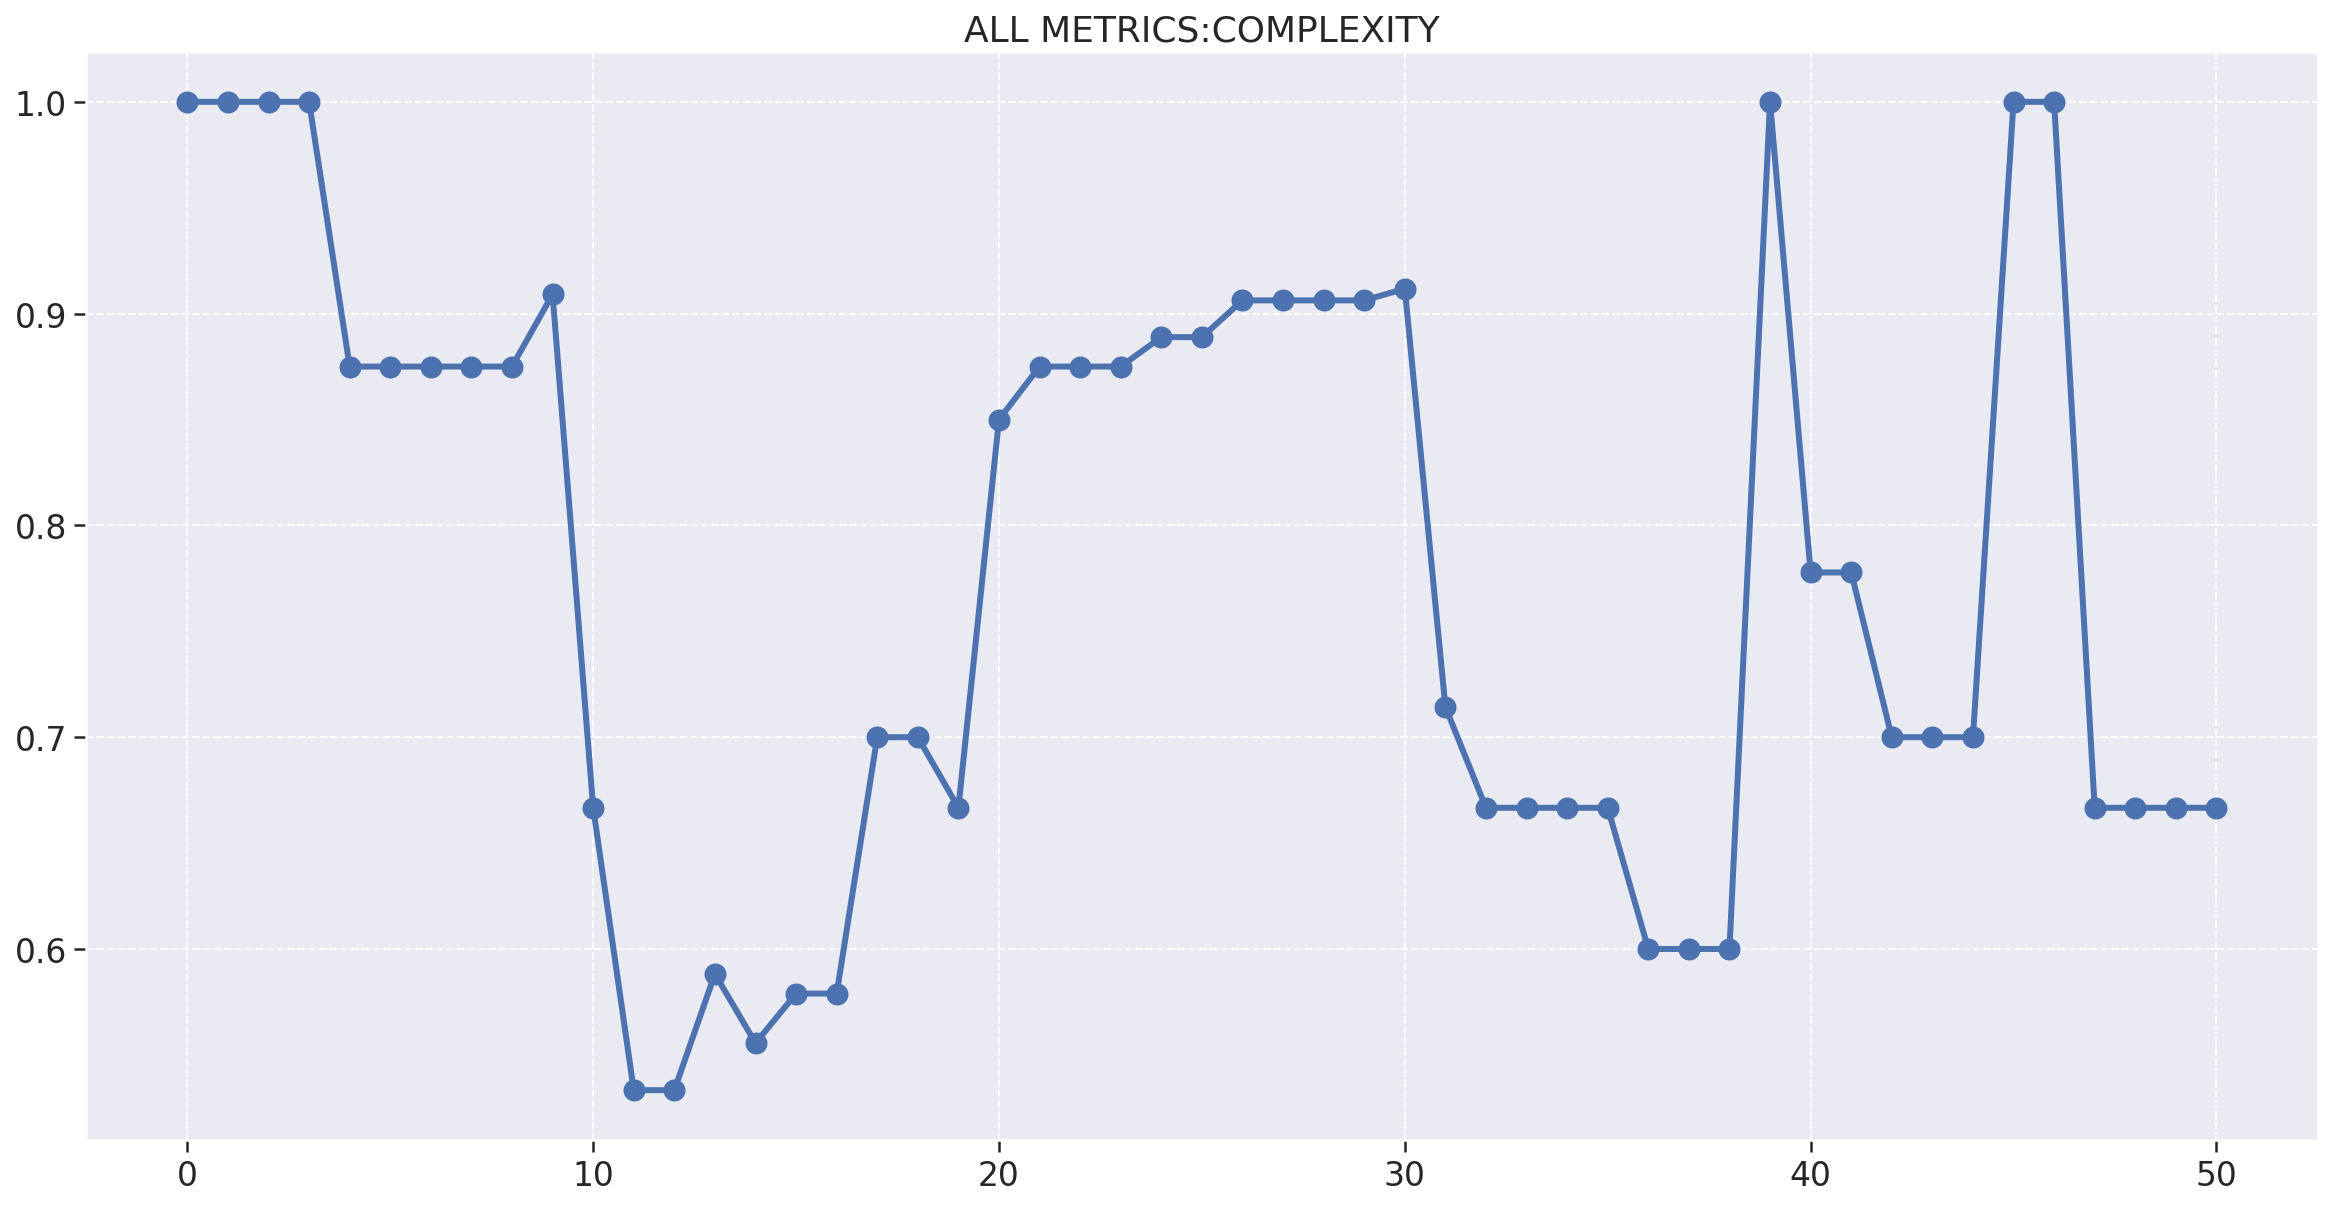

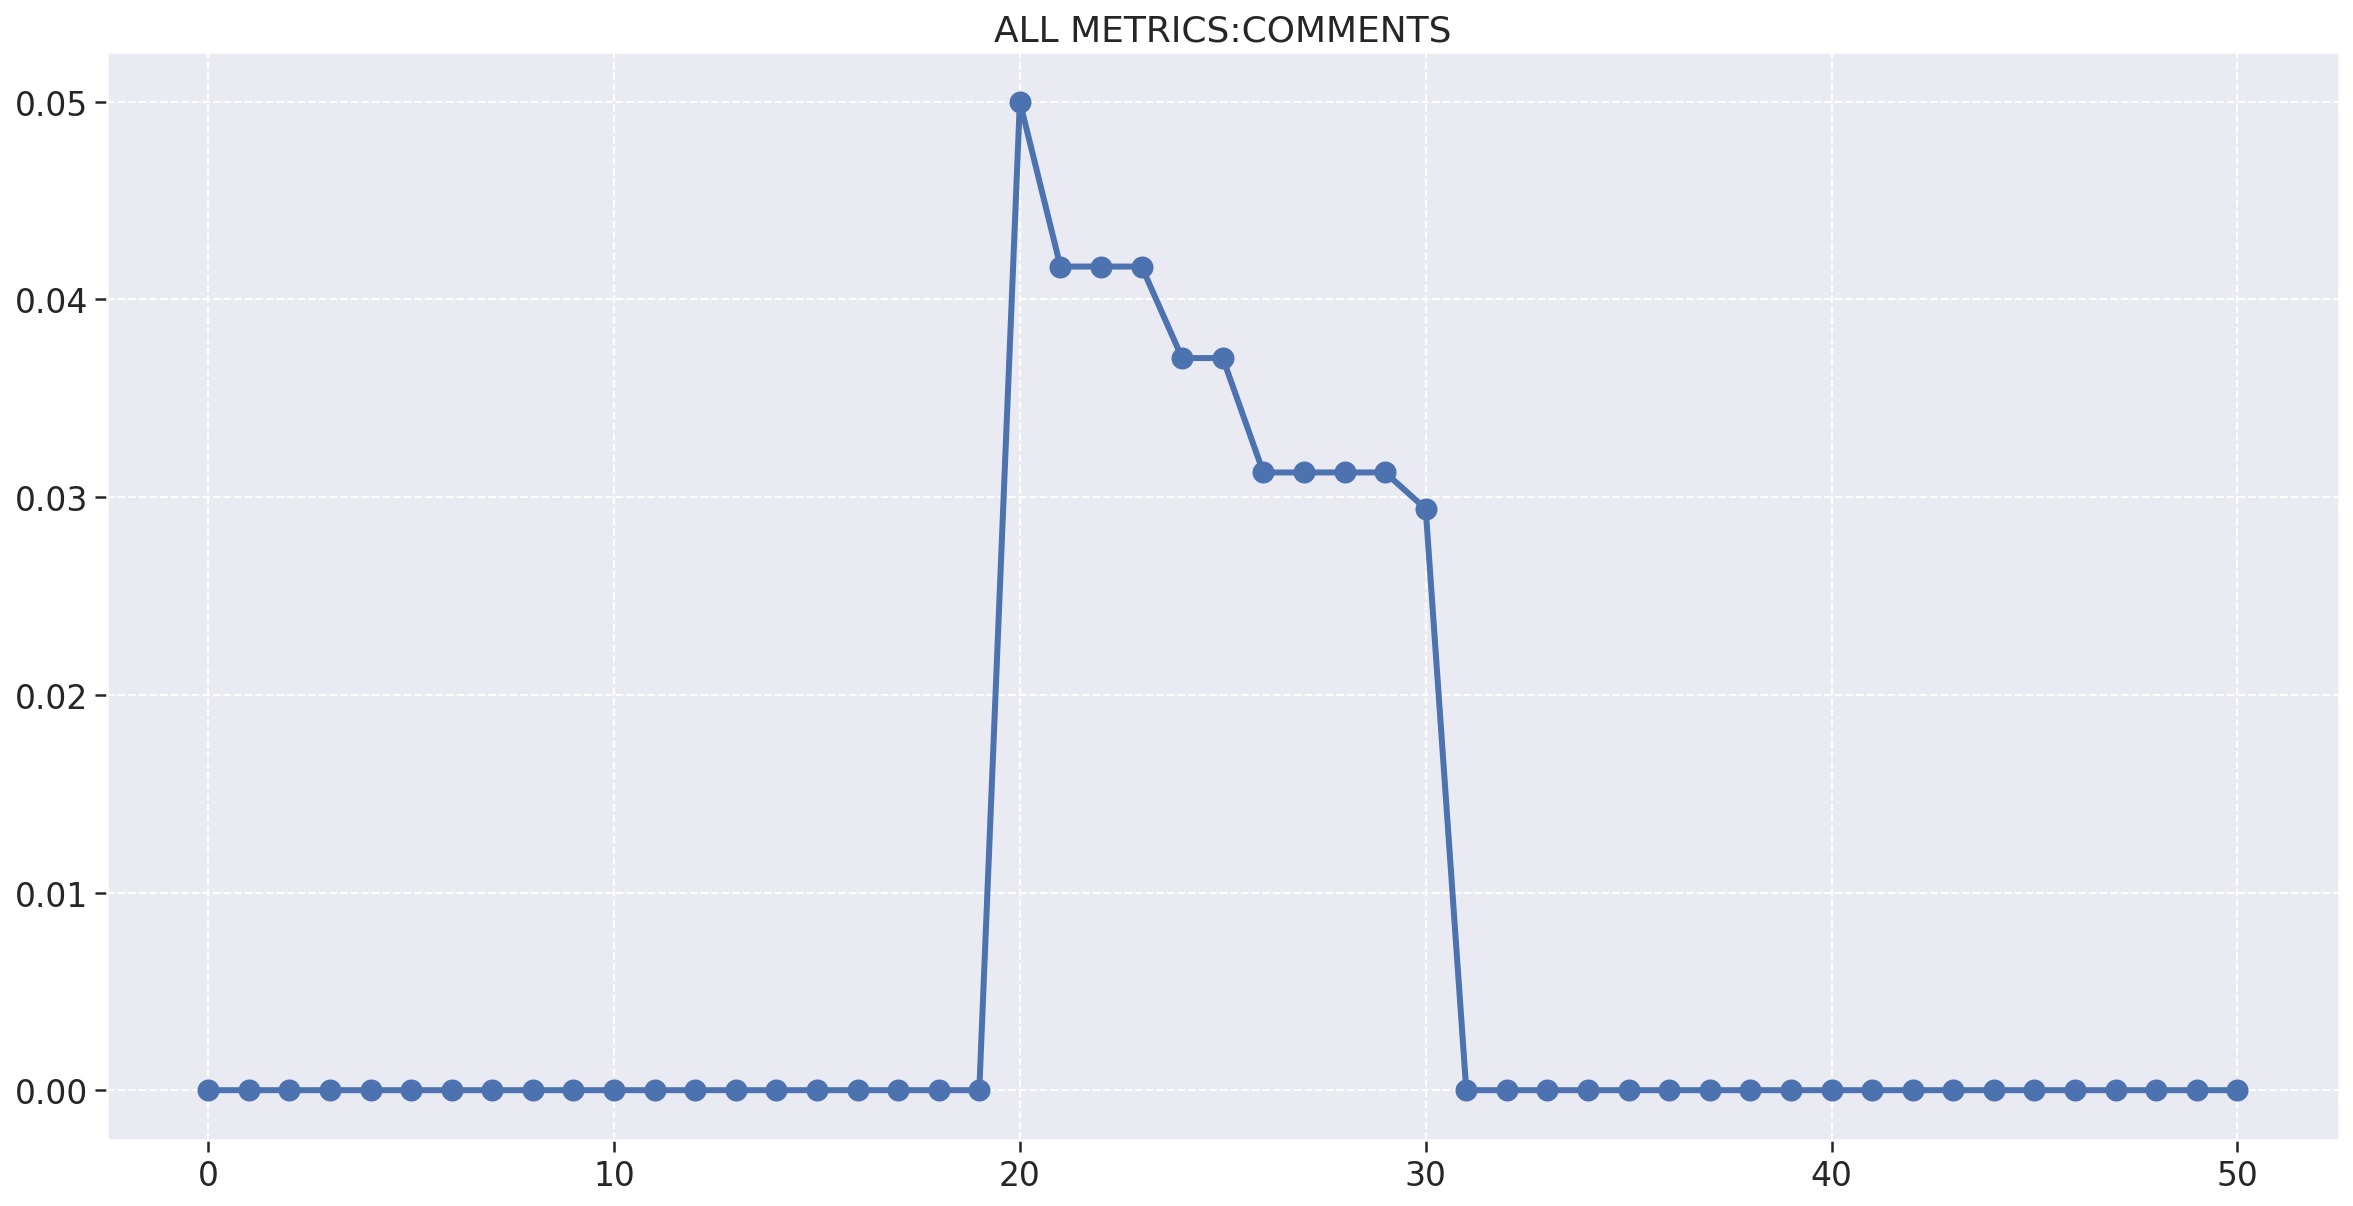

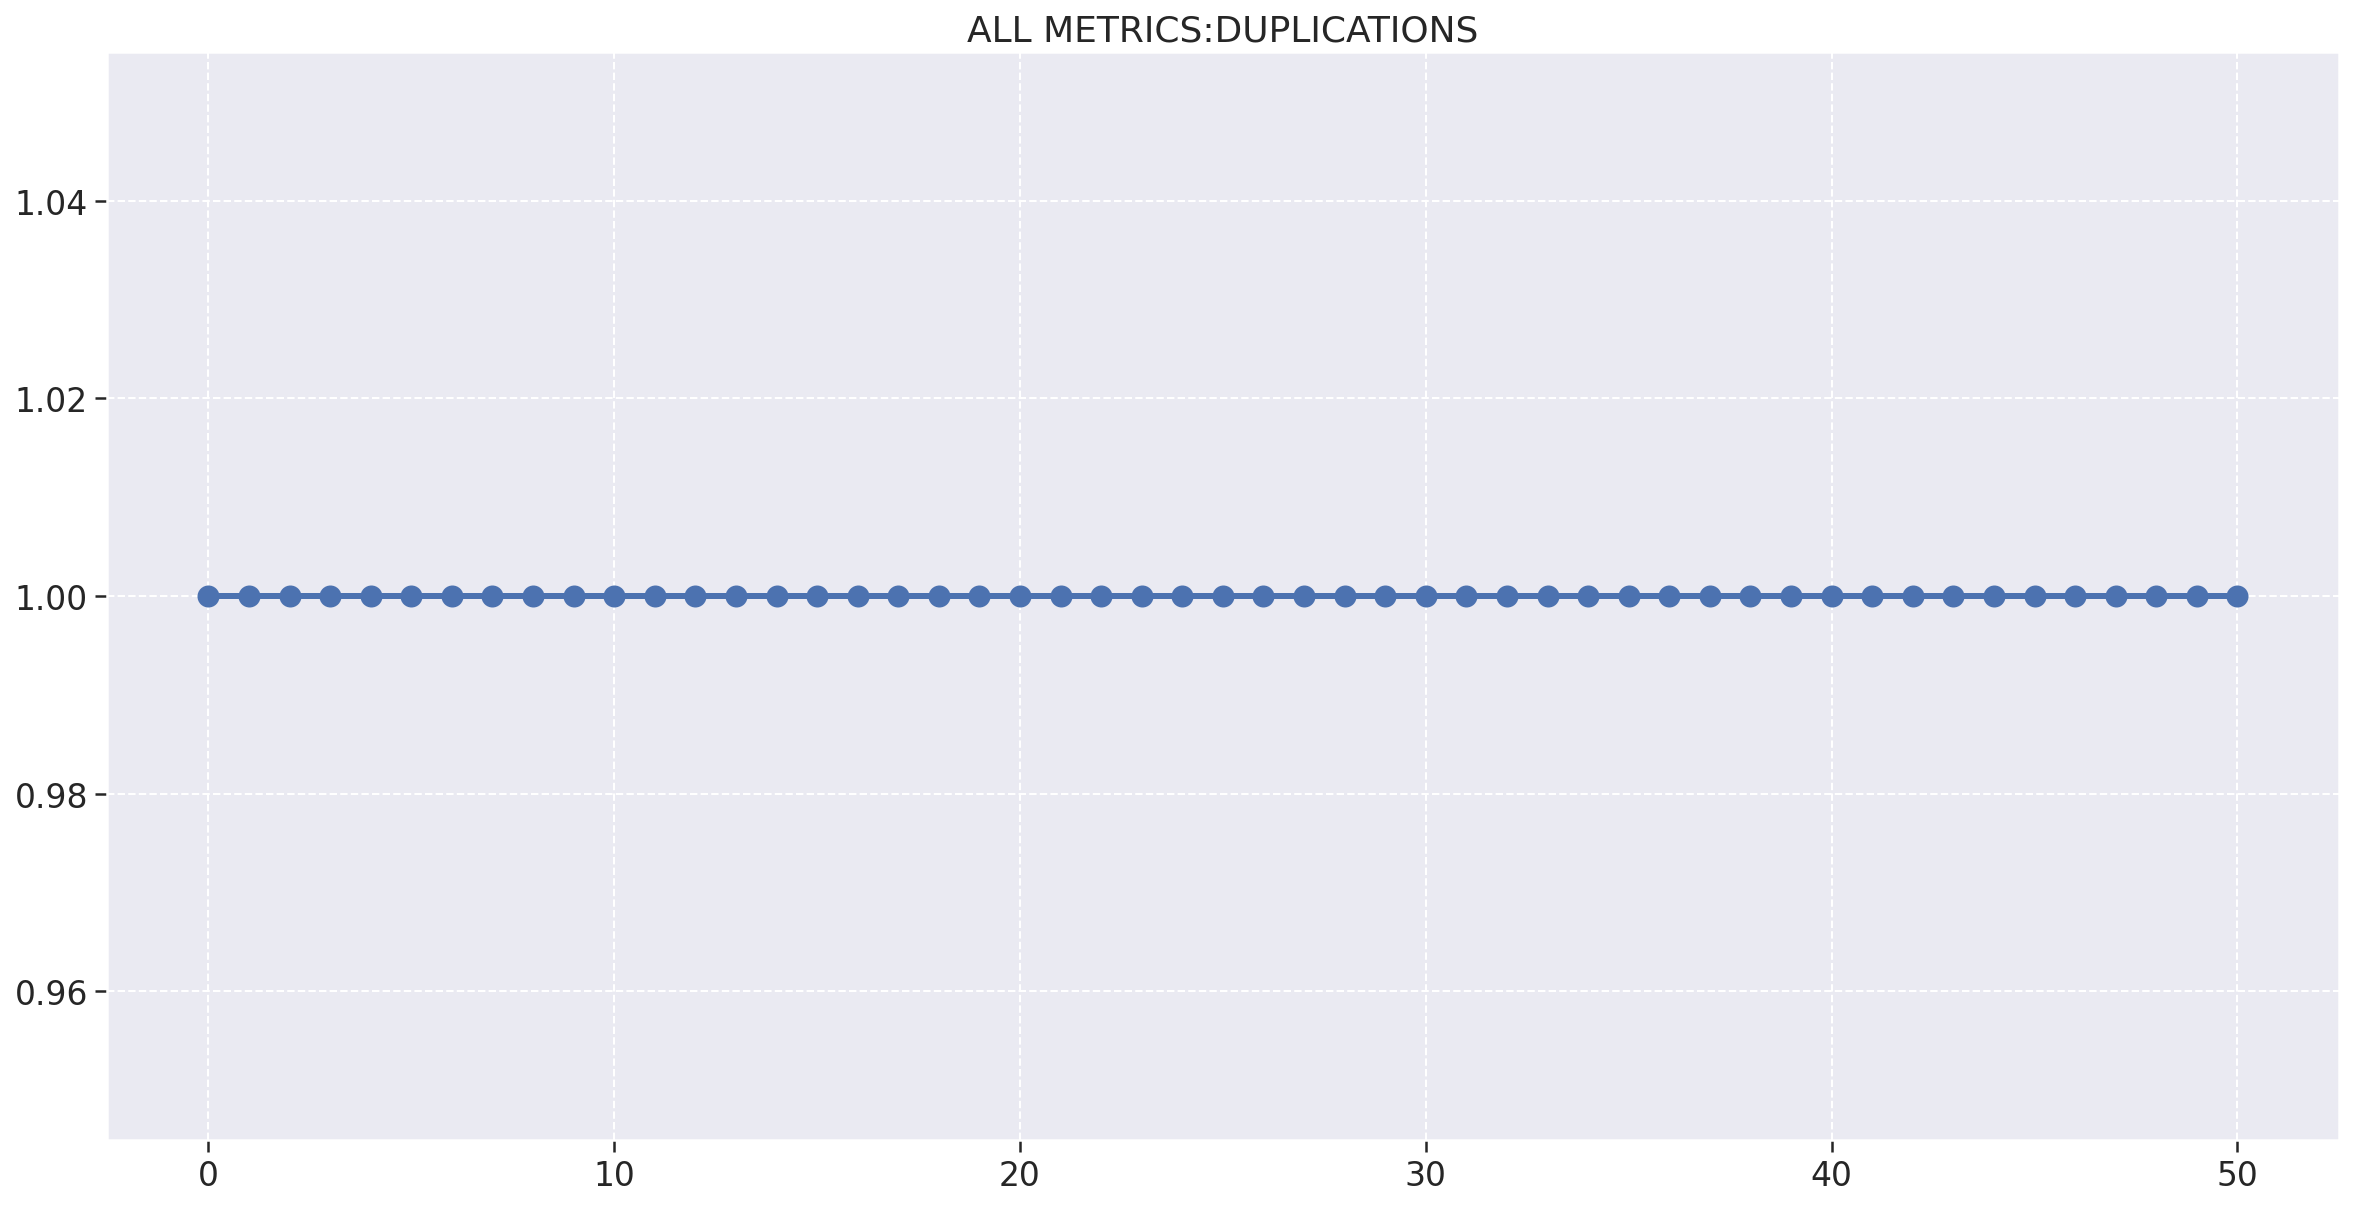

In [108]:
plot_history(generic_df, repository)

### Percentis

In [109]:
descriptive_percentage(generic_df)

### Regressão Linear

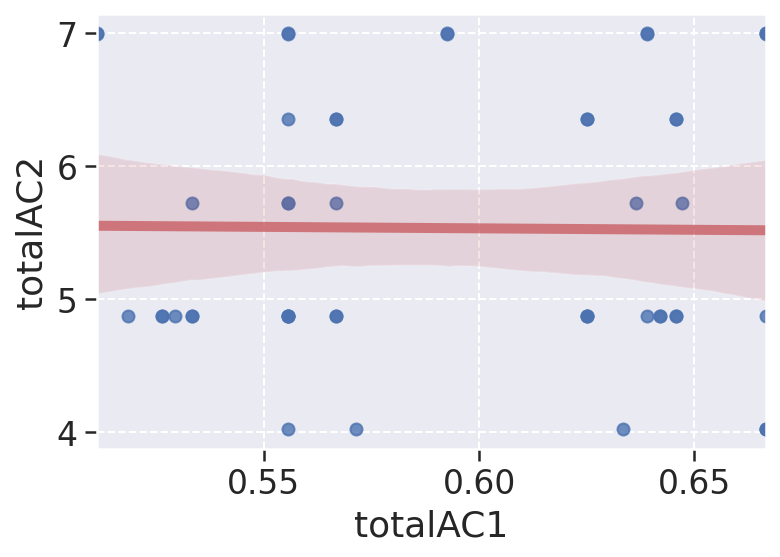

In [110]:
plot_linear_regression(generic_df)

### Histogramas

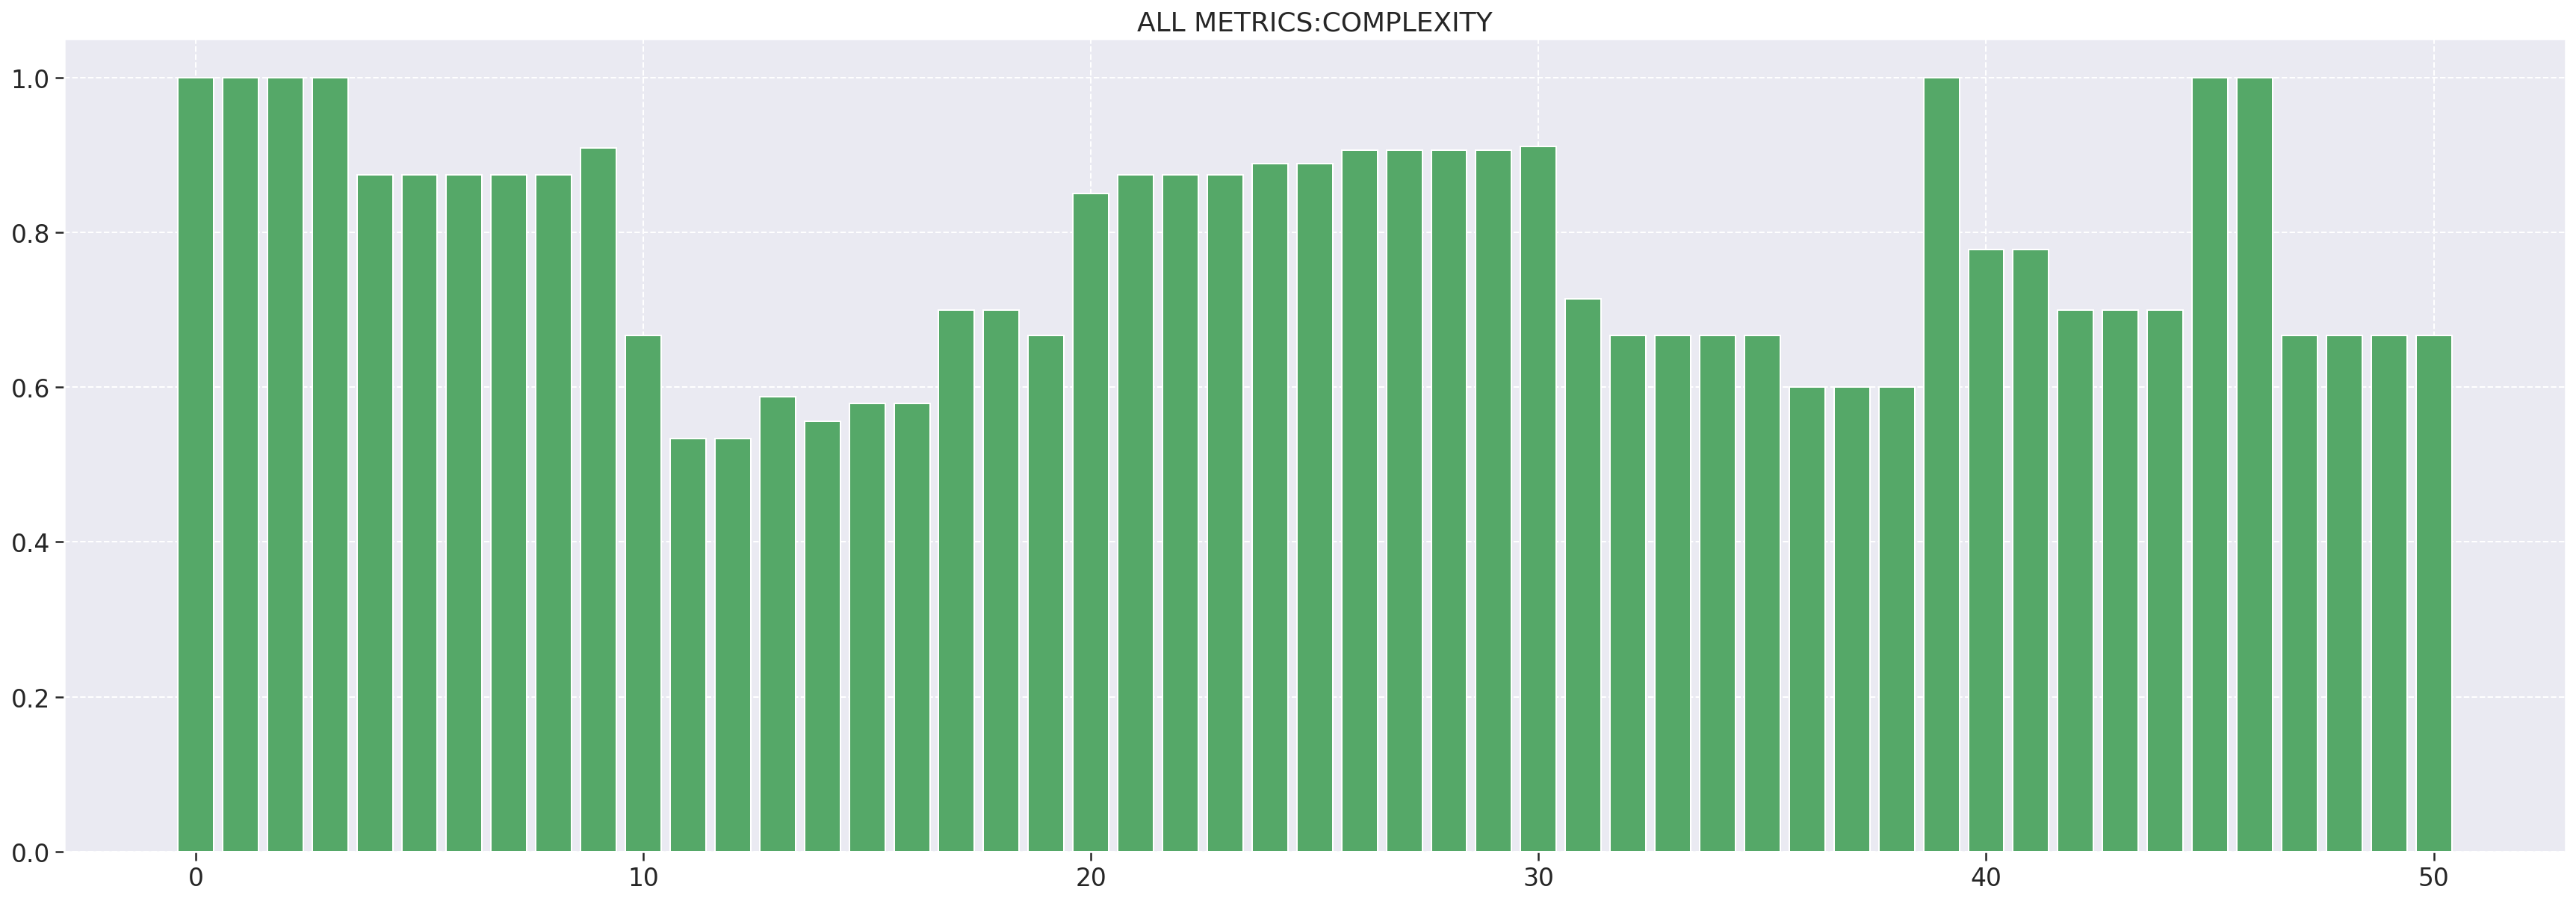

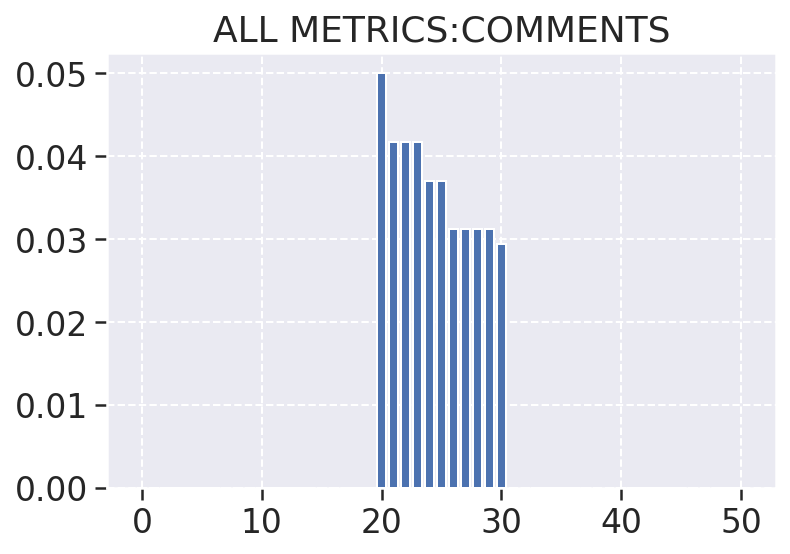

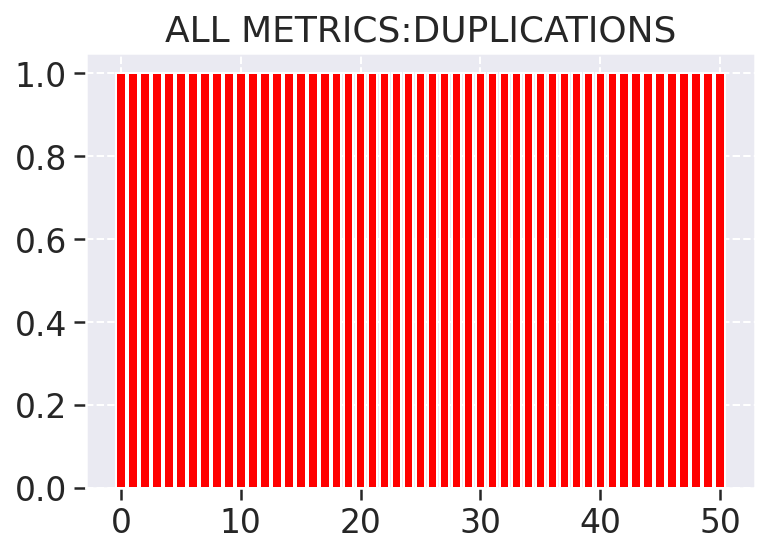

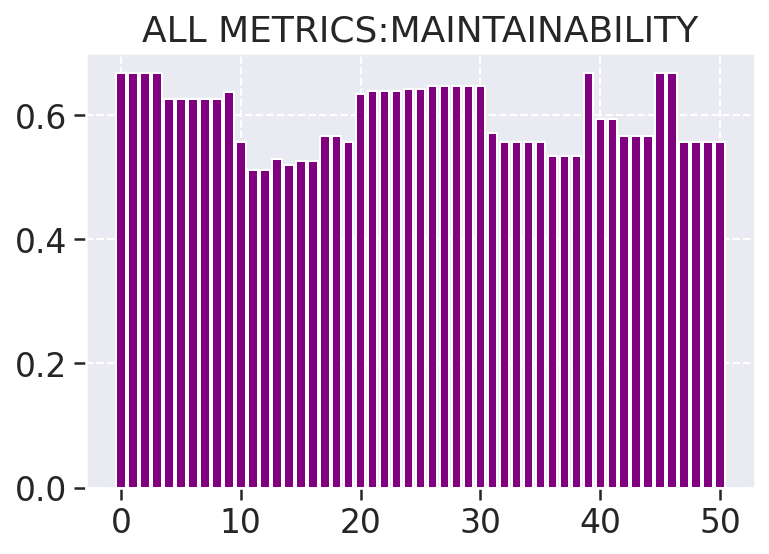

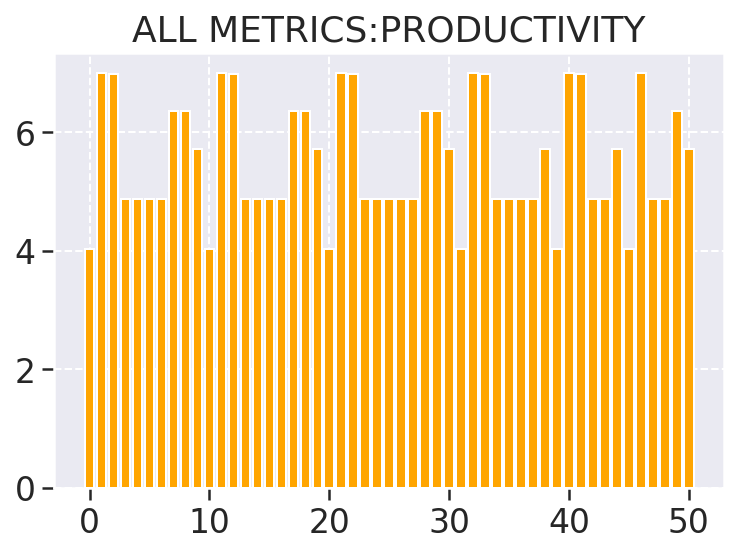

In [111]:
generate_histogram(repository, generic_df)

### Análise Descritiva

In [112]:
descriptive_statistics(generic_df)

count        mean         std        min         25%         50%  \
m1         51.0    0.778010    0.147570   0.533333    0.666667    0.777778   
m2         51.0    0.007911    0.015512   0.000000    0.000000    0.000000   
m3         51.0    1.000000    0.000000   1.000000    1.000000    1.000000   
ncloc      51.0  544.784314  498.864764  28.000000  218.000000  305.000000   
m7         51.0    5.515294    0.912145   4.660000    4.660000    5.080000   
m9         51.0    5.549216    1.316825   3.390000    4.660000    5.080000   
asc1       51.0    0.595307    0.051396   0.511111    0.555556    0.592593   
ac1        51.0    0.595307    0.051396   0.511111    0.555556    0.592593   
totalAC1   51.0    0.595307    0.051396   0.511111    0.555556    0.592593   
asc2       51.0    5.532255    1.012461   4.025000    4.870000    4.870000   
totalAC2   51.0    5.532255    1.012461   4.025000    4.870000    4.870000   

                 75%          max            var  
m1          0.897569     1.000000       0.021777  
m2          0.000000     0.050000       0.000241  
m3          1.000000     1.000000       0.000000  
ncloc     684.000000  1996.000000  248866.052549  
m7          5.930000     7.630000       0.832009  
m9          6.360000     8.050000       1.734027  
asc1        0.641975     0.666667       0.002642  
ac1         0.641975     0.666667       0.002642  
totalAC1    0.641975     0.666667       0.002642  
asc2        6.355000     6.995000       1.025076  
totalAC2    6.355000     6.995000       1.025076

### Matriz de Correlação

In [113]:
correlationMatrix(generic_df)

m1        m2  m3     ncloc        m7        m9      asc1  \
m1        1.000000  0.383563 NaN  0.249479  0.038557 -0.041532  0.995675   
m2        0.383563  1.000000 NaN  0.798059 -0.053441  0.008089  0.467707   
m3             NaN       NaN NaN       NaN       NaN       NaN       NaN   
ncloc     0.249479  0.798059 NaN  1.000000 -0.006804  0.150665  0.319062   
m7        0.038557 -0.053441 NaN -0.006804  1.000000  0.638674  0.031526   
m9       -0.041532  0.008089 NaN  0.150665  0.638674  1.000000 -0.038936   
asc1      0.995675  0.467707 NaN  0.319062  0.031526 -0.038936  1.000000   
ac1       0.995675  0.467707 NaN  0.319062  0.031526 -0.038936  1.000000   
totalAC1  0.995675  0.467707 NaN  0.319062  0.031526 -0.038936  1.000000   
asc2     -0.009640 -0.018813 NaN  0.094914  0.865795  0.938006 -0.011119   
totalAC2 -0.009640 -0.018813 NaN  0.094914  0.865795  0.938006 -0.011119   

               ac1  totalAC1      asc2  totalAC2  
m1        0.995675  0.995675 -0.009640 -0.009640  
m2        0.467707  0.467707 -0.018813 -0.018813  
m3             NaN       NaN       NaN       NaN  
ncloc     0.319062  0.319062  0.094914  0.094914  
m7        0.031526  0.031526  0.865795  0.865795  
m9       -0.038936 -0.038936  0.938006  0.938006  
asc1      1.000000  1.000000 -0.011119 -0.011119  
ac1       1.000000  1.000000 -0.011119 -0.011119  
totalAC1  1.000000  1.000000 -0.011119 -0.011119  
asc2     -0.011119 -0.011119  1.000000  1.000000  
totalAC2 -0.011119 -0.011119  1.000000  1.000000

### Box-plot

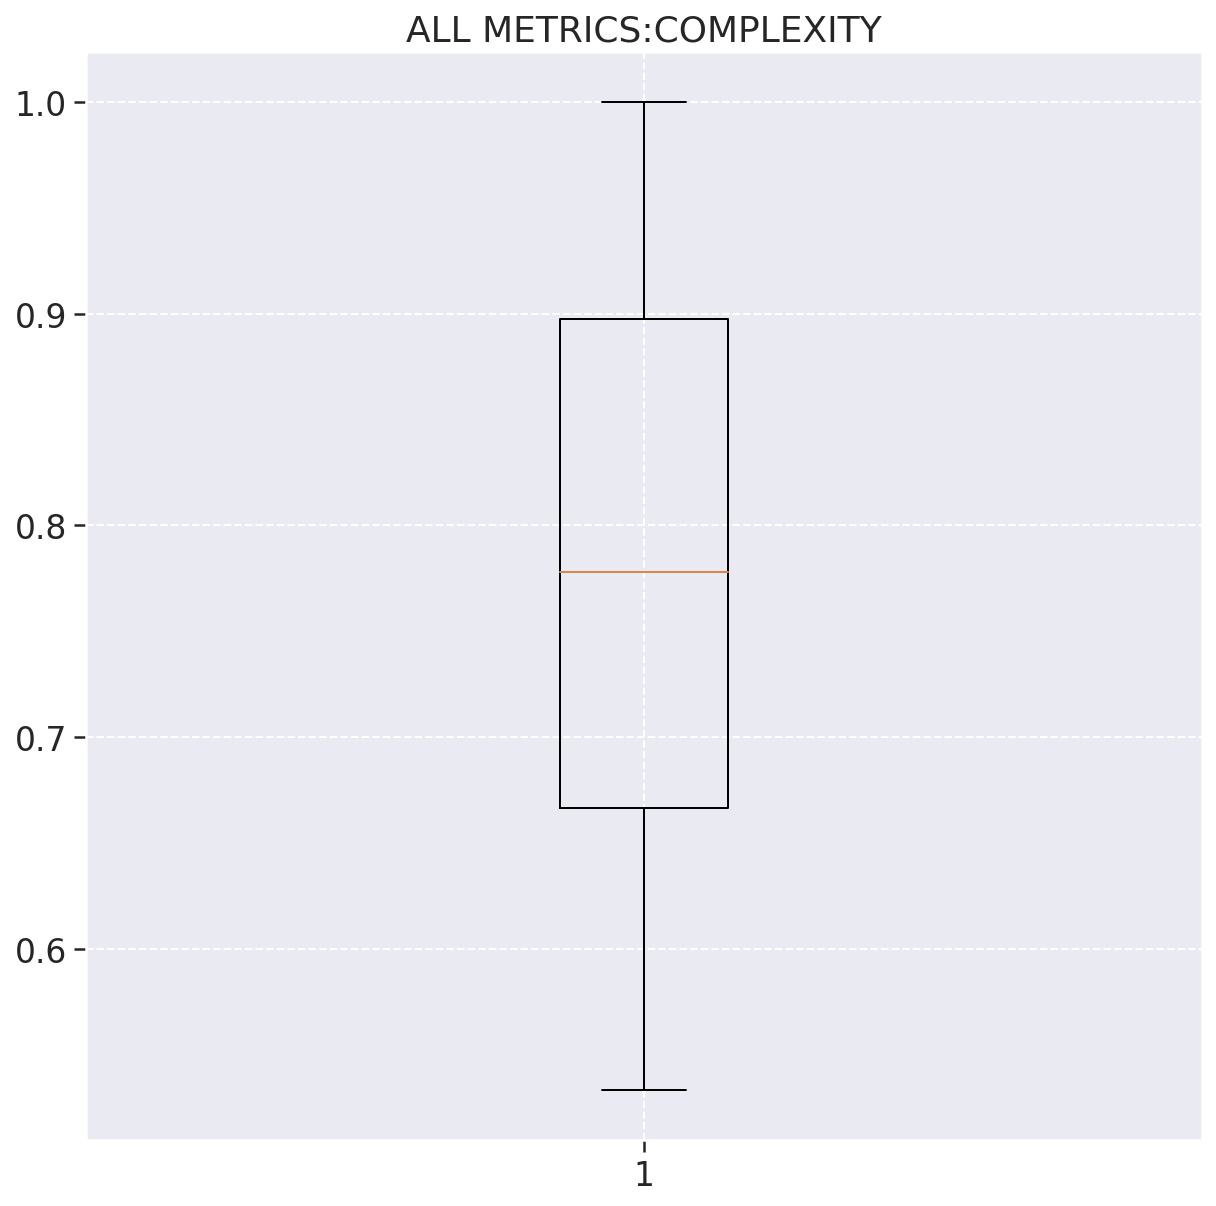

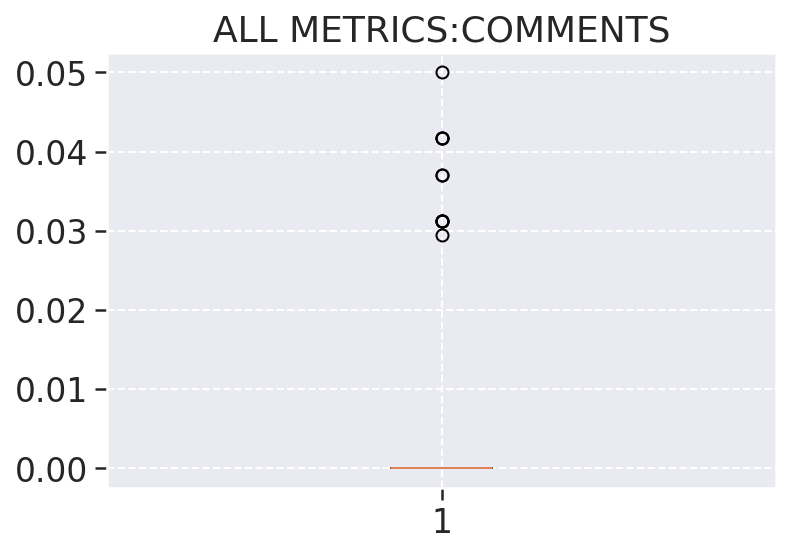

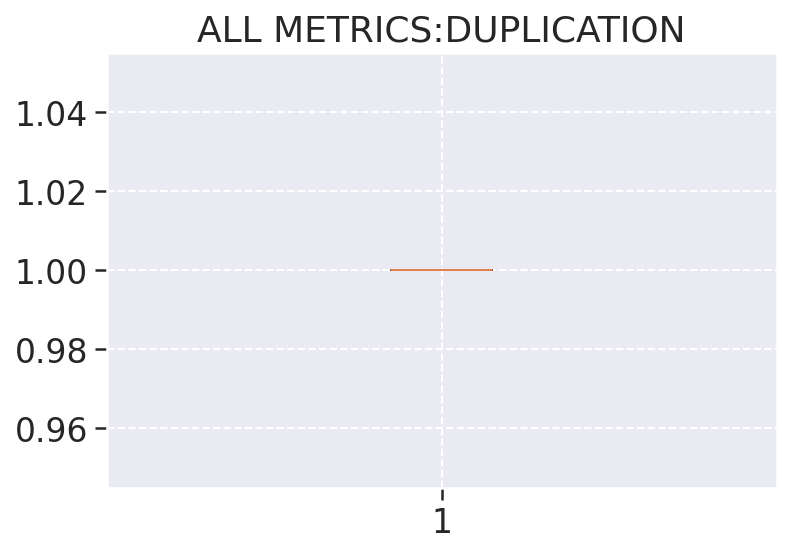

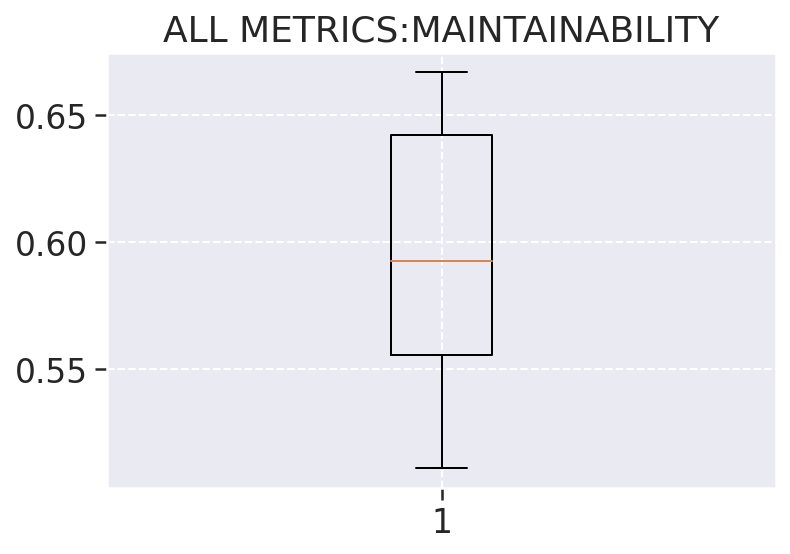

In [114]:
generate_boxplot(generic_df, repository)